In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


# PLAN :

# Importation des Bibliothèques et Mise en Forme.
# I Traitement du Fichier Initial et Dataframe de Départ :
# II Traitement des Valeurs Manquantes et Aberrantes :
# III Etude des Variables Quantitatives par Matplotlib et par Seaborn : 
# IV Etude des Variables Qualitatives :
# V Détermination de la Dataframe d'Exploration :

# 

# Importation des Bibliothèques et Mise en Forme :

In [2]:
# Installation des Bibliothèques :

import matplotlib.pyplot as plt
import matplotlib.colors 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import os
import missingno as msno

In [3]:
# Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information :

pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', -1)

<ipython-input-3-cf9d970a4eb6>:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


# I Traitement du Fichier Initial et Dataframe de Départ :

In [4]:
# Chargement du fichier :

openfoodfacts = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t', low_memory=False)

In [5]:
# Visualisation de la dataframe initiale :

openfoodfacts

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,...,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,NaN,NaN,Torn & Glasser,torn-glasser,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000000016087/organic-salted-nut-mix-grizzlies,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,NaN,NaN,Grizzlies,grizzlies,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000000016094/organic-polenta-bob-s-red-mill,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,NaN,NaN,Bob's Red Mill,bob-s-red-mill,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948282780603/tomato-ricotta-panzani,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1,Plastique,plastique,Panzani,panzani,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/99567453/mint-melange-tea-a-blend-of-peppermint-lemon-grass-and-spearmint-trader-joe-s,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon Grass And Spearmint",NaN,NaN,Plastique,plastique,Trader Joe's,trader-joe-s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970229501521/%E4%B9%90%E5%90%A7%E6%B3%A1%E8%8F%9C%E5%91%B3%E8%96%AF%E7%89%87-%E4%B9%90%E5%90%A7,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,Plastique,plastique,乐吧,乐吧,Potato chips,"en:salty-snacks,en:appetizers,en:chips-and-fries,en:crisps,en:potato-crisps","Snacks salés,Apéritif,Chips et frites,Chips,Chips de pommes de terre",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980282863788/tomates-aux-vermicelles-knorr,ope

# II Traitement des Valeurs Manquantes :

In [6]:
# Traduction en Pourcentage des Valeurs Manquantes :

missing_count = openfoodfacts.isnull().sum()
missing_count

code                                          23    
url                                           23    
creator                                       2     
created_t                                     3     
created_datetime                              9     
last_modified_t                               0     
last_modified_datetime                        0     
product_name                                  17762 
generic_name                                  267977
quantity                                      215953
packaging                                     241812
packaging_tags                                241811
brands                                        28412 
brands_tags                                   28420 
categories                                    236362
categories_tags                               236383
categories_fr                                 236361
origins                                       298582
origins_tags                                  

In [7]:
# Traduction en Pourcentage des Valeurs Manquantes :

value_count = openfoodfacts.isnull().count()
value_count

code                                          320772
url                                           320772
creator                                       320772
created_t                                     320772
created_datetime                              320772
last_modified_t                               320772
last_modified_datetime                        320772
product_name                                  320772
generic_name                                  320772
quantity                                      320772
packaging                                     320772
packaging_tags                                320772
brands                                        320772
brands_tags                                   320772
categories                                    320772
categories_tags                               320772
categories_fr                                 320772
origins                                       320772
origins_tags                                  

In [8]:
# Calcul du Pourcentage de Valeurs Manquantes :

missing_percentage = round((missing_count / value_count) * 100)

In [9]:
# Dataframe des Pourcentages de NaN :

missing_df = pd.DataFrame({'Count' : missing_count, 'Percentage' : missing_percentage})

In [10]:
# Dataframe "Missing_df" :

missing_df

,Count,Percentage
code,23,0.0
url,23,0.0
creator,2,0.0
created_t,3,0.0
created_datetime,9,0.0
last_modified_t,0,0.0
last_modified_datetime,0,0.0
product_name,17762,6.0
generic_name,267977,84.0
quantity,215953,67.0


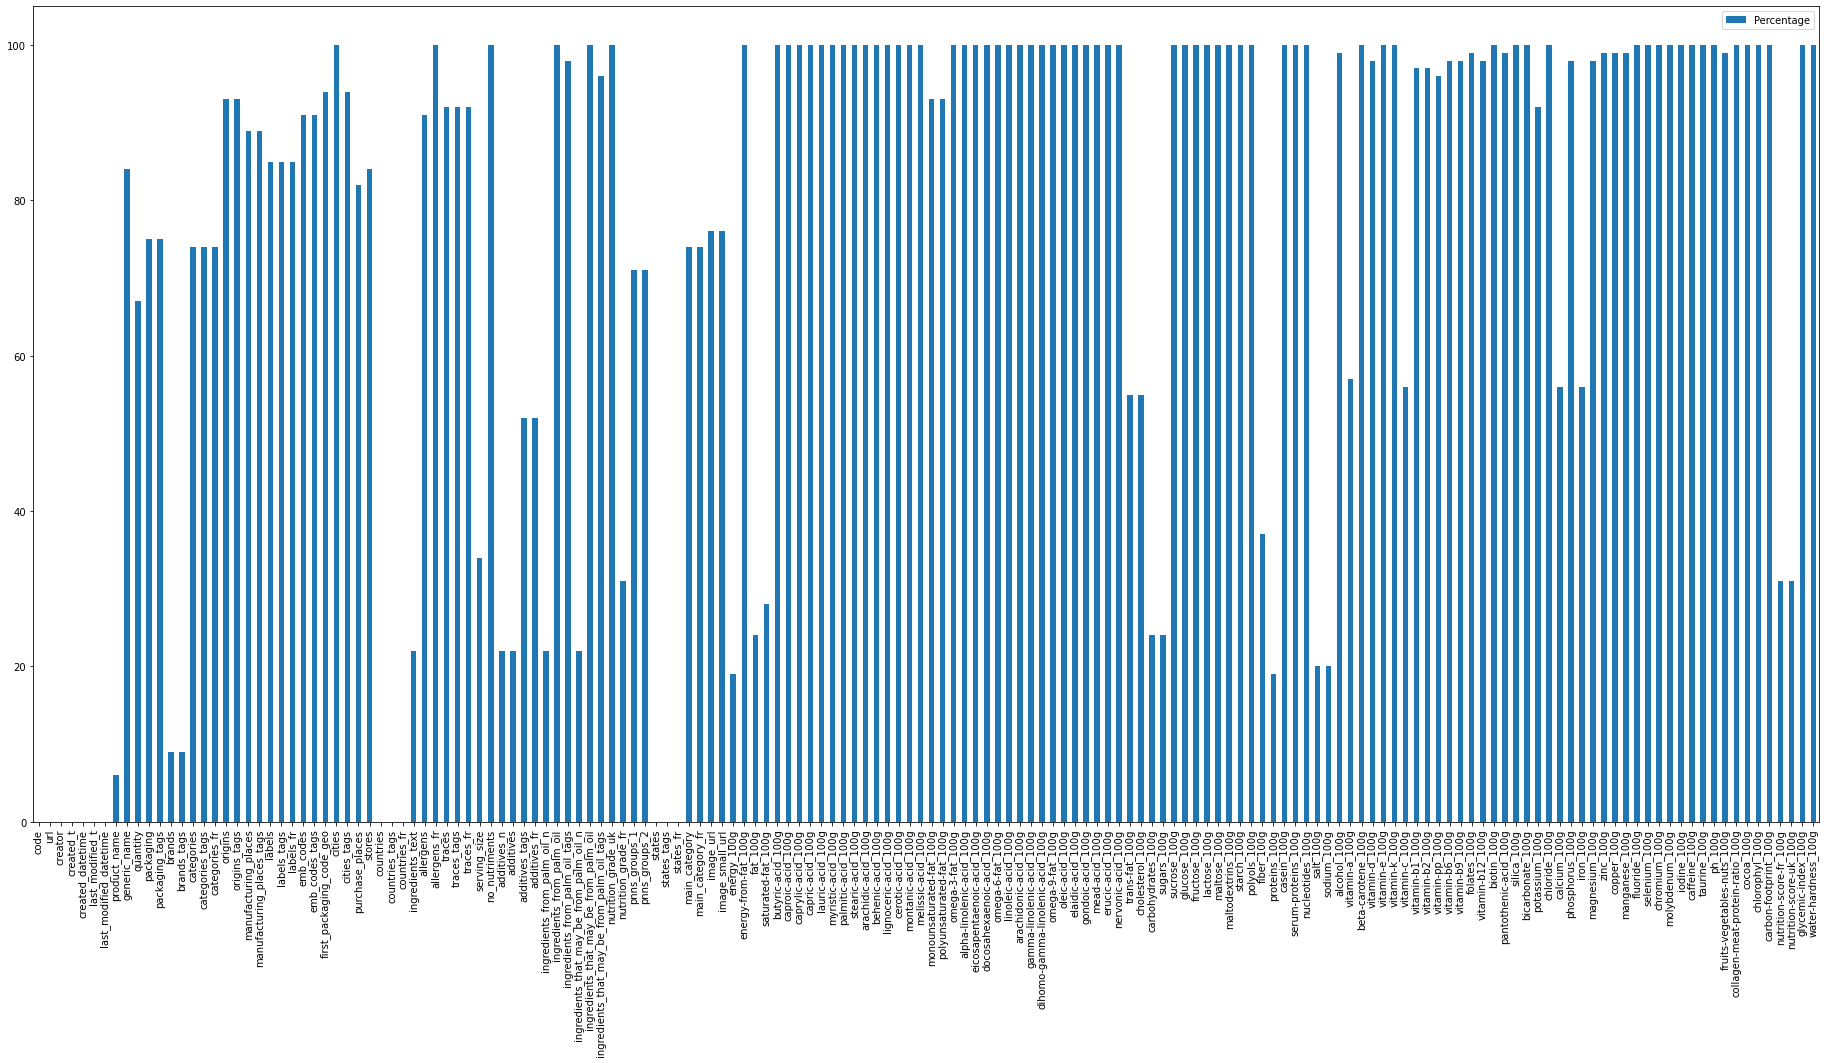

In [11]:
# Pourcentage de Valeurs Manquantes selon les différentes Variables :

plt.rcParams["figure.figsize"] = (32,15)
barchart = missing_df.plot.bar(y='Percentage')

<AxesSubplot:>

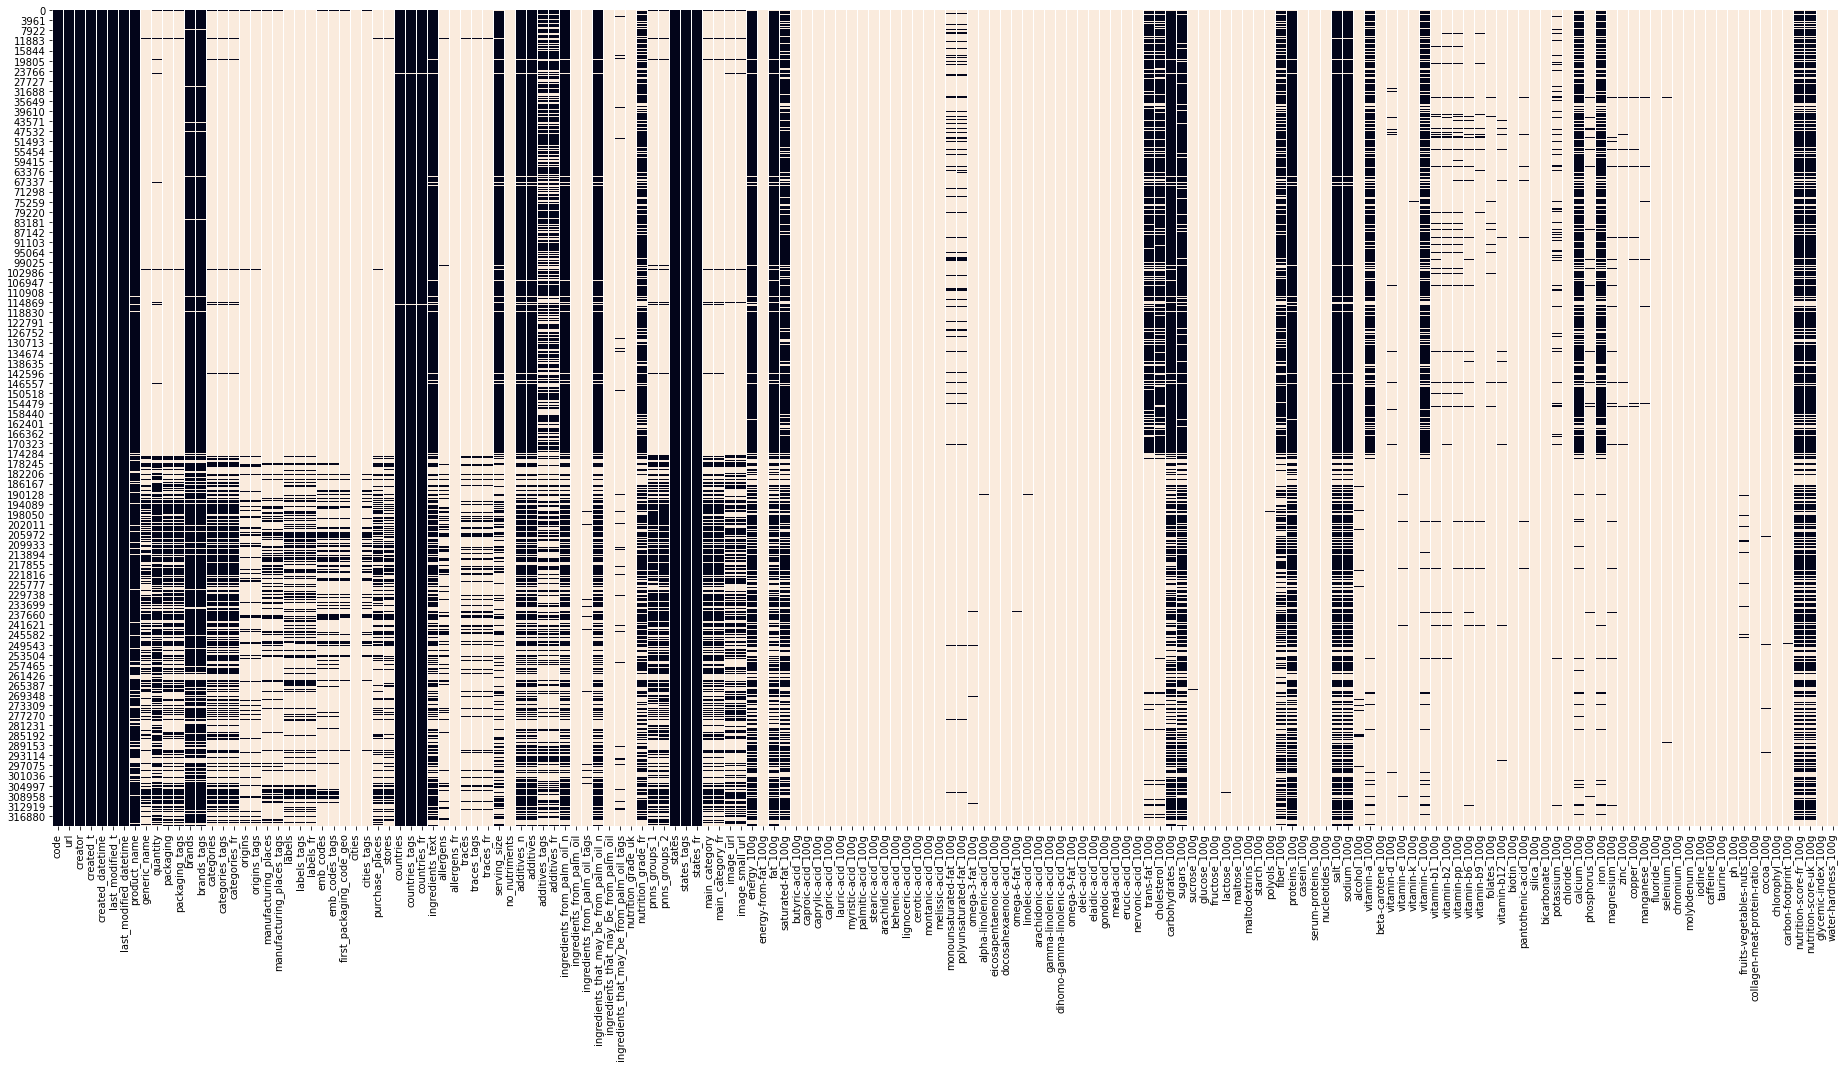

In [12]:
# Heatmap de Valeurs Manquantes de la Dataframe d'Origine :

sns.heatmap(openfoodfacts.isnull(), cbar=False)

# Rappel des Informations de la Dataframe intiale :

In [13]:
# Listage des colonnes constituant la dataframe initiale :

openfoodfacts.columns.to_list()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

In [14]:
# Nombre de Lignes / Nombre de Colonnes de la Dataframe initiale :

openfoodfacts.shape

(320772, 162)

In [15]:
# Types de Variables Qualitatives et Quantitatives de la Dataframe intiale :

openfoodfacts.dtypes

code                                          object 
url                                           object 
creator                                       object 
created_t                                     object 
created_datetime                              object 
last_modified_t                               object 
last_modified_datetime                        object 
product_name                                  object 
generic_name                                  object 
quantity                                      object 
packaging                                     object 
packaging_tags                                object 
brands                                        object 
brands_tags                                   object 
categories                                    object 
categories_tags                               object 
categories_fr                                 object 
origins                                       object 
origins_tags                

In [16]:
# Quantification des Valeurs Dupliquées de la Dataframe initiale :

openfoodfacts.duplicated().sum()

0

# Sélection des Variables Utiles selon les Pourcentages de NaN :

<AxesSubplot:>

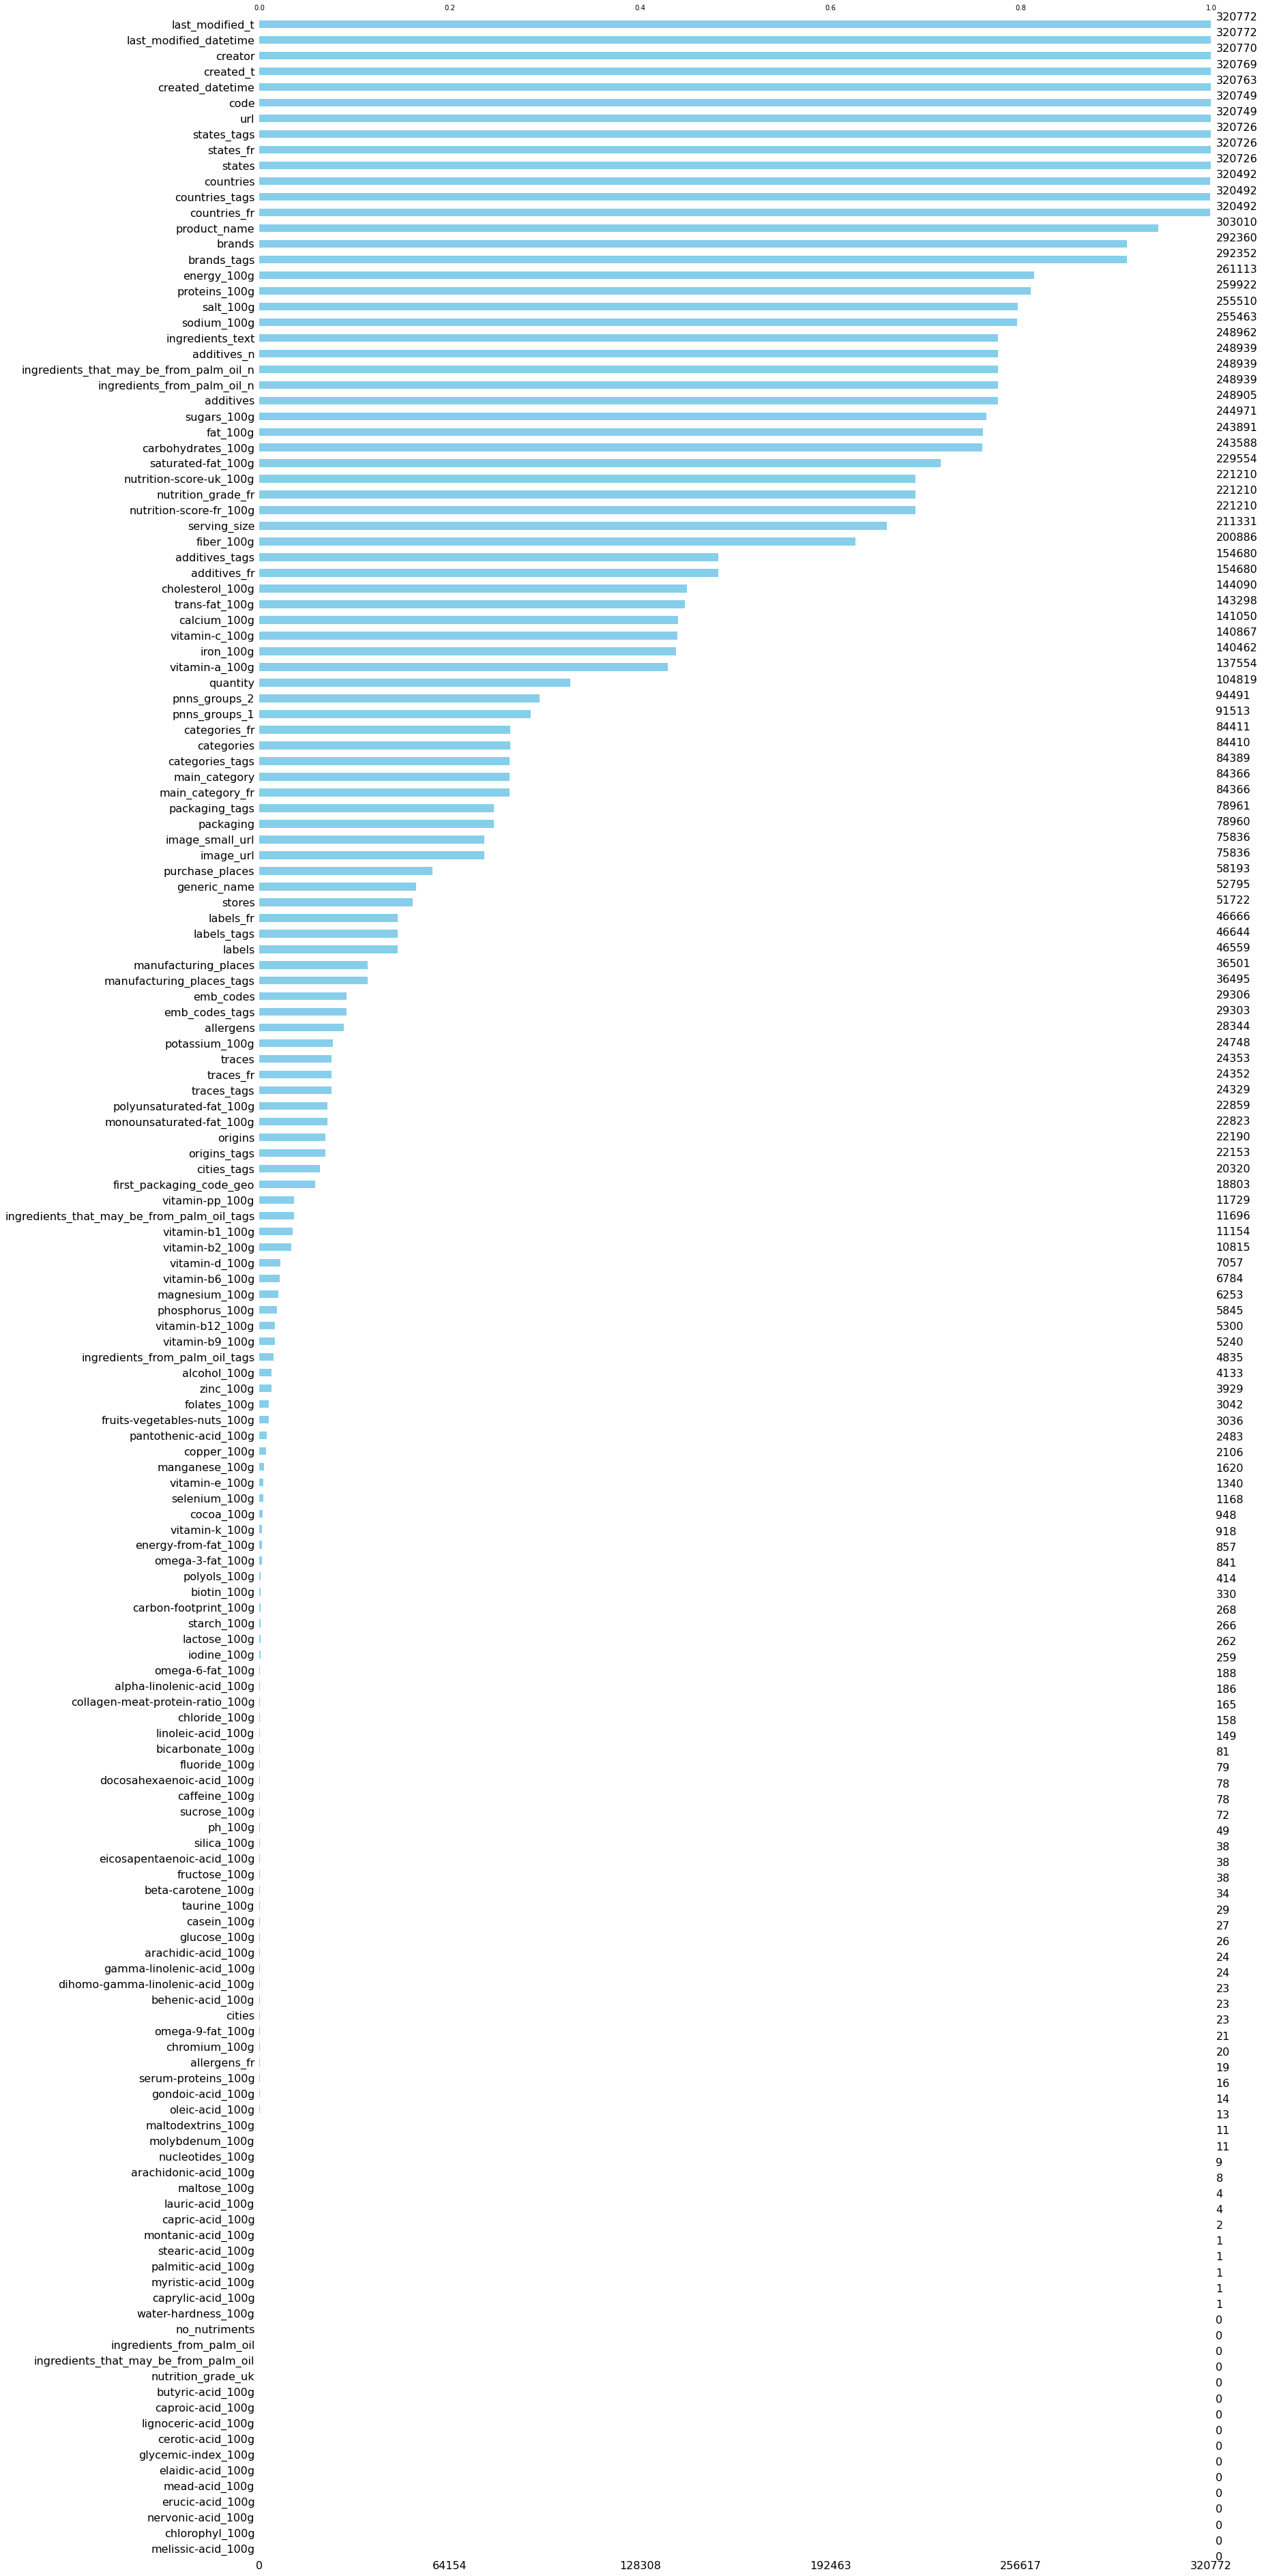

In [17]:
# Matrice de Remplissage des NaN de la Dataframe initiale :

msno.bar(openfoodfacts, sort = "ascending", color = "skyblue")

In [18]:
# Sélection de Variables en fonction du pourcentage de NaN :

perc = 50.0 # Like N %
min_count =  int(((100-perc)/100)*openfoodfacts.shape[0] + 1)
nanopenfoodfacts = openfoodfacts.dropna(axis=1,thresh=min_count)

<AxesSubplot:>

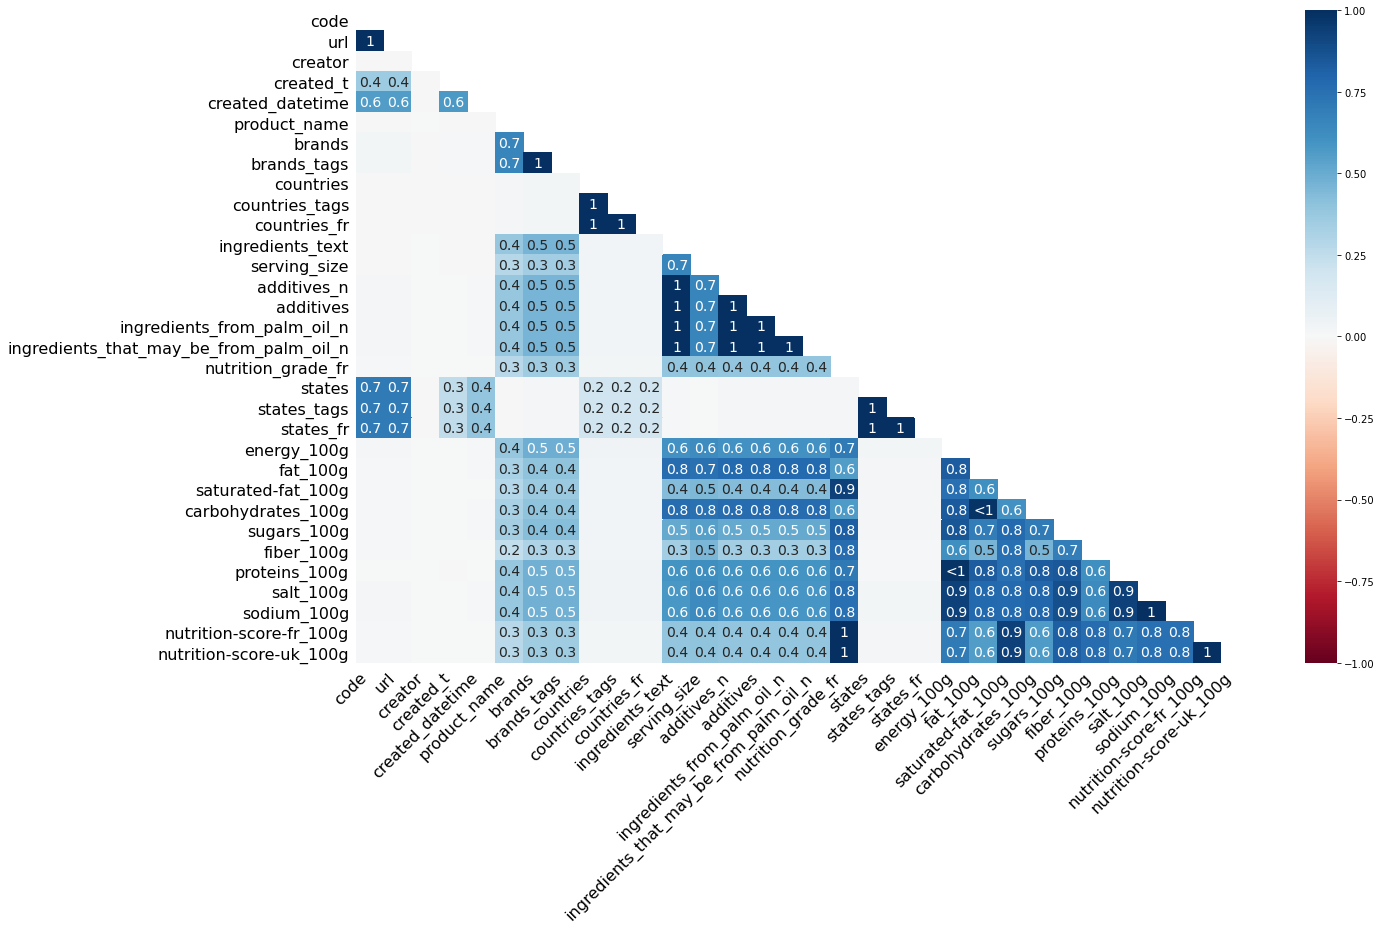

In [19]:
# Heatmap des Variables retenues de la Dataframe "filtrée à 50%" :

msno.heatmap(nanopenfoodfacts)

# Remplacement des NaN par la Moyenne des Valeurs des Colonnes :

In [20]:
# Création d'une Dataframe d'"Identification" :

openfoodfacts2 = nanopenfoodfacts.filter(["code", "url", "product_name", "countries_fr", "brands"])
openfoodfacts2

,code,url,product_name,countries_fr,brands
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao,Farine de blé noir,France,Ferme t'y R'nao
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole,Banana Chips Sweetened (Whole),États-Unis,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser,Peanuts,États-Unis,Torn & Glasser
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000000016087/organic-salted-nut-mix-grizzlies,Organic Salted Nut Mix,États-Unis,Grizzlies
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000000016094/organic-polenta-bob-s-red-mill,Organic Polenta,États-Unis,Bob's Red Mill
...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948282780603/tomato-ricotta-panzani,Tomato & ricotta,Roumanie,Panzani
320768,99567453,http://world-fr.openfoodfacts.org/produit/99567453/mint-melange-tea-a-blend-of-peppermint-lemon-grass-and-spearmint-trader-joe-s,"Mint Melange Tea A Blend Of Peppermint, Lemon Grass And Spearmint",États-Unis,Trader Joe's
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970229501521/%E4%B9%90%E5%90%A7%E6%B3%A1%E8%8F%9C%E5%91%B3%E8%96%AF%E7%89%87-%E4%B9%90%E5%90%A7,乐吧泡菜味薯片,Chine,乐吧
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980282863788/tomates-aux-vermicelles-knorr,Tomates aux Vermicelles,France,Knorr


In [21]:
# Création d'une Dataframe de "Grammage" :

openfoodfacts3 = nanopenfoodfacts.filter(regex='100g')
openfoodfacts3

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
2,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
3,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
4,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
320767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00000,0.000,0.0,0.0
320769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Détermination du nombre de colonnes de la dataframe "Openfoodfacts3" :

openfoodfacts3.shape[1] 

11

In [23]:
# Listage du nombre de colonnes de la dataframe "Openfoodfacts3" :

columns = openfoodfacts3.columns.tolist()
columns

['energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g']

In [24]:
# Présentation du nombre de colonnes de la dataframe "openfoodfacts3" :

columns2 = openfoodfacts3[openfoodfacts3.columns[0:11]]
columns2

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
2,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
3,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
4,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
320767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00000,0.000,0.0,0.0
320769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Remplacement des NaN par la Moyenne des Valeurs de chaque Colonne :

nonan = columns2.fillna(columns2.mean())
nonan

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
1,2243.000000,28.570000,28.570000,64.290000,14.290000,3.600000,3.57000,0.000000,0.000000,14.000000,14.000000
2,1941.000000,17.860000,0.000000,60.710000,17.860000,7.100000,17.86000,0.635000,0.250000,0.000000,0.000000
3,2540.000000,57.140000,5.360000,17.860000,3.570000,7.100000,17.86000,1.224280,0.482000,12.000000,12.000000
4,1552.000000,1.430000,5.129932,77.140000,16.003484,5.700000,8.57000,2.028624,0.798815,9.165535,9.058049
...,...,...,...,...,...,...,...,...,...,...,...
320767,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320768,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
320769,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320770,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049


In [26]:
# Création d'une Dataframe "Autres Informations" :

openfoodfacts4 = nanopenfoodfacts.filter(["additives_n", "ingredients_from_palm_oil_n",
                   "ingredients_from_palm_oil_tags", "ingredients_that_may_be_from_palm_oil_n",
                   "ingredients_that_may_be_from_palm_oil_tags"])
openfoodfacts4

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n
0,NaN,NaN,NaN
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
320767,NaN,NaN,NaN
320768,0.0,0.0,0.0
320769,NaN,NaN,NaN
320770,NaN,NaN,NaN


In [27]:
# Présentation du nombre de colonnes de la dataframe "openfoodfacts4" :

columns3 = openfoodfacts4[openfoodfacts4.columns[0:3]]
columns3

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n
0,NaN,NaN,NaN
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
320767,NaN,NaN,NaN
320768,0.0,0.0,0.0
320769,NaN,NaN,NaN
320770,NaN,NaN,NaN


In [28]:
# Remplacement des NaN par la moyenne des Valeurs de chaque Colonne de la dataframe sélectionnée :

nonan2 = columns3.fillna(columns3.mean())
nonan2

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n
0,1.936024,0.019659,0.055246
1,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000
...,...,...,...
320767,1.936024,0.019659,0.055246
320768,0.000000,0.000000,0.000000
320769,1.936024,0.019659,0.055246
320770,1.936024,0.019659,0.055246


In [29]:
# Association des dataframes filtrées :

data = [openfoodfacts2, nonan2, nonan]

In [30]:
# Création de la Dataframe de Travail :

datanickel = pd.concat(data, axis=1)
datanickel

,code,url,product_name,countries_fr,brands,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao,Farine de blé noir,France,Ferme t'y R'nao,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole,Banana Chips Sweetened (Whole),États-Unis,NaN,0.000000,0.000000,0.000000,2243.000000,28.570000,28.570000,64.290000,14.290000,3.600000,3.57000,0.000000,0.000000,14.000000,14.000000
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser,Peanuts,États-Unis,Torn & Glasser,0.000000,0.000000,0.000000,1941.000000,17.860000,0.000000,60.710000,17.860000,7.100000,17.86000,0.635000,0.250000,0.000000,0.000000
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000000016087/organic-salted-nut-mix-grizzlies,Organic Salted Nut Mix,États-Unis,Grizzlies,0.000000,0.000000,0.000000,2540.000000,57.140000,5.360000,17.860000,3.570000,7.100000,17.86000,1.224280,0.482000,12.000000,12.000000
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000000016094/organic-polenta-bob-s-red-mill,Organic Polenta,États-Unis,Bob's Red Mill,0.000000,0.000000,0.000000,1552.000000,1.430000,5.129932,77.140000,16.003484,5.700000,8.57000,2.028624,0.798815,9.165535,9.058049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948282780603/tomato-ricotta-panzani,Tomato & ricotta,Roumanie,Panzani,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320768,99567453,http://world-fr.openfoodfacts.org/produit/99567453/mint-melange-tea-a-blend-of-peppermint-lemon-grass-and-spearmint-trader-joe-s,"Mint Melange Tea A Blend Of Peppermint, Lemon Grass And Spearmint",États-Unis,Trader Joe's,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970229501521/%E4%B9%90%E5%90%A7%E6%B3%A1%E8%8F%9C%E5%91%B3%E8%96%AF%E7%89%87-%E4%B9%90%E5%90%A7,乐吧泡菜味薯片,Chine,乐吧,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980282863788/tomates-aux-vermicelles-knorr,Tomates aux Vermicelles,France,Knorr,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049


# Remplacement des NaN par la Médiane des Valeurs des Colonnes :

In [31]:
# Remplacement des NaN par la médiane des Valeurs de chaque Colonne de la dataframe sélectionnée :

nonan3 = columns2.fillna(columns2.median())
nonan4 = columns3.fillna(columns3.median())

In [32]:
# Association des dataframes filtrées :

data2 = [openfoodfacts2, nonan4, nonan3]

In [33]:
# Création de la Dataframe de Travail :

datanickel2 = pd.concat(data2, axis=1)
datanickel2

,code,url,product_name,countries_fr,brands,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao,Farine de blé noir,France,Ferme t'y R'nao,1.0,0.0,0.0,1100.0,5.00,1.79,20.60,5.71,1.5,4.76,0.58166,0.229,10.0,9.0
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole,Banana Chips Sweetened (Whole),États-Unis,NaN,0.0,0.0,0.0,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser,Peanuts,États-Unis,Torn & Glasser,0.0,0.0,0.0,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000000016087/organic-salted-nut-mix-grizzlies,Organic Salted Nut Mix,États-Unis,Grizzlies,0.0,0.0,0.0,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000000016094/organic-polenta-bob-s-red-mill,Organic Polenta,États-Unis,Bob's Red Mill,0.0,0.0,0.0,1552.0,1.43,1.79,77.14,5.71,5.7,8.57,0.58166,0.229,10.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948282780603/tomato-ricotta-panzani,Tomato & ricotta,Roumanie,Panzani,1.0,0.0,0.0,1100.0,5.00,1.79,20.60,5.71,1.5,4.76,0.58166,0.229,10.0,9.0
320768,99567453,http://world-fr.openfoodfacts.org/produit/99567453/mint-melange-tea-a-blend-of-peppermint-lemon-grass-and-spearmint-trader-joe-s,"Mint Melange Tea A Blend Of Peppermint, Lemon Grass And Spearmint",États-Unis,Trader Joe's,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00000,0.000,0.0,0.0
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970229501521/%E4%B9%90%E5%90%A7%E6%B3%A1%E8%8F%9C%E5%91%B3%E8%96%AF%E7%89%87-%E4%B9%90%E5%90%A7,乐吧泡菜味薯片,Chine,乐吧,1.0,0.0,0.0,1100.0,5.00,1.79,20.60,5.71,1.5,4.76,0.58166,0.229,10.0,9.0
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980282863788/tomates-aux-vermicelles-knorr,Tomates aux Vermicelles,France,Knorr,1.0,0.0,0.0,1100.0,5.00,1.79,20.60,5.71,1.5,4.76,0.58166,0.229,10.0,9.0


# Remplacement des NaN par 0 :

In [34]:
# Association des dataframes filtrées :

data3 = [openfoodfacts2, columns2, columns3]

In [35]:
# Création de la Dataframe de Travail :

datanickel3 = pd.concat(data3, axis=1)
datanickel3

,code,url,product_name,countries_fr,brands,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao,Farine de blé noir,France,Ferme t'y R'nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole,Banana Chips Sweetened (Whole),États-Unis,NaN,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0,0.0,0.0,0.0
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser,Peanuts,États-Unis,Torn & Glasser,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0,0.0,0.0,0.0
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000000016087/organic-salted-nut-mix-grizzlies,Organic Salted Nut Mix,États-Unis,Grizzlies,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0,0.0,0.0,0.0
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000000016094/organic-polenta-bob-s-red-mill,Organic Polenta,États-Unis,Bob's Red Mill,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948282780603/tomato-ricotta-panzani,Tomato & ricotta,Roumanie,Panzani,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/99567453/mint-melange-tea-a-blend-of-peppermint-lemon-grass-and-spearmint-trader-joe-s,"Mint Melange Tea A Blend Of Peppermint, Lemon Grass And Spearmint",États-Unis,Trader Joe's,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00000,0.000,0.0,0.0,0.0,0.0,0.0
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970229501521/%E4%B9%90%E5%90%A7%E6%B3%A1%E8%8F%9C%E5%91%B3%E8%96%AF%E7%89%87-%E4%B9%90%E5%90%A7,乐吧泡菜味薯片,Chine,乐吧,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980282863788/tomates-aux-vermicelles-knorr,Tomates aux Vermicelles,France,Knorr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Remplacement par 0 :

datanickel3.fillna(0)

,code,url,product_name,countries_fr,brands,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao,Farine de blé noir,France,Ferme t'y R'nao,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00000,0.000,0.0,0.0,0.0,0.0,0.0
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole,Banana Chips Sweetened (Whole),États-Unis,0,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0,0.0,0.0,0.0
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser,Peanuts,États-Unis,Torn & Glasser,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0,0.0,0.0,0.0
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000000016087/organic-salted-nut-mix-grizzlies,Organic Salted Nut Mix,États-Unis,Grizzlies,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0,0.0,0.0,0.0
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000000016094/organic-polenta-bob-s-red-mill,Organic Polenta,États-Unis,Bob's Red Mill,1552.0,1.43,0.00,77.14,0.00,5.7,8.57,0.00000,0.000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948282780603/tomato-ricotta-panzani,Tomato & ricotta,Roumanie,Panzani,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00000,0.000,0.0,0.0,0.0,0.0,0.0
320768,99567453,http://world-fr.openfoodfacts.org/produit/99567453/mint-melange-tea-a-blend-of-peppermint-lemon-grass-and-spearmint-trader-joe-s,"Mint Melange Tea A Blend Of Peppermint, Lemon Grass And Spearmint",États-Unis,Trader Joe's,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00000,0.000,0.0,0.0,0.0,0.0,0.0
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970229501521/%E4%B9%90%E5%90%A7%E6%B3%A1%E8%8F%9C%E5%91%B3%E8%96%AF%E7%89%87-%E4%B9%90%E5%90%A7,乐吧泡菜味薯片,Chine,乐吧,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00000,0.000,0.0,0.0,0.0,0.0,0.0
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980282863788/tomates-aux-vermicelles-knorr,Tomates aux Vermicelles,France,Knorr,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00000,0.000,0.0,0.0,0.0,0.0,0.0


# Création d'une Dataframe de Référence : (dont les Nan sont remplacées par la Moyenne) :

In [37]:
# Association des dataframes filtrées :

data = [openfoodfacts2, nonan2, nonan]

In [38]:
# Création de la Dataframe de Travail :

datanickel = pd.concat(data, axis=1)
datanickel

,code,url,product_name,countries_fr,brands,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao,Farine de blé noir,France,Ferme t'y R'nao,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole,Banana Chips Sweetened (Whole),États-Unis,NaN,0.000000,0.000000,0.000000,2243.000000,28.570000,28.570000,64.290000,14.290000,3.600000,3.57000,0.000000,0.000000,14.000000,14.000000
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser,Peanuts,États-Unis,Torn & Glasser,0.000000,0.000000,0.000000,1941.000000,17.860000,0.000000,60.710000,17.860000,7.100000,17.86000,0.635000,0.250000,0.000000,0.000000
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000000016087/organic-salted-nut-mix-grizzlies,Organic Salted Nut Mix,États-Unis,Grizzlies,0.000000,0.000000,0.000000,2540.000000,57.140000,5.360000,17.860000,3.570000,7.100000,17.86000,1.224280,0.482000,12.000000,12.000000
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000000016094/organic-polenta-bob-s-red-mill,Organic Polenta,États-Unis,Bob's Red Mill,0.000000,0.000000,0.000000,1552.000000,1.430000,5.129932,77.140000,16.003484,5.700000,8.57000,2.028624,0.798815,9.165535,9.058049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948282780603/tomato-ricotta-panzani,Tomato & ricotta,Roumanie,Panzani,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320768,99567453,http://world-fr.openfoodfacts.org/produit/99567453/mint-melange-tea-a-blend-of-peppermint-lemon-grass-and-spearmint-trader-joe-s,"Mint Melange Tea A Blend Of Peppermint, Lemon Grass And Spearmint",États-Unis,Trader Joe's,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970229501521/%E4%B9%90%E5%90%A7%E6%B3%A1%E8%8F%9C%E5%91%B3%E8%96%AF%E7%89%87-%E4%B9%90%E5%90%A7,乐吧泡菜味薯片,Chine,乐吧,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980282863788/tomates-aux-vermicelles-knorr,Tomates aux Vermicelles,France,Knorr,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049


<AxesSubplot:>

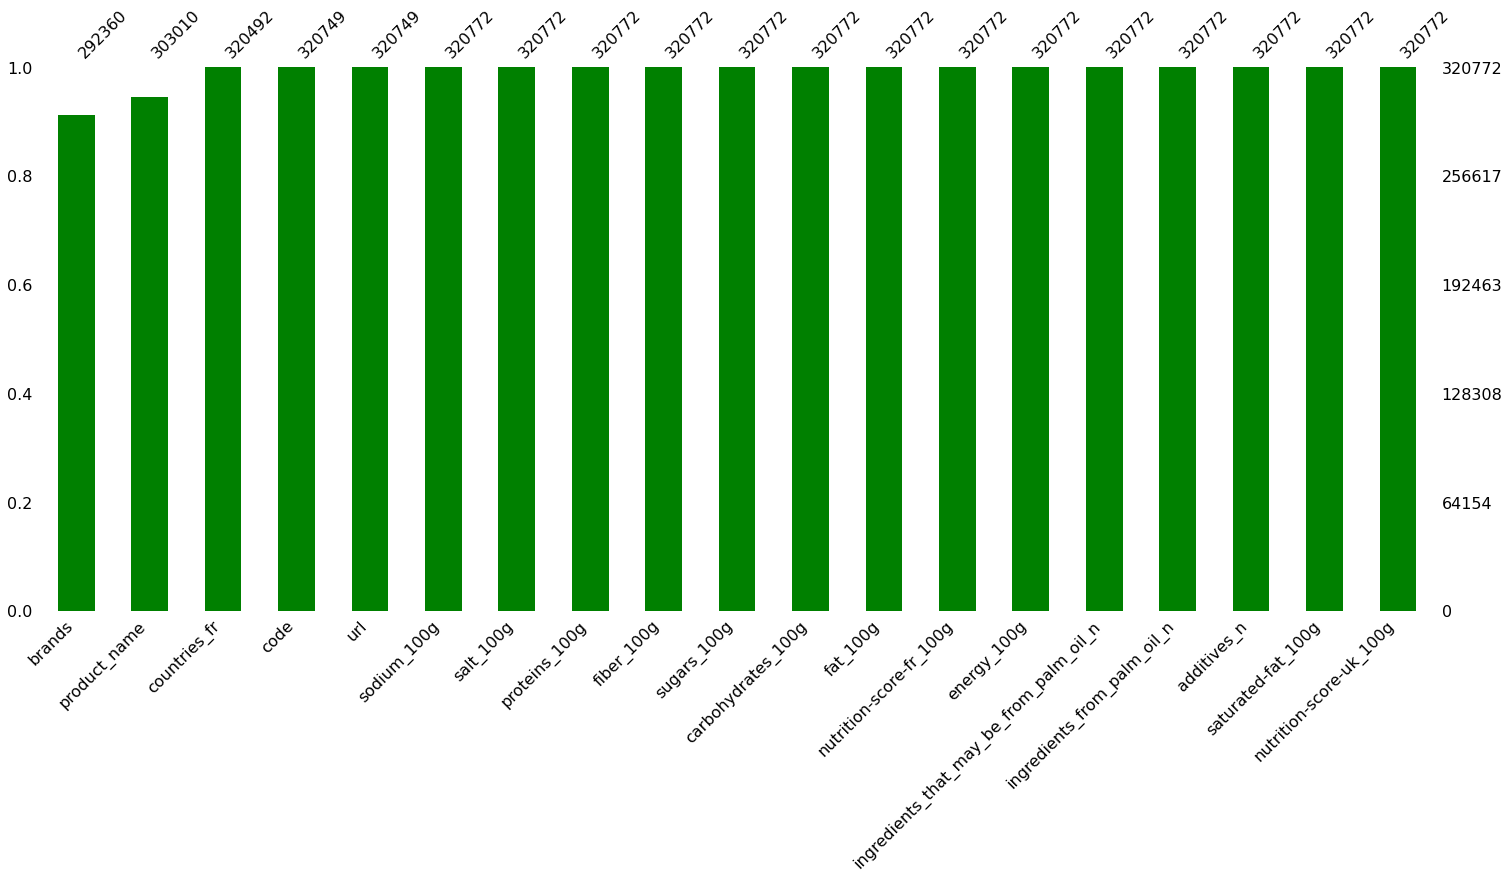

In [39]:
# Matrice de Remplissage des NaN de la Dataframe "nettoyée" :

msno.bar(datanickel, sort = "ascending", color = "green")

In [40]:
# Types de Variables retenues de la Dataframe "nettoyée":

datanickel.dtypes

code                                       object 
url                                        object 
product_name                               object 
countries_fr                               object 
brands                                     object 
additives_n                                float64
ingredients_from_palm_oil_n                float64
ingredients_that_may_be_from_palm_oil_n    float64
energy_100g                                float64
fat_100g                                   float64
saturated-fat_100g                         float64
carbohydrates_100g                         float64
sugars_100g                                float64
fiber_100g                                 float64
proteins_100g                              float64
salt_100g                                  float64
sodium_100g                                float64
nutrition-score-fr_100g                    float64
nutrition-score-uk_100g                    float64
dtype: object

In [41]:
# Listage des colonnes constituant la Dataframe "nettoyée" :

datanickel.columns.to_list()

['code',
 'url',
 'product_name',
 'countries_fr',
 'brands',
 'additives_n',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g']

In [42]:
# Visualisation des premières lignes de la dataframe "cleané" :

datanickel.head(5)

,code,url,product_name,countries_fr,brands,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao,Farine de blé noir,France,Ferme t'y R'nao,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole,Banana Chips Sweetened (Whole),États-Unis,NaN,0.000000,0.000000,0.000000,2243.000000,28.570000,28.570000,64.290000,14.290000,3.600000,3.57000,0.000000,0.000000,14.000000,14.000000
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser,Peanuts,États-Unis,Torn & Glasser,0.000000,0.000000,0.000000,1941.000000,17.860000,0.000000,60.710000,17.860000,7.100000,17.86000,0.635000,0.250000,0.000000,0.000000
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000000016087/organic-salted-nut-mix-grizzlies,Organic Salted Nut Mix,États-Unis,Grizzlies,0.000000,0.000000,0.000000,2540.000000,57.140000,5.360000,17.860000,3.570000,7.100000,17.86000,1.224280,0.482000,12.000000,12.000000
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000000016094/organic-polenta-bob-s-red-mill,Organic Polenta,États-Unis,Bob's Red Mill,0.000000,0.000000,0.000000,1552.000000,1.430000,5.129932,77.140000,16.003484,5.700000,8.57000,2.028624,0.798815,9.165535,9.058049


In [43]:
# Modification du nom des colonnes de la dataframe "cleané" :

nintendo = datanickel.rename(columns={'code':'Code', 'product_name': 'Product_Name','countries_fr':'Countries_France','brands':'Brands','additives_n':'Additives','ingredients_from_palm_oil_n':'Palm_Oil','ingredients_that_may_be_from_palm_oil_n':'Maybe_Palm_Oil','energy_100g':'Energy_100g','fat_100g':'Fat_100g','saturated-fat_100g':'Saturated_Fat_100g','carbohydrates_100g':'Carbohydrates_100g','sugars_100g':'Sugars_100g','fiber_100g':'Fiber_100g','proteins_100g':'Proteins_100g','salt_100g':'Salt_100g','sodium_100g':'Sodium_100g','nutrition-score-fr_100g':'Nutrition_Score_Fr_100g','nutrition-score-uk_100g':'Nutrition_Score_Uk_100g'})
nintendo

,Code,url,Product_Name,Countries_France,Brands,Additives,Palm_Oil,Maybe_Palm_Oil,Energy_100g,Fat_100g,Saturated_Fat_100g,Carbohydrates_100g,Sugars_100g,Fiber_100g,Proteins_100g,Salt_100g,Sodium_100g,Nutrition_Score_Fr_100g,Nutrition_Score_Uk_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao,Farine de blé noir,France,Ferme t'y R'nao,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole,Banana Chips Sweetened (Whole),États-Unis,NaN,0.000000,0.000000,0.000000,2243.000000,28.570000,28.570000,64.290000,14.290000,3.600000,3.57000,0.000000,0.000000,14.000000,14.000000
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser,Peanuts,États-Unis,Torn & Glasser,0.000000,0.000000,0.000000,1941.000000,17.860000,0.000000,60.710000,17.860000,7.100000,17.86000,0.635000,0.250000,0.000000,0.000000
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000000016087/organic-salted-nut-mix-grizzlies,Organic Salted Nut Mix,États-Unis,Grizzlies,0.000000,0.000000,0.000000,2540.000000,57.140000,5.360000,17.860000,3.570000,7.100000,17.86000,1.224280,0.482000,12.000000,12.000000
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000000016094/organic-polenta-bob-s-red-mill,Organic Polenta,États-Unis,Bob's Red Mill,0.000000,0.000000,0.000000,1552.000000,1.430000,5.129932,77.140000,16.003484,5.700000,8.57000,2.028624,0.798815,9.165535,9.058049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948282780603/tomato-ricotta-panzani,Tomato & ricotta,Roumanie,Panzani,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320768,99567453,http://world-fr.openfoodfacts.org/produit/99567453/mint-melange-tea-a-blend-of-peppermint-lemon-grass-and-spearmint-trader-joe-s,"Mint Melange Tea A Blend Of Peppermint, Lemon Grass And Spearmint",États-Unis,Trader Joe's,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970229501521/%E4%B9%90%E5%90%A7%E6%B3%A1%E8%8F%9C%E5%91%B3%E8%96%AF%E7%89%87-%E4%B9%90%E5%90%A7,乐吧泡菜味薯片,Chine,乐吧,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980282863788/tomates-aux-vermicelles-knorr,Tomates aux Vermicelles,France,Knorr,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049


In [44]:
# Présentation de la Dataframe Initiale de Travail :

nintendo.head()

,Code,url,Product_Name,Countries_France,Brands,Additives,Palm_Oil,Maybe_Palm_Oil,Energy_100g,Fat_100g,Saturated_Fat_100g,Carbohydrates_100g,Sugars_100g,Fiber_100g,Proteins_100g,Salt_100g,Sodium_100g,Nutrition_Score_Fr_100g,Nutrition_Score_Uk_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao,Farine de blé noir,France,Ferme t'y R'nao,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole,Banana Chips Sweetened (Whole),États-Unis,NaN,0.000000,0.000000,0.000000,2243.000000,28.570000,28.570000,64.290000,14.290000,3.600000,3.57000,0.000000,0.000000,14.000000,14.000000
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser,Peanuts,États-Unis,Torn & Glasser,0.000000,0.000000,0.000000,1941.000000,17.860000,0.000000,60.710000,17.860000,7.100000,17.86000,0.635000,0.250000,0.000000,0.000000
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000000016087/organic-salted-nut-mix-grizzlies,Organic Salted Nut Mix,États-Unis,Grizzlies,0.000000,0.000000,0.000000,2540.000000,57.140000,5.360000,17.860000,3.570000,7.100000,17.86000,1.224280,0.482000,12.000000,12.000000
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000000016094/organic-polenta-bob-s-red-mill,Organic Polenta,États-Unis,Bob's Red Mill,0.000000,0.000000,0.000000,1552.000000,1.430000,5.129932,77.140000,16.003484,5.700000,8.57000,2.028624,0.798815,9.165535,9.058049


# Représentation Globale des Variables Quantitatives par Matplotlib et par Seaborn :

In [45]:
# Elimination de Colonnes Inutiles à notre analyse :

uncharted = nintendo.drop(['Additives','Energy_100g','Nutrition_Score_Fr_100g','Nutrition_Score_Uk_100g','Palm_Oil','Maybe_Palm_Oil'],axis=1)

In [46]:
# "Sort" de notre dataframe :

beth = uncharted.sort_values(by='Fat_100g',ascending= False)

In [47]:
# Dataframe de Sélection et classement par la Médiane :

shout = beth[["Fat_100g","Saturated_Fat_100g","Carbohydrates_100g","Sugars_100g","Fiber_100g","Proteins_100g","Salt_100g","Sodium_100g"]]
sorted_index = shout.median().sort_values().index
loud_sorted = shout[sorted_index]
loud_sorted

,Sodium_100g,Salt_100g,Fiber_100g,Saturated_Fat_100g,Proteins_100g,Fat_100g,Sugars_100g,Carbohydrates_100g
112681,0.000000,0.00000,0.000000,100.000000,0.00000,714.29,0.000000,32.073981
245311,3.670000,9.33000,0.000000,210.000000,0.00000,380.00,22.700000,190.000000
305054,0.003937,0.01000,2.862111,0.300000,12.00000,105.00,2.500000,70.000000
303101,0.000000,0.00000,2.862111,15.000000,0.00000,101.00,0.000000,0.000000
171763,0.000000,0.00000,2.862111,7.140000,0.00000,100.00,16.003484,0.000000
...,...,...,...,...,...,...,...,...
108641,2.778000,7.05612,0.000000,0.000000,0.00000,0.00,5.560000,11.110000
108640,0.000000,0.00000,2.862111,0.000000,7.07594,0.00,3.810000,6.670000
108638,0.000000,0.00000,2.862111,5.129932,0.00000,0.00,4.510000,4.890000
268773,0.000000,0.00000,0.000000,0.000000,0.00000,0.00,0.000000,26.670000


(0.0, 500.0)

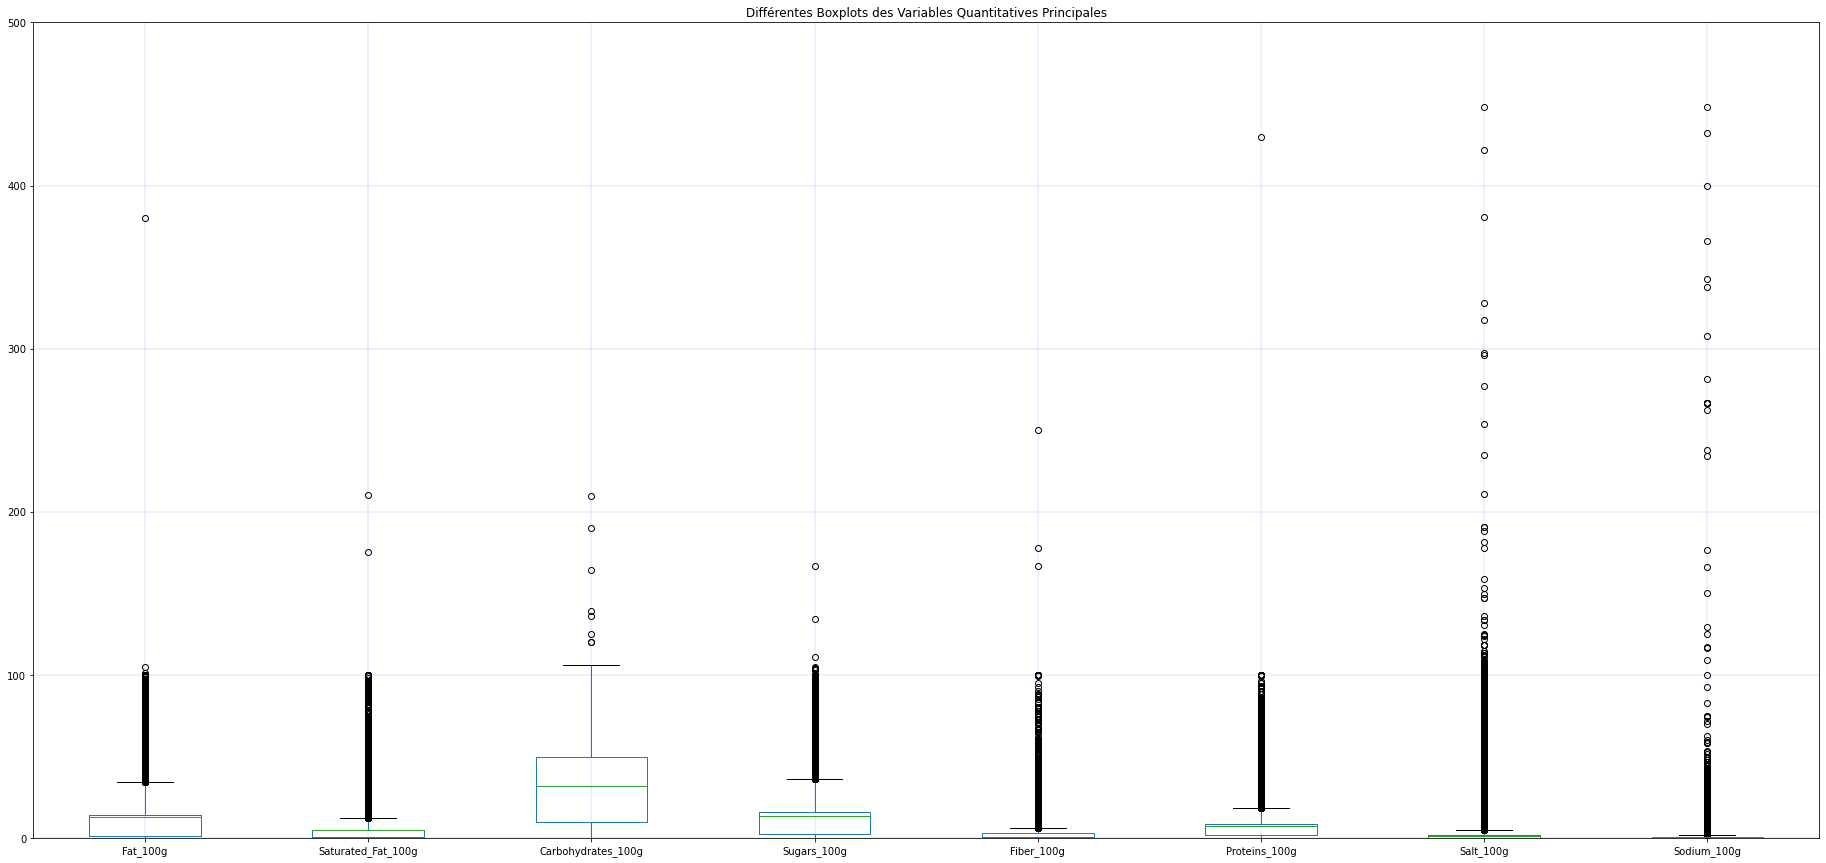

In [48]:
# Présentation des Boxplots des Variables Quantitatives Principales :

ax = beth.plot(kind='box')
ax.set_title("Différentes Boxplots des Variables Quantitatives Principales")
ax.grid(color='Blue',linewidth=0.25, alpha=0.5)
plt.ylim(0,500)

Text(0.5, 1.0, 'Différentes Boxplots des Variables Quantitatives Principales, selon la médiane croissante')

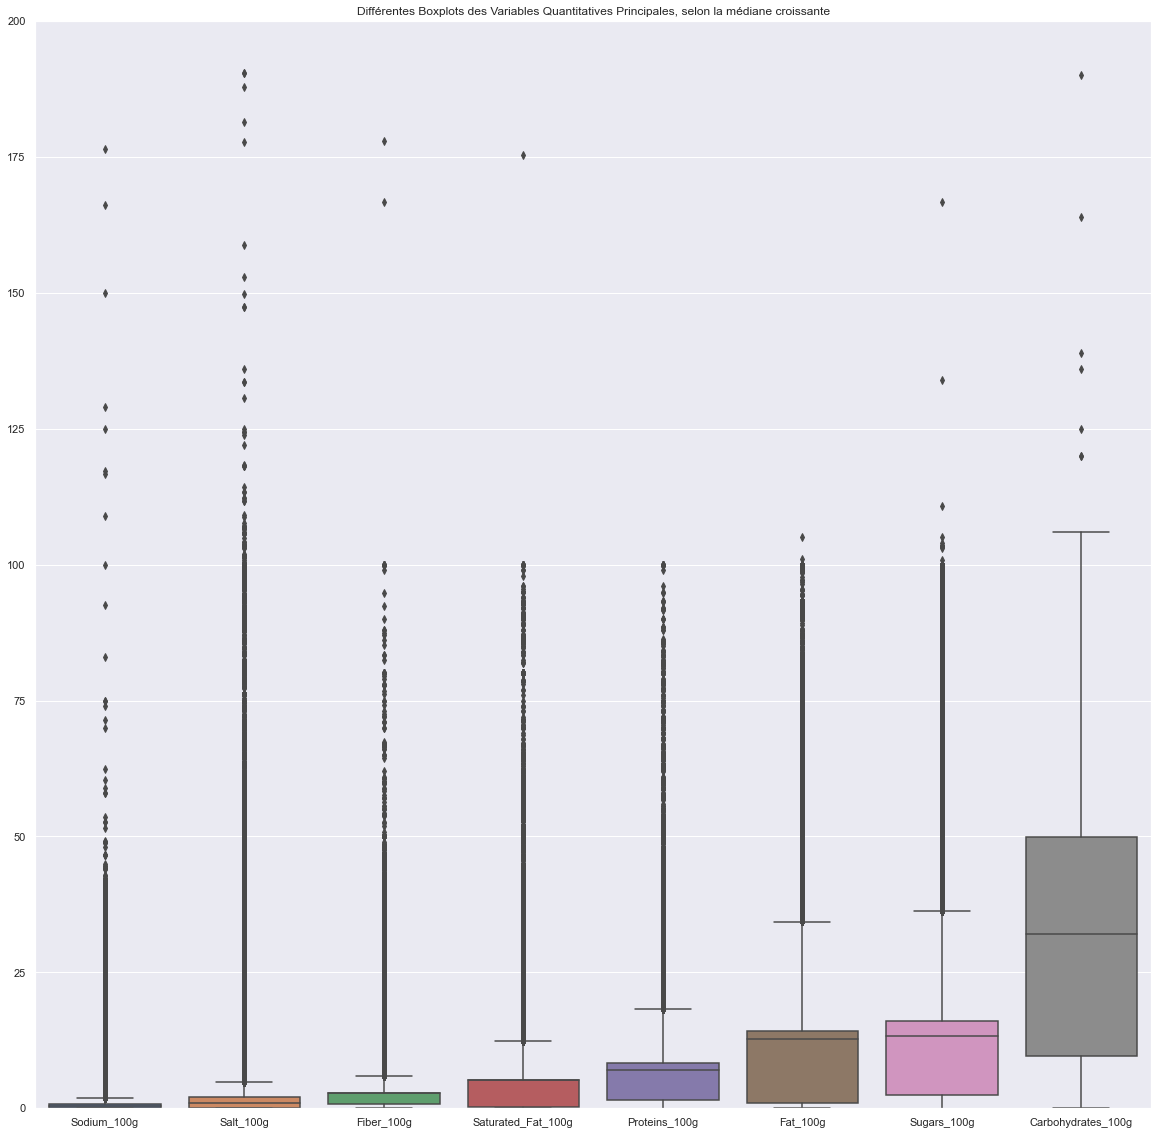

In [49]:
# Présentation des Boxplots des Variables Quantitatives Principales, selon la Médiane croissante :

sns.set(rc = {'figure.figsize':(20,20)})
t = sns.boxplot(data=loud_sorted)
t.set(ylim=(0,200))
t.set_title('Différentes Boxplots des Variables Quantitatives Principales, selon la médiane croissante')

# Mise en Evidence des Valeurs Aberrantes et Outliers selon la colonne "Sodium" :

In [50]:
# Melting de la dataframe :

fff_melted = pd.melt(nintendo)
fff_melted.dropna()

,variable,value
0,Code,0000000003087
1,Code,0000000004530
2,Code,0000000004559
3,Code,0000000016087
4,Code,0000000016094
...,...,...
6094663,Nutrition_Score_Uk_100g,9.058049
6094664,Nutrition_Score_Uk_100g,0.0
6094665,Nutrition_Score_Uk_100g,9.058049
6094666,Nutrition_Score_Uk_100g,9.058049


In [51]:
# Modification du nom des colonnes de la dataframe associée aux boxplots :

dudikoff = fff_melted.rename(columns={'variable':'Variable', 'value': 'Value'})
dudikoff.dropna()

,Variable,Value
0,Code,0000000003087
1,Code,0000000004530
2,Code,0000000004559
3,Code,0000000016087
4,Code,0000000016094
...,...,...
6094663,Nutrition_Score_Uk_100g,9.058049
6094664,Nutrition_Score_Uk_100g,0.0
6094665,Nutrition_Score_Uk_100g,9.058049
6094666,Nutrition_Score_Uk_100g,9.058049


In [52]:
# Mise en évidence des Outliers :

sodium = dudikoff[dudikoff['Variable']=='Sodium_100g']
sodium.dropna()

,Variable,Value
5132352,Sodium_100g,0.798815
5132353,Sodium_100g,0.0
5132354,Sodium_100g,0.25
5132355,Sodium_100g,0.482
5132356,Sodium_100g,0.798815
...,...,...
5453119,Sodium_100g,0.798815
5453120,Sodium_100g,0.0
5453121,Sodium_100g,0.798815
5453122,Sodium_100g,0.798815


In [53]:
# Valeur Maximale de la colonne "Sodium" et Mise en Evidence de Valeur Aberrante :

column = sodium["Value"]
max_value = column.max()
max_value

25320.0

/Users/sylvaincarlevato/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Value', ylabel='Density'>

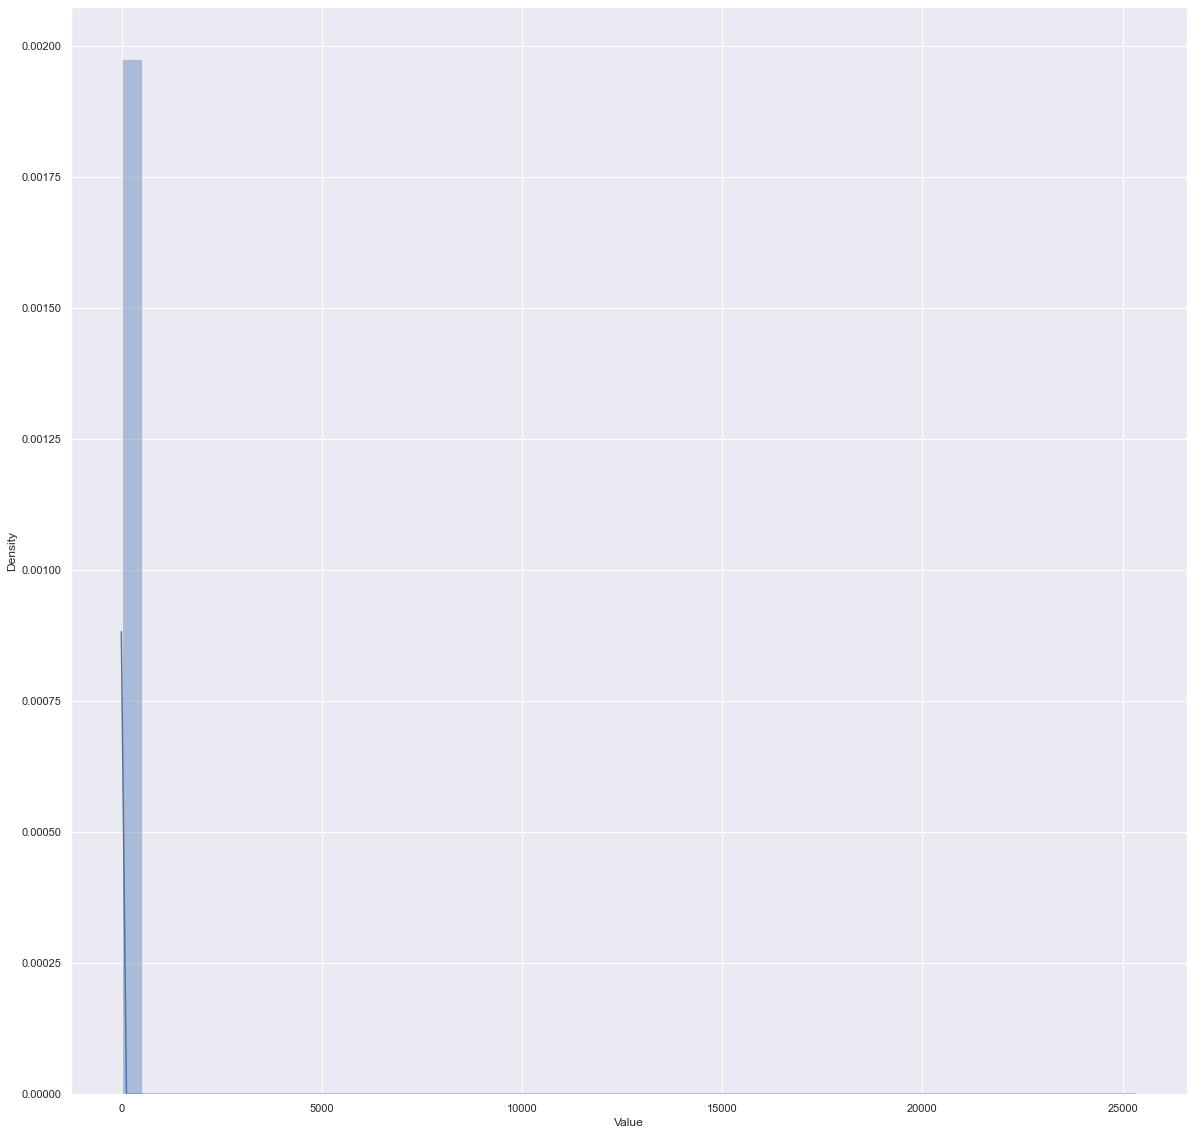

In [54]:
# Distplot de mise en évidence des Outliers :

sns.distplot(sodium['Value'])

# III Etude des Variables Quantitatives par Matplotlib et par Seaborn :

# - Sodium :

In [55]:
# Dataframe "Sodium" :
sodium = dudikoff[dudikoff['Variable']=='Sodium_100g']
sodium.dropna()

,Variable,Value
5132352,Sodium_100g,0.798815
5132353,Sodium_100g,0.0
5132354,Sodium_100g,0.25
5132355,Sodium_100g,0.482
5132356,Sodium_100g,0.798815
...,...,...
5453119,Sodium_100g,0.798815
5453120,Sodium_100g,0.0
5453121,Sodium_100g,0.798815
5453122,Sodium_100g,0.798815


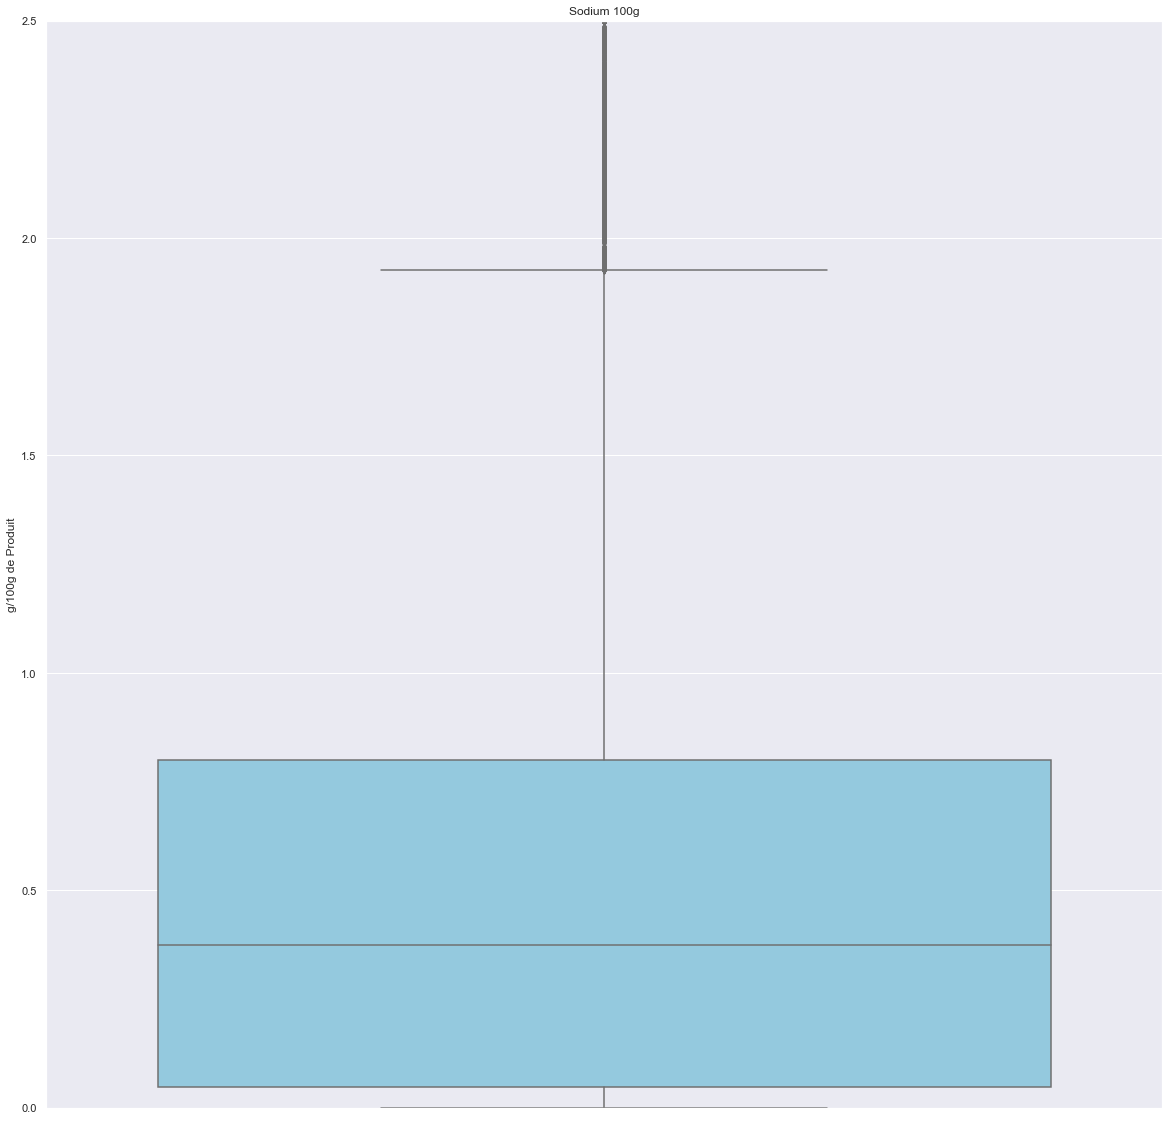

In [56]:
# Boxplot "Sodium" :

sodium = dudikoff[dudikoff['Variable']=='Sodium_100g']
sodium.dropna()
ax = sns.boxplot(y="Value", data = sodium, color = 'skyblue')
plt.ylim(0,2.5)
ax.set_title('Sodium 100g')
ax.set_ylabel('g/100g de Produit')
plt.show()

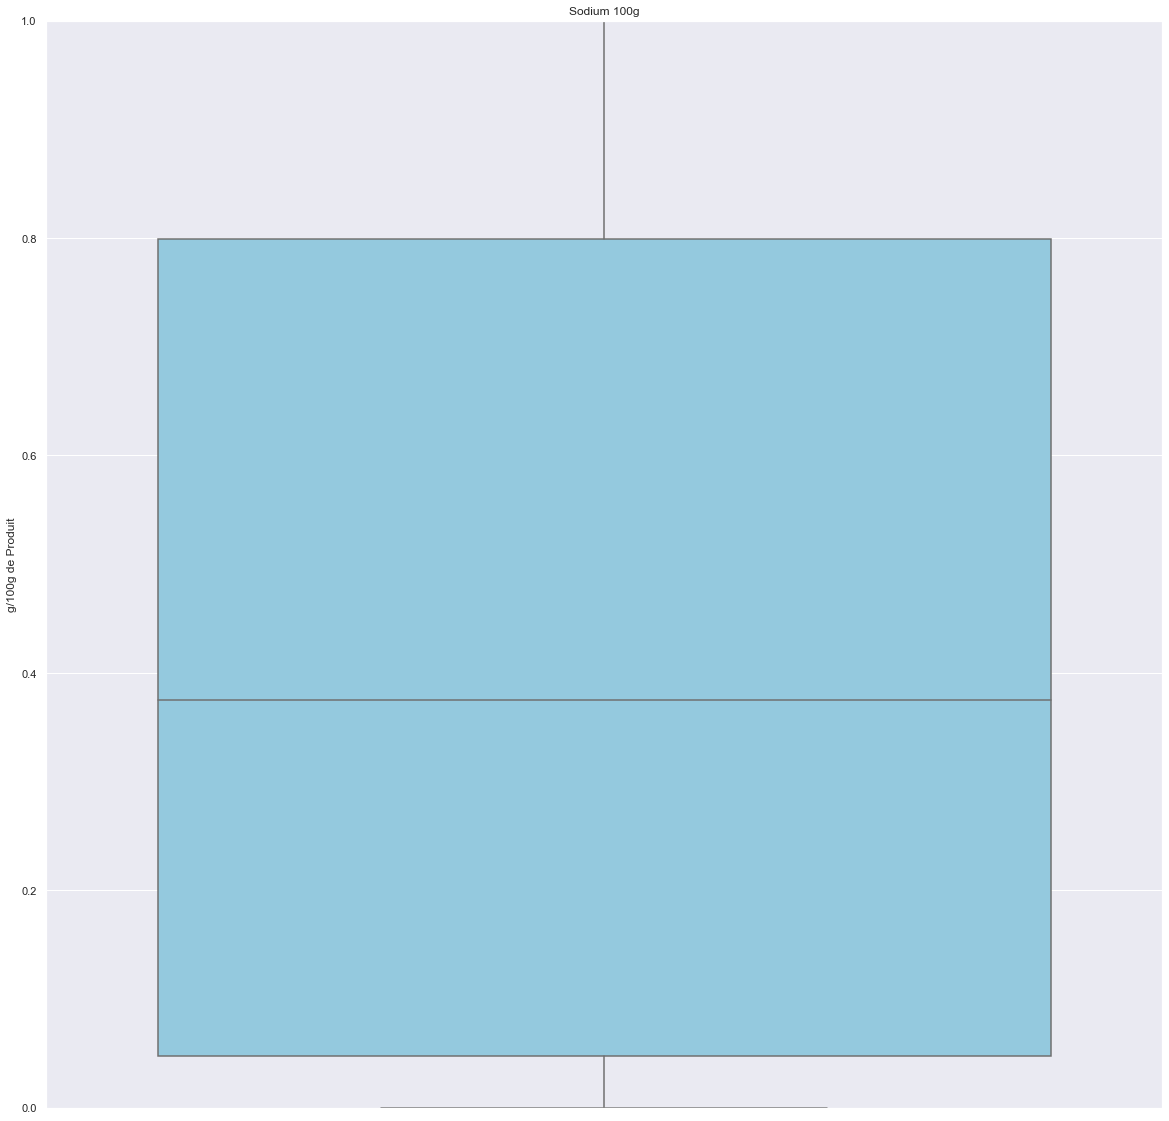

In [57]:
# Boxplot "Zoomée" "Sodium" :

sodium = dudikoff[dudikoff['Variable']=='Sodium_100g']
sodium.dropna()
ax = sns.boxplot(y ="Value", data = sodium, color = 'skyblue')
plt.ylim(0,1)
ax.set_title('Sodium 100g')
ax.set_ylabel('g/100g de Produit')
plt.show()

In [58]:
# Localisation des Valeurs "Sodium" supérieures à 100g :

print(np.where(sodium['Value'] > 100))

# Calcul du Z Score pour déterminer les Outliers :

cols1 = list(sodium.Value)
cols1

# Données Statisitiques des Valeurs de la dataframe "Sodium" :

from scipy import stats
stats.describe(cols1)

# Moyenne de la dataframe "Sodium" :

mean=np.mean(cols1)
mean

# Ecart Type de la dataframe "Sodium" :

std=np.std(cols1)
std

# Mise en évidence des Outliers par la Technique du Z Score :

threshold = 3
outlier = []
for i in cols1:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('Outliers in dataset are', outlier)

(array([  1435,   7983,  11129,  20821,  21892,  23590,  51348,  58007,
        68379,  68388,  94631, 105006, 106330, 108367, 120994, 120995,
       120996, 120999, 121005, 121006, 121892, 122061, 135064, 139595,
       140616, 145844, 160684, 165311, 172421, 172425, 176694, 274767,
       284225, 298059]),)
Outliers in dataset are [342.857, 307.692, 281.25, 234.2, 800.0, 857.143, 708.333, 432.432, 338.028, 519.048, 965.517, 448.485, 262.5, 266.667, 266.667, 266.667, 266.667, 266.667, 266.667, 238.095, 1400.0, 1200.0, 166.078, 25320.0, 657.143, 400.0, 150.0, 176.471, 366.141732283465]


In [59]:
# Test du repérage par Z Score :

sodium.loc[sodium.Value == 234.2]

,Variable,Value
5154244,Sodium_100g,234.2


In [60]:
# Correction Outliers "Sodium" :
sodium2 = sodium[sodium.Value.between(0,100)]

In [61]:
# Valeur Maximale de la colonne "Sodium" :

column = sodium2["Value"]
max_value = column.max()
max_value

100.0

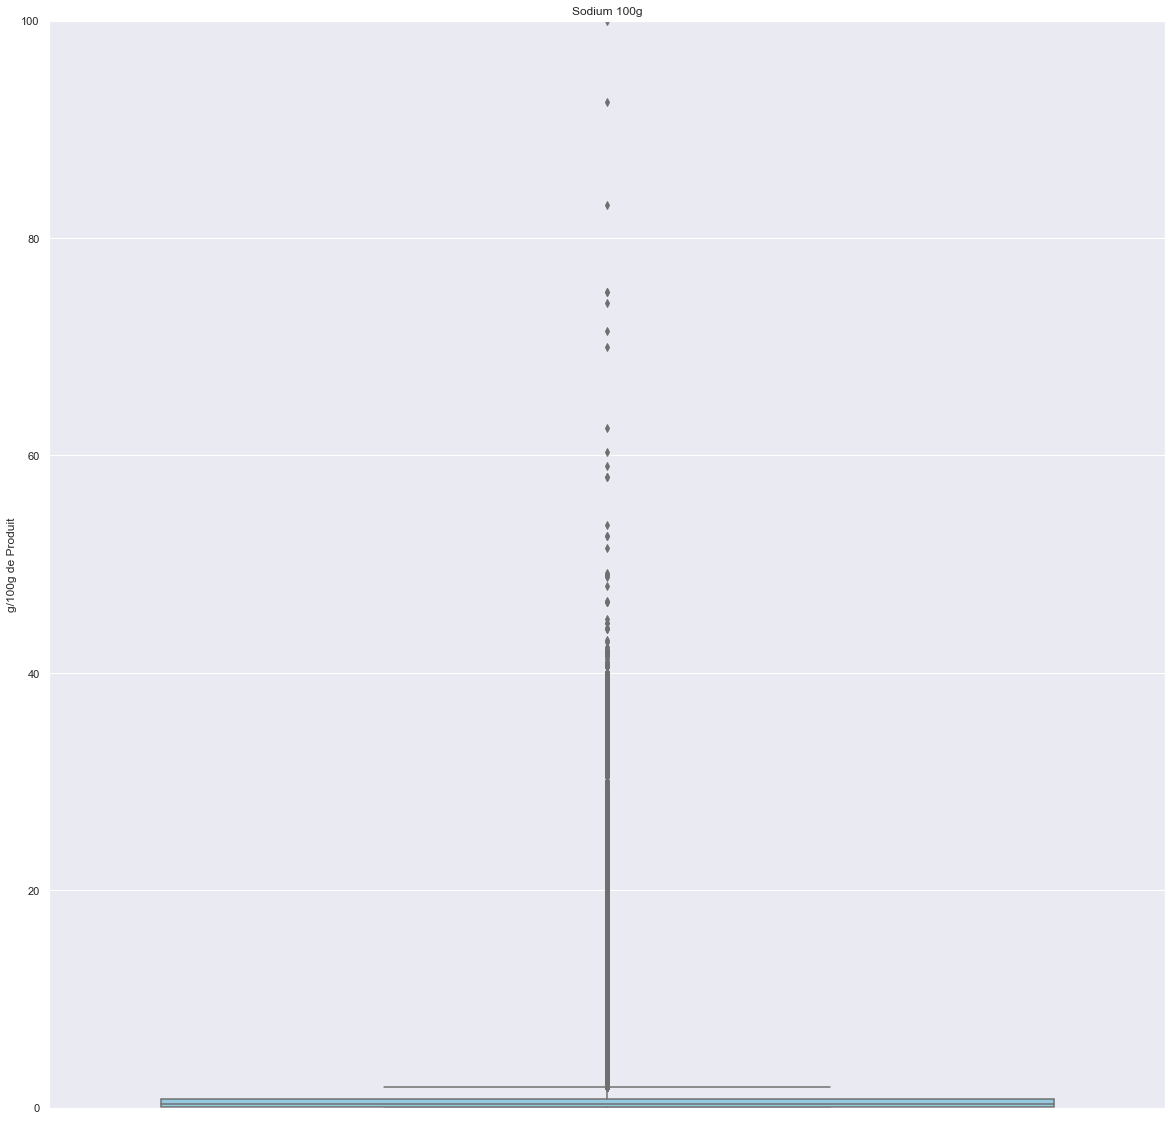

In [62]:
# Boxplot "Sodium" sans outlier :

ax = sns.boxplot(y="Value", data = sodium2, color = 'skyblue')
plt.ylim(0,100)
ax.set_title('Sodium 100g')
ax.set_ylabel('g/100g de Produit')
plt.show()

# - Sel :

In [63]:
# Dataframe "Salt" :

salt = dudikoff[dudikoff['Variable']=='Salt_100g']
salt.dropna()

,Variable,Value
4811580,Salt_100g,2.028624
4811581,Salt_100g,0.0
4811582,Salt_100g,0.635
4811583,Salt_100g,1.22428
4811584,Salt_100g,2.028624
...,...,...
5132347,Salt_100g,2.028624
5132348,Salt_100g,0.0
5132349,Salt_100g,2.028624
5132350,Salt_100g,2.028624


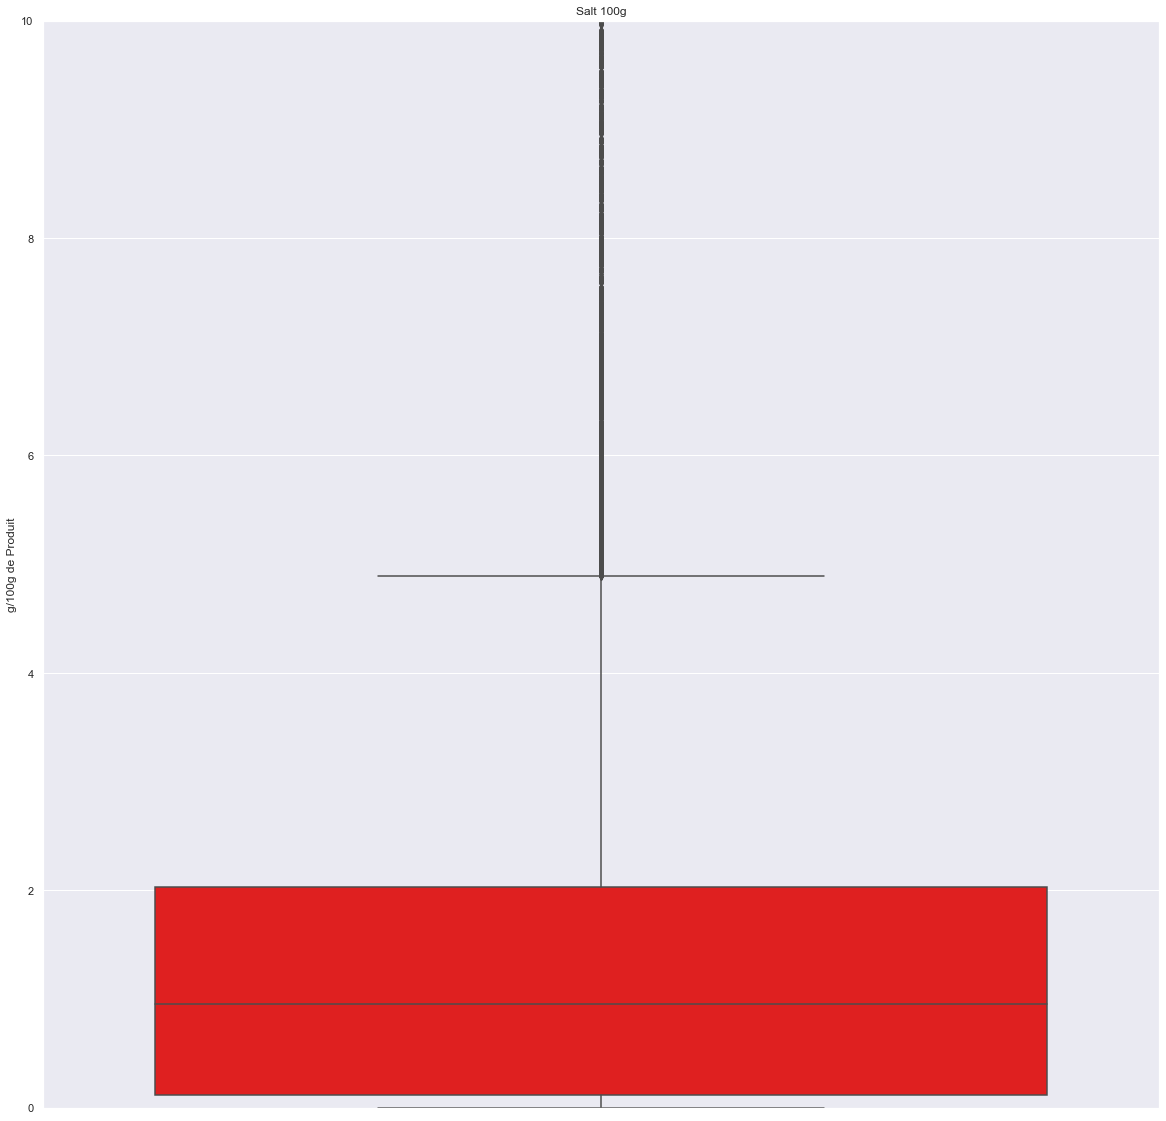

In [64]:
# Boxplot "Salt" :

salt = dudikoff[dudikoff['Variable']=='Salt_100g']
salt.dropna()
ax = sns.boxplot(y="Value", data = salt, color = 'red')
plt.ylim(0,10)
ax.set_title('Salt 100g')
ax.set_ylabel('g/100g de Produit')
plt.show()

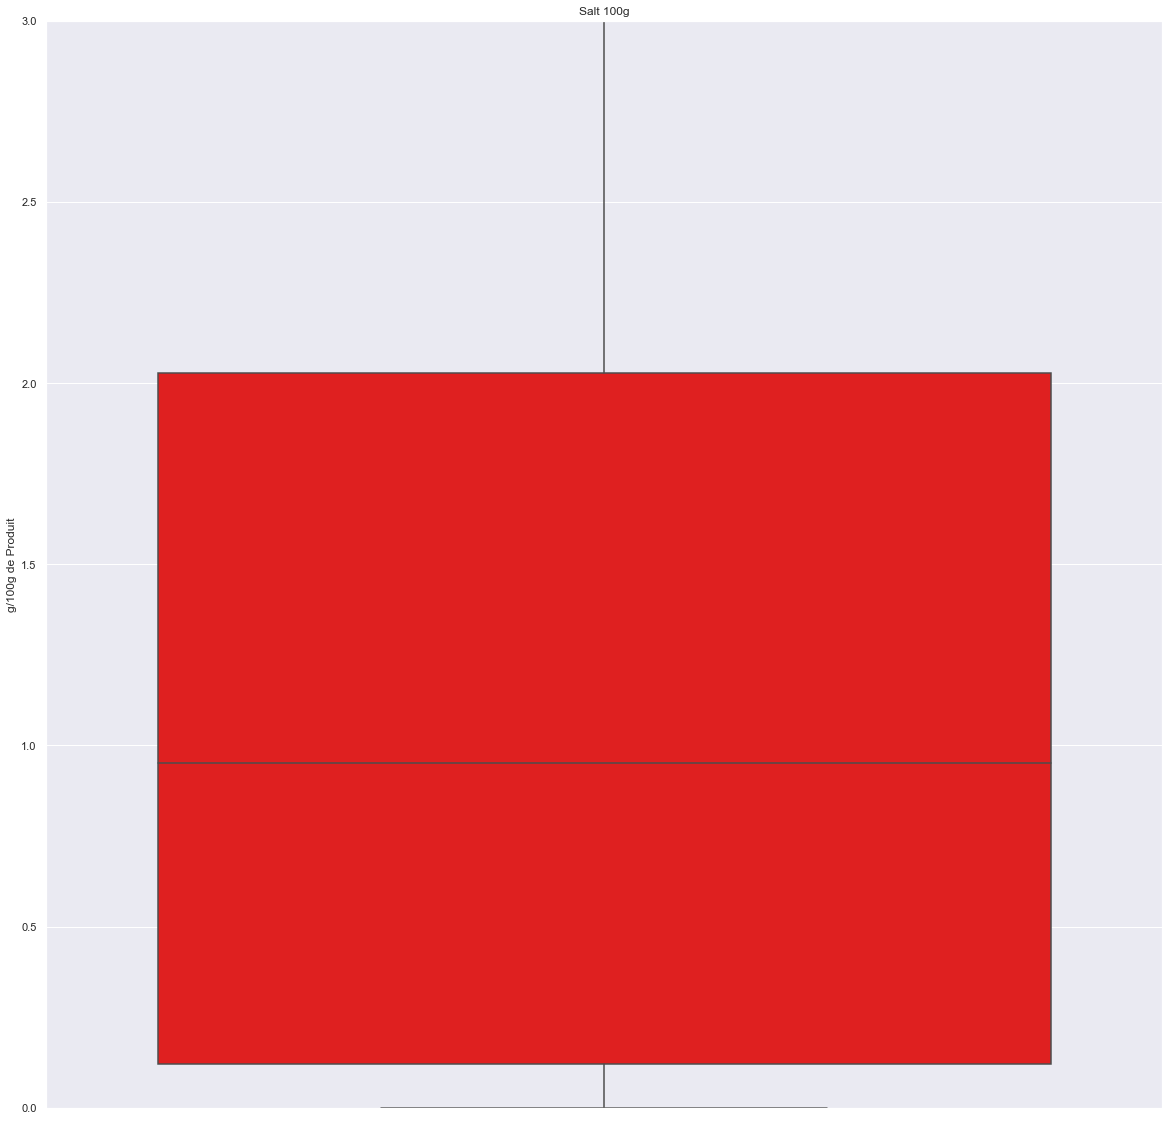

In [65]:
# Boxplot "Zoomée" "Salt" :

salt = dudikoff[dudikoff['Variable']=='Salt_100g']
salt.dropna()
ax = sns.boxplot(y ="Value", data = salt, color = 'red')
plt.ylim(0,3)
ax.set_title('Salt 100g')
ax.set_ylabel('g/100g de Produit')
plt.show()

In [66]:
# Localisation des Valeurs "Salt" supérieures à 100g :

print(np.where(salt['Value'] > 100))

# Calcul du Z Score pour déterminer les Outliers :

cols2 = list(salt.Value)
cols2

# Données Statisitiques des Valeurs de la dataframe "Salt" :

from scipy import stats
stats.describe(cols2)

# Moyenne de la dataframe "Salt" :

mean=np.mean(cols2)
mean

# Ecart Type de la dataframe "Salt" :

std=np.std(cols2)
std

# Mise en évidence des Outliers par la Technique du Z Score :

threshold = 3
outlier = []
for i in cols2:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('Outliers in dataset are', outlier)

(array([   501,   1435,   3472,   7037,   7983,  11129,  18588,  18845,
        18848,  18851,  18856,  18857,  18858,  18859,  18869,  18877,
        18878,  19014,  20821,  21619,  21626,  21627,  21632,  21633,
        21634,  21635,  21892,  23590,  25671,  28787,  32371,  33630,
        39679,  40408,  40409,  40410,  40411,  40412,  43049,  43772,
        43773,  49970,  49972,  50488,  51348,  55514,  58007,  61552,
        63824,  65202,  68379,  68388,  68507,  74261,  74685,  74686,
        74687,  75834,  75835,  75838,  79161,  81378,  81379,  90930,
        90982,  90985,  93914,  93915,  94631, 105006, 106330, 106360,
       106361, 106544, 106545, 106880, 108367, 109090, 109154, 109195,
       110831, 113216, 113278, 115253, 115865, 115866, 115872, 117667,
       119185, 119186, 119860, 119863, 120800, 120946, 120952, 120960,
       120994, 120995, 120996, 120999, 121005, 121006, 121706, 121707,
       121892, 122061, 125882, 131415, 132084, 132086, 132087, 132090,
     

In [67]:
# Test du repérage par Z Score :

salt.loc[salt.Value == 2032.0]

,Variable,Value
4835170,Salt_100g,2032.0


In [68]:
# Correction Outliers "Salt" :
salt2 = salt[salt.Value.between(0,100)]

In [69]:
# Valeur Maximale de la colonne "Salt" :

column = salt2["Value"]
max_value = column.max()
max_value

100.0

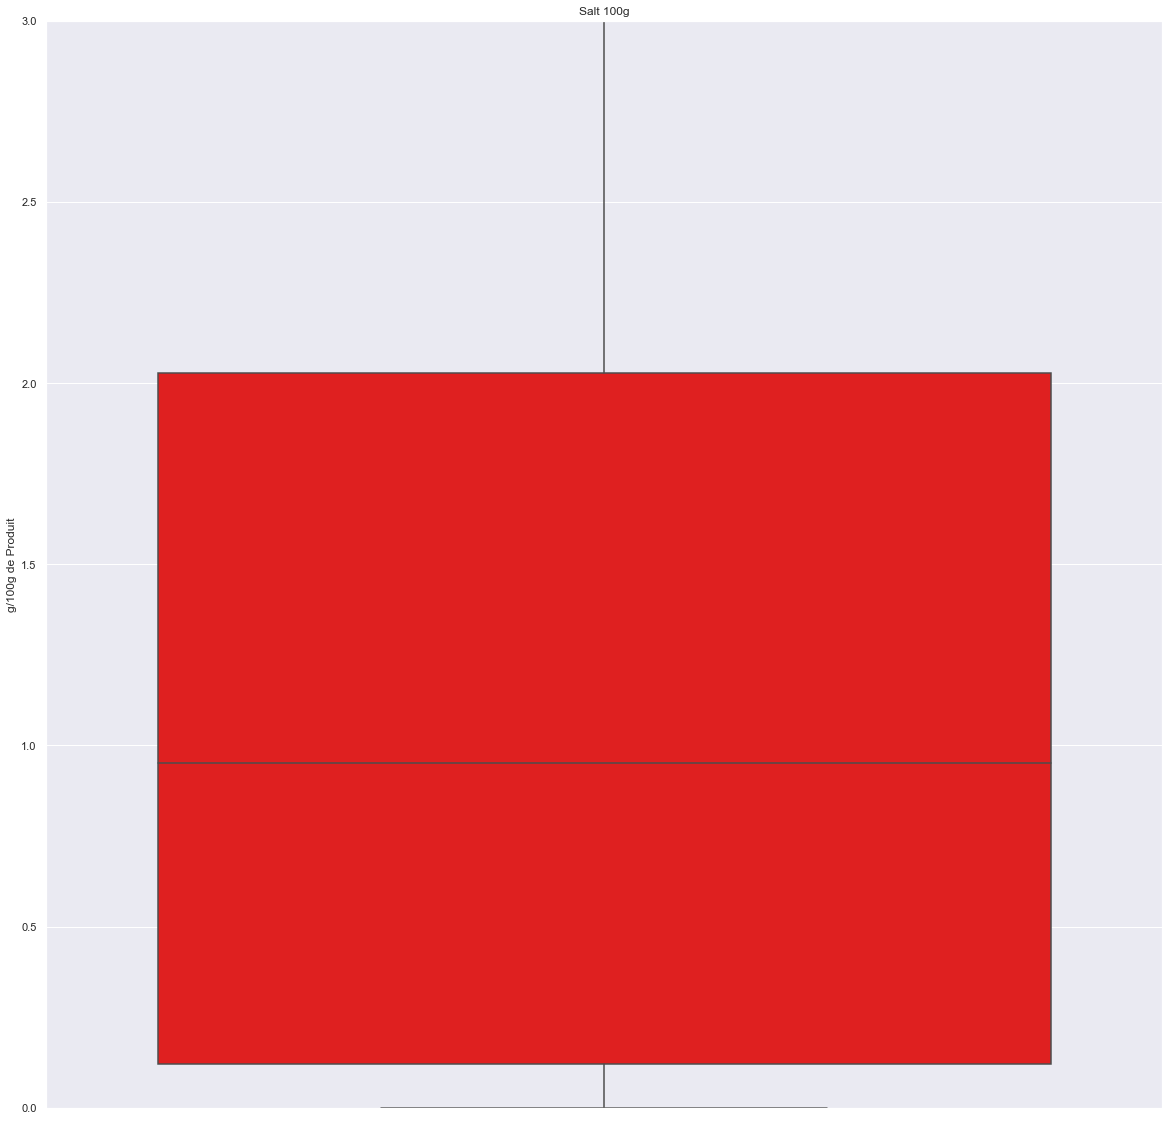

In [70]:
# Boxplot "Zoomée" "Salt" sans outlier :

salt2 = dudikoff[dudikoff['Variable']=='Salt_100g']
salt2.dropna()
ax = sns.boxplot(y ="Value", data = salt2, color = 'red')
plt.ylim(0,3)
ax.set_title('Salt 100g')
ax.set_ylabel('g/100g de Produit')
plt.show()

# - Protéines :

In [71]:
# Dataframe "Proteins" :

proteins = dudikoff[dudikoff['Variable']=='Proteins_100g']
proteins.dropna()

,Variable,Value
4490808,Proteins_100g,7.07594
4490809,Proteins_100g,3.57
4490810,Proteins_100g,17.86
4490811,Proteins_100g,17.86
4490812,Proteins_100g,8.57
...,...,...
4811575,Proteins_100g,7.07594
4811576,Proteins_100g,0.0
4811577,Proteins_100g,7.07594
4811578,Proteins_100g,7.07594


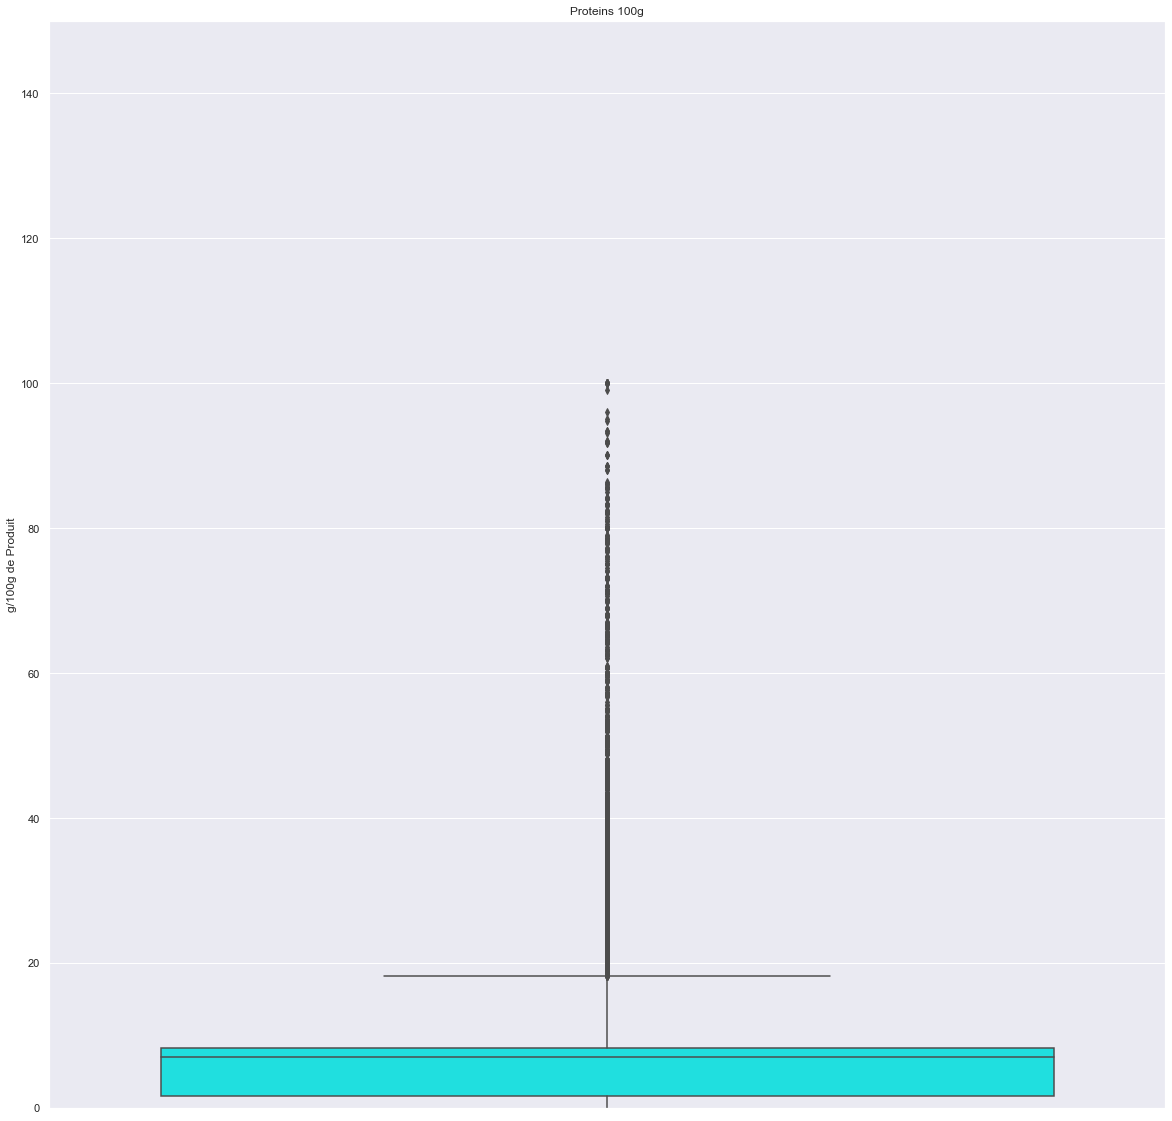

In [72]:
# Boxplot "Proteins" :

proteins = dudikoff[dudikoff['Variable']=='Proteins_100g']
proteins.dropna()
ax = sns.boxplot(y ="Value", data = proteins, color = 'cyan')
plt.ylim(0,150)
ax.set_title('Proteins 100g')
ax.set_ylabel('g/100g de Produit')
plt.show()

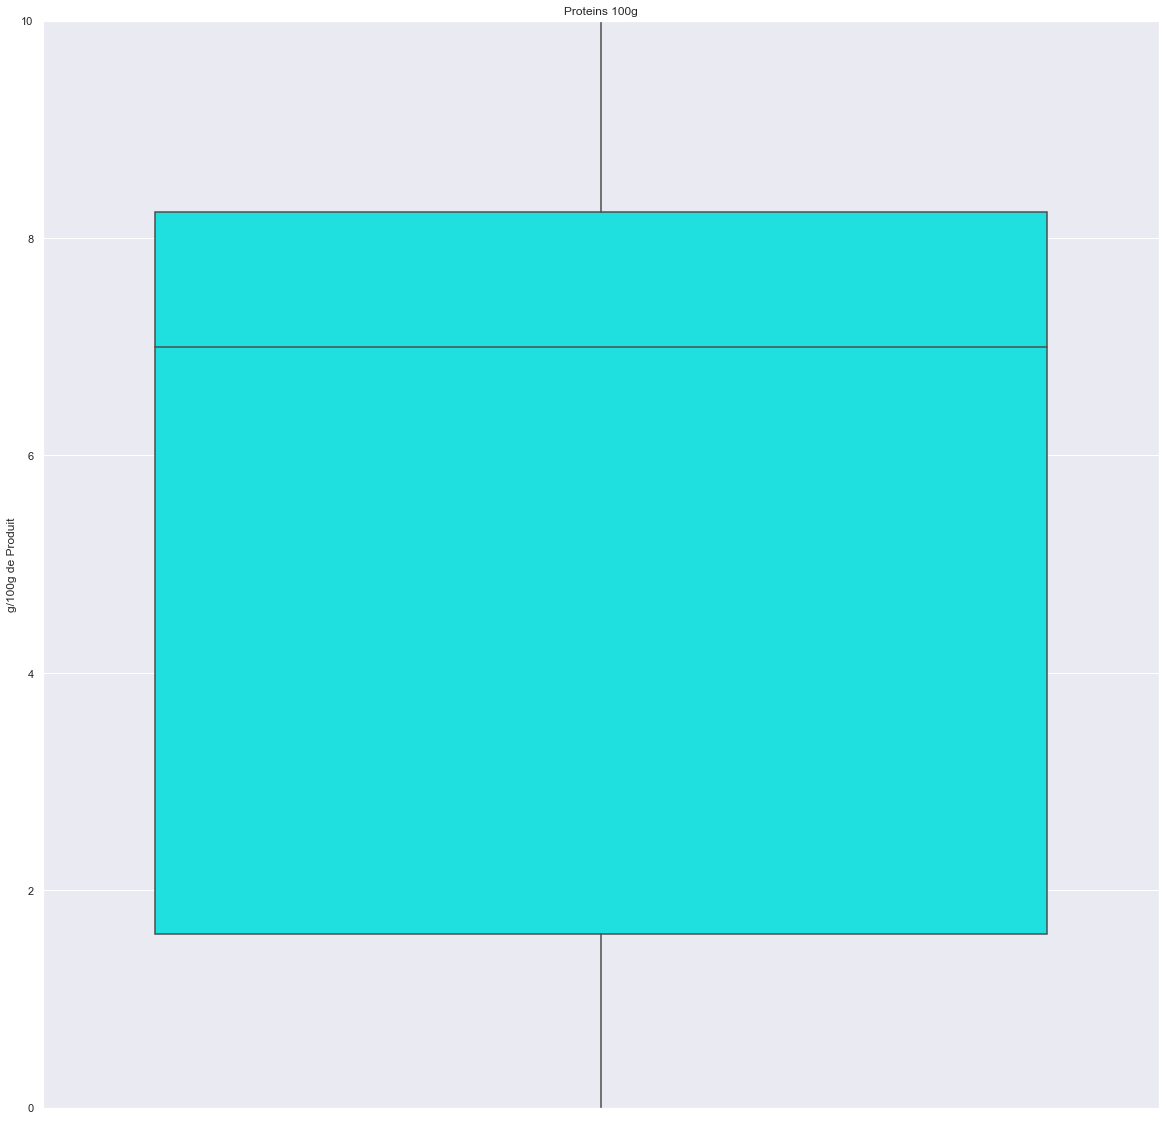

In [73]:
# Boxplot "Zoomée" "Proteins" :

proteins = dudikoff[dudikoff['Variable']=='Proteins_100g']
proteins.dropna()
ax = sns.boxplot(y ="Value", data = proteins, color = 'cyan')
plt.ylim(0,10)
ax.set_title('Proteins 100g')
ax.set_ylabel('g/100g de Produit')
plt.show()

In [74]:
# Localisation des Valeurs "Proteins" supérieures à 100g :

print(np.where(proteins['Value'] > 100))

# Calcul du Z Score pour déterminer les Outliers :

cols3 = list(proteins.Value)
cols3

# Données Statisitiques des Valeurs de la dataframe "Proteins" :

from scipy import stats
stats.describe(cols3)

# Moyenne de la dataframe "Proteins" :

mean=np.mean(cols3)
mean

# Ecart Type de la dataframe "Proteins" :

std=np.std(cols3)
std

# Mise en évidence des Outliers par la Technique du Z Score :

threshold = 12
outlier = []
for i in cols3:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('Outliers in dataset are', outlier)

(array([313506]),)
Outliers in dataset are [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 99.0, 100.0, 100.0, 100.0, 430.0]


In [75]:
# Test du repérage par Z Score :

proteins.loc[proteins.Value == 100.0]

,Variable,Value
4493675,Proteins_100g,100.0
4531842,Proteins_100g,100.0
4531843,Proteins_100g,100.0
4561874,Proteins_100g,100.0
4580919,Proteins_100g,100.0
4618333,Proteins_100g,100.0
4640883,Proteins_100g,100.0
4659639,Proteins_100g,100.0
4660926,Proteins_100g,100.0
4764351,Proteins_100g,100.0


In [76]:
# Correction Outliers "Proteins" :

proteins2 = proteins[proteins.Value.between(0,100)]

In [77]:
# Valeur Maximale de la colonne "Proteins" :

column = proteins2["Value"]
max_value = column.max()
max_value

100.0

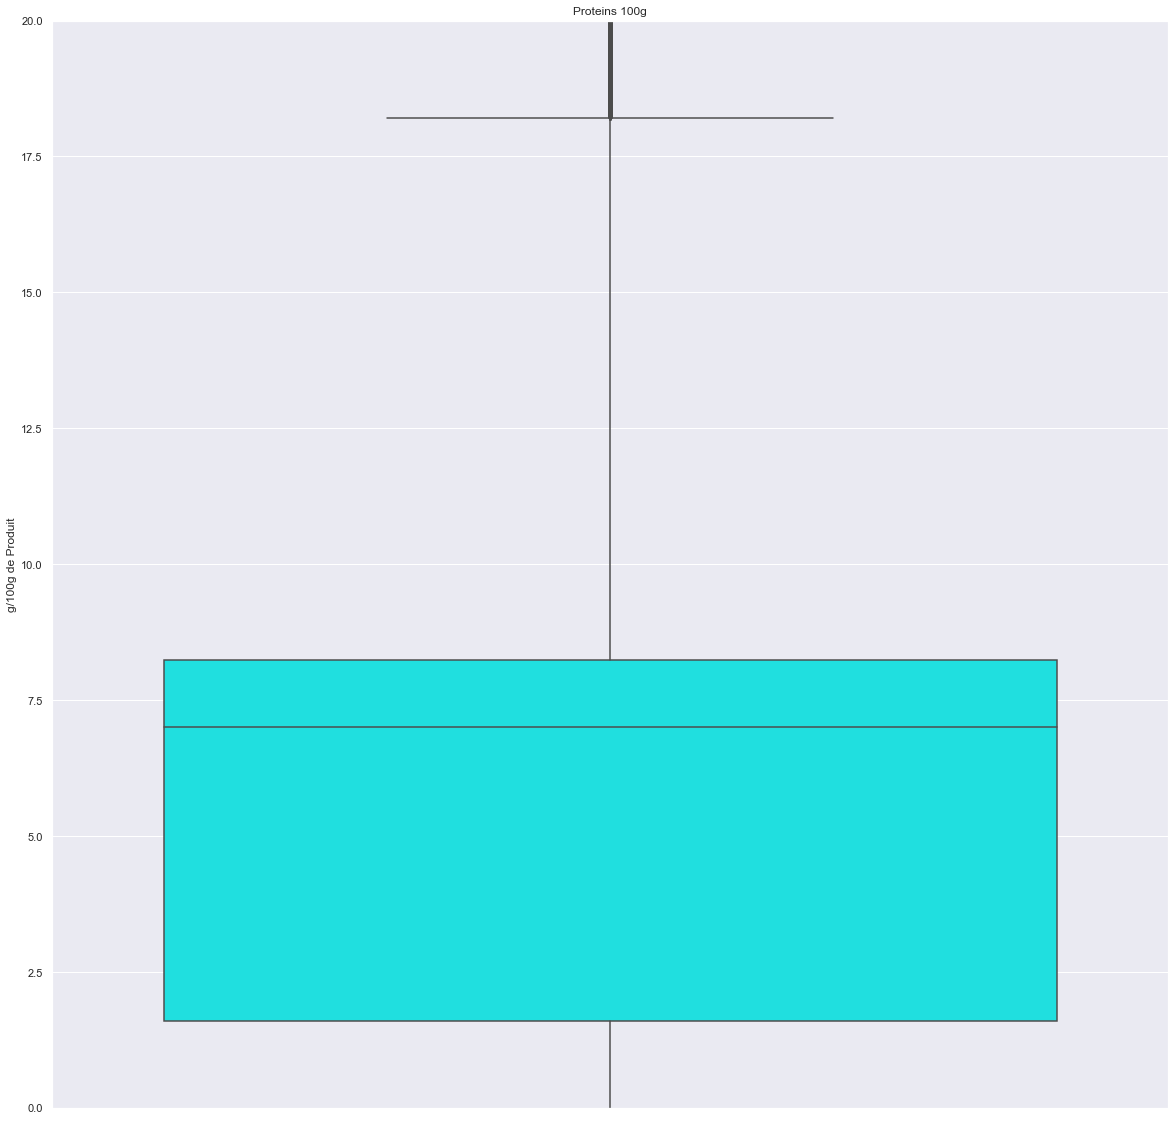

In [78]:
# Boxplot "Zoomée" Proteins sans outlier :

proteins2 = dudikoff[dudikoff['Variable']=='Proteins_100g']
proteins2.dropna()
ax = sns.boxplot(y ="Value", data = proteins2, color = 'cyan')
plt.ylim(0,20)
ax.set_title('Proteins 100g')
ax.set_ylabel('g/100g de Produit')
plt.show()

# - Fibre :

In [79]:
# Dataframe "Fiber" :

fiber = dudikoff[dudikoff['Variable']=='Fiber_100g']
fiber.dropna()

,Variable,Value
4170036,Fiber_100g,2.862111
4170037,Fiber_100g,3.6
4170038,Fiber_100g,7.1
4170039,Fiber_100g,7.1
4170040,Fiber_100g,5.7
...,...,...
4490803,Fiber_100g,2.862111
4490804,Fiber_100g,0.0
4490805,Fiber_100g,2.862111
4490806,Fiber_100g,2.862111


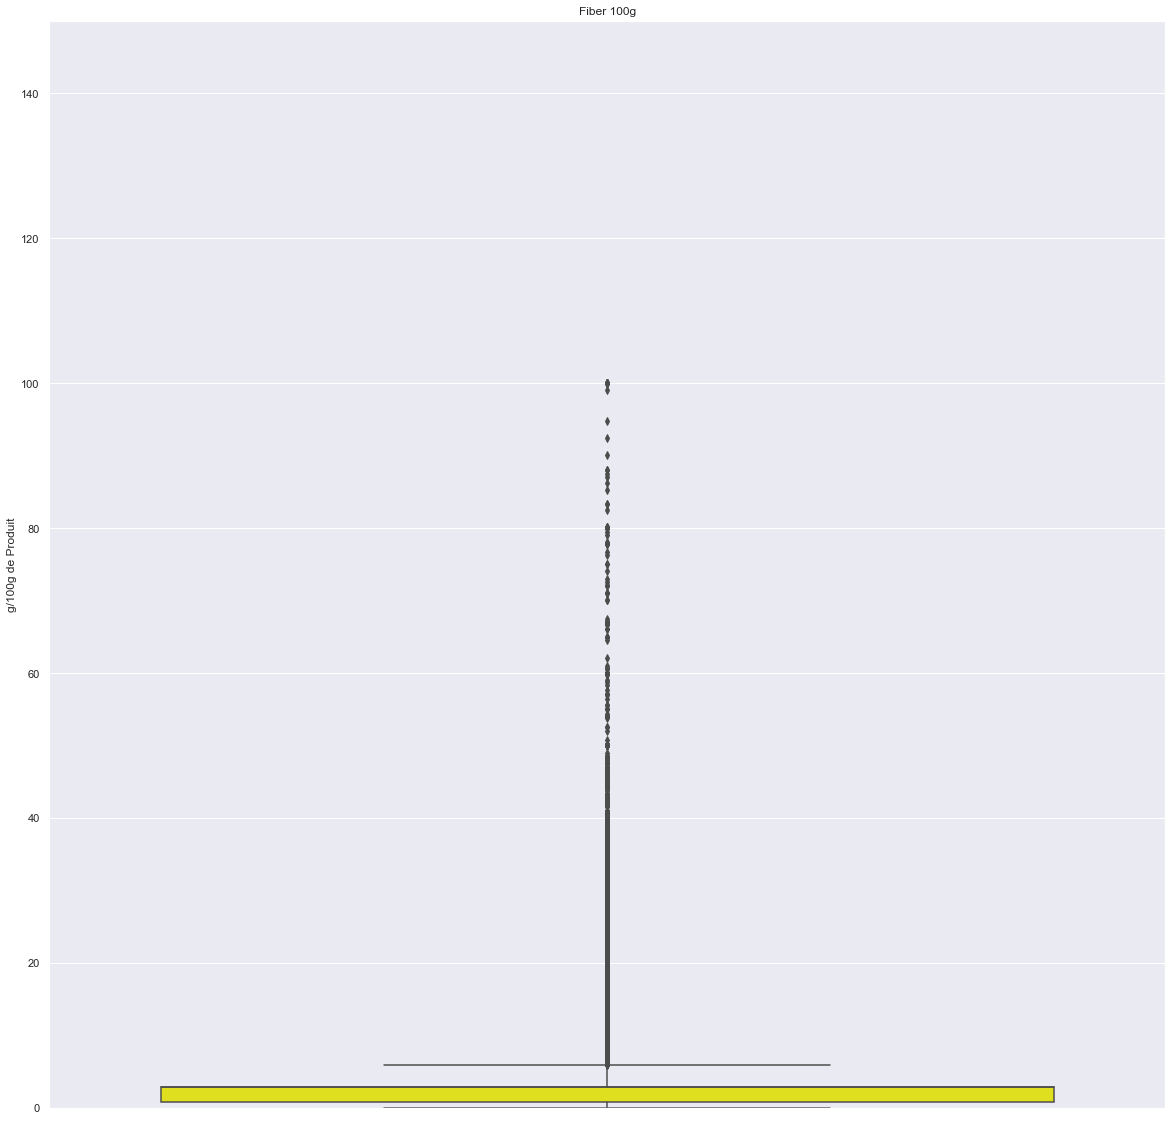

In [80]:
# Boxplot "Fiber" :

fiber = dudikoff[dudikoff['Variable']=='Fiber_100g']
fiber.dropna()
ax = sns.boxplot(y ="Value", data = fiber, color = "yellow")
plt.ylim(0,150)
ax.set_title('Fiber 100g')
ax.set_ylabel('g/100g de Produit')
plt.show()

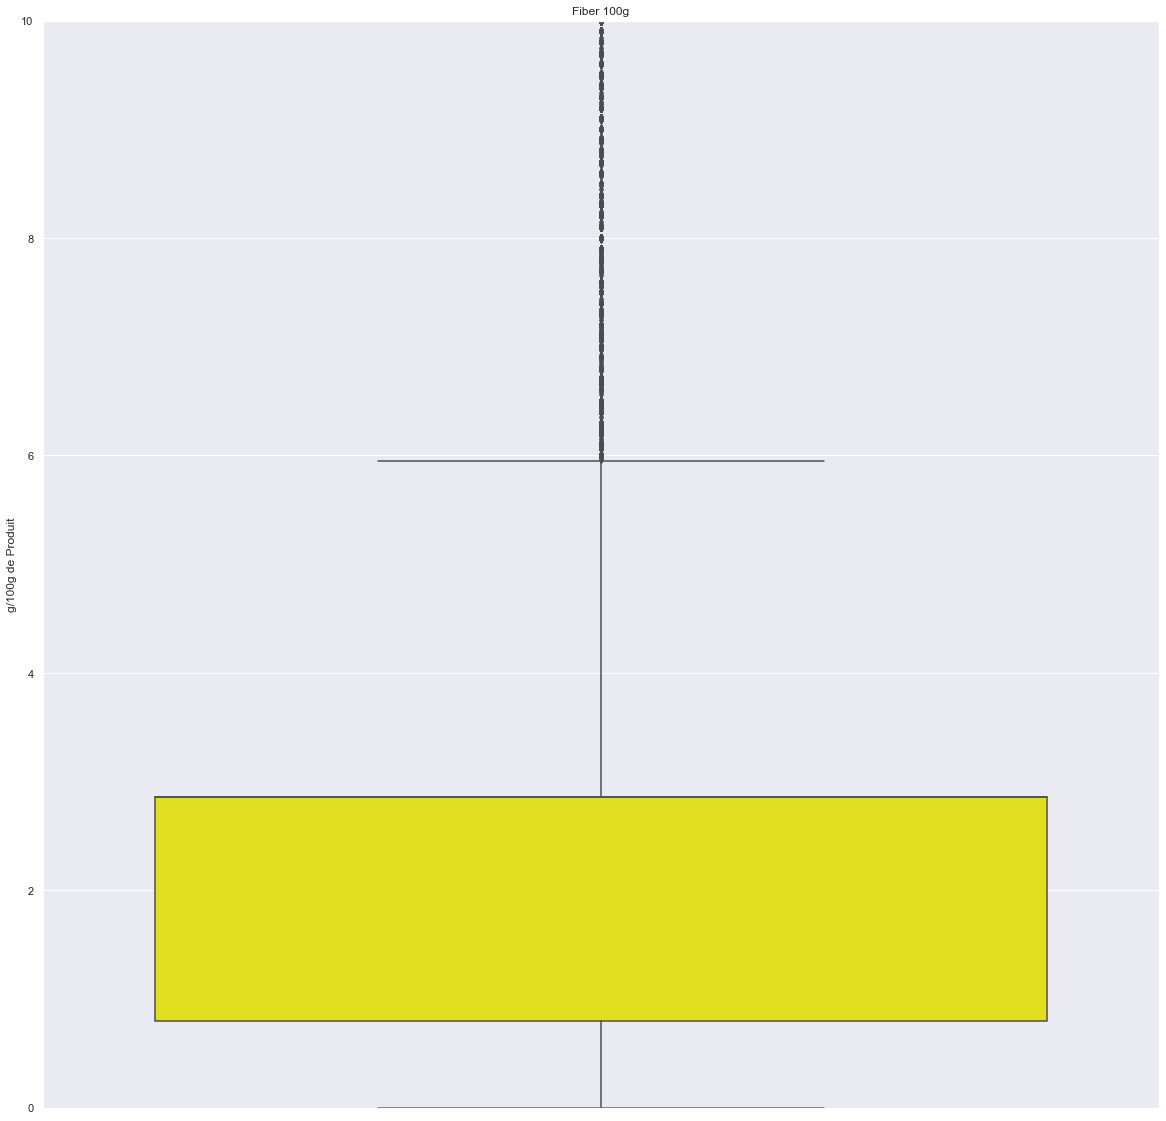

In [81]:
# Boxplot "Zoomée" "Fiber" :

fiber = dudikoff[dudikoff['Variable']=='Fiber_100g']
fiber.dropna()
ax = sns.boxplot(y ="Value", data = fiber, color = "yellow")
plt.ylim(0,10)
ax.set_title('Fiber 100g')
ax.set_ylabel('g/100g de Produit')
plt.show()

In [82]:
# Localisation des Valeurs "Fiber" supérieures à 100g :

print(np.where(fiber['Value'] > 100))

# Calcul du Z Score pour déterminer les Outliers :

cols4 = list(fiber.Value)
cols4

# Données Statisitiques des Valeurs de la dataframe "Fiber" :

from scipy import stats
stats.describe(cols4)

# Moyenne de la dataframe "Fiber" :

mean=np.mean(cols4)
mean

# Ecart Type de la dataframe "Fiber" :

std=np.std(cols4)
std

# Mise en évidence des Outliers par la Technique du Z Score :

threshold = 10
outlier = []
for i in cols4:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('Outliers in dataset are', outlier)

(array([ 64352, 155803, 298897, 313506]),)
Outliers in dataset are [166.7, 250.0, 178.0, 5380.0]


In [83]:
# Test du repérage par Z Score :
fiber.loc[fiber.Value == 250.0]

,Variable,Value
4325839,Fiber_100g,250.0


In [84]:
# Correction Outliers "Fiber" :

fiber2 = fiber[fiber.Value.between(0,100)]

In [85]:
# Valeur Maximale de la colonne "Fiber" :

column = fiber2["Value"]
max_value = column.max()
max_value

100.0

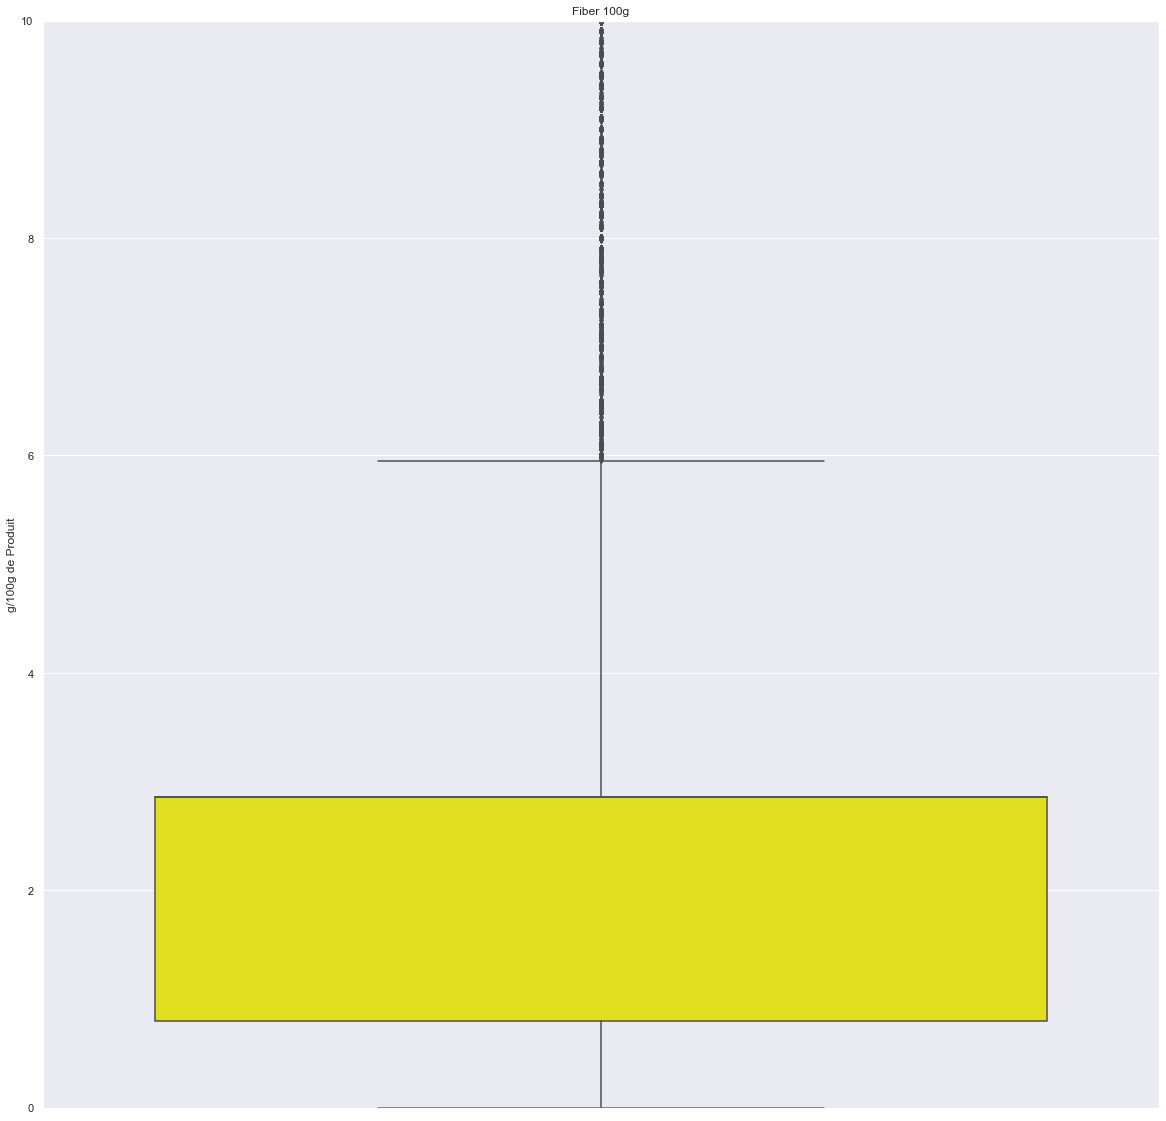

In [86]:
# Boxplot "Zoomée" "Fiber" sans outlier :

fiber2 = dudikoff[dudikoff['Variable']=='Fiber_100g']
fiber2.dropna()
ax = sns.boxplot(y ="Value", data = fiber2, color = 'yellow')
plt.ylim(0,10)
ax.set_title('Fiber 100g')
ax.set_ylabel('g/100g de Produit')
plt.show()

# - Sucre :

In [87]:
# Dataframe "Sugars" :

sugars = dudikoff[dudikoff['Variable']=='Sugars_100g']
sugars.dropna()

,Variable,Value
3849264,Sugars_100g,16.003484
3849265,Sugars_100g,14.29
3849266,Sugars_100g,17.86
3849267,Sugars_100g,3.57
3849268,Sugars_100g,16.003484
...,...,...
4170031,Sugars_100g,16.003484
4170032,Sugars_100g,0.0
4170033,Sugars_100g,16.003484
4170034,Sugars_100g,16.003484


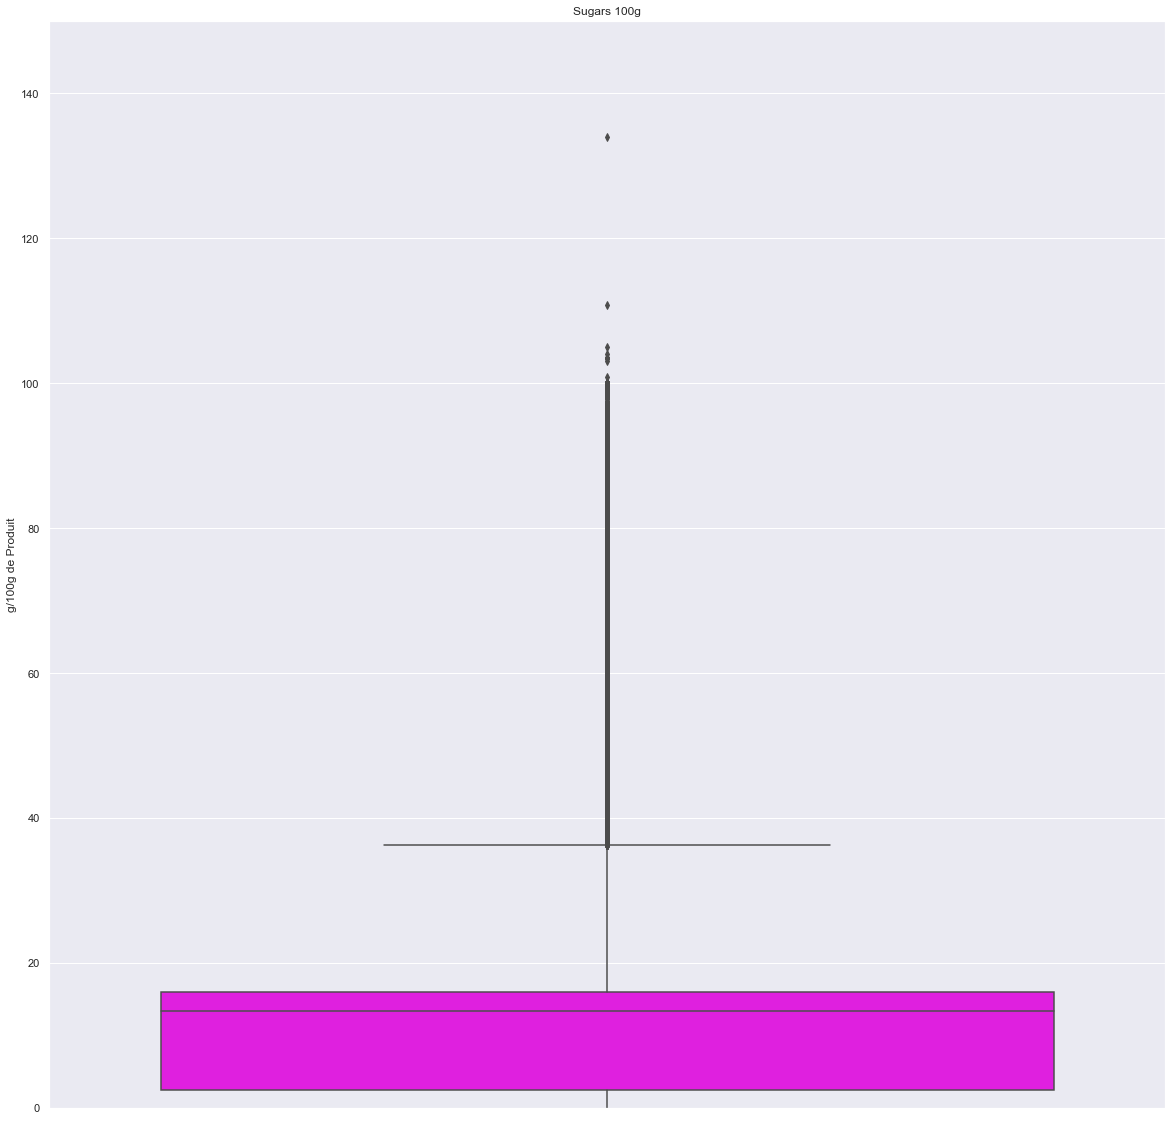

In [88]:
# Boxplot "Sugars" :

sugars = dudikoff[dudikoff['Variable']=='Sugars_100g']
sugars.dropna()
ax = sns.boxplot(y ="Value", data = sugars,color = "magenta")
plt.ylim(0,150)
ax.set_title('Sugars 100g')
ax.set_ylabel('g/100g de Produit')
plt.show()

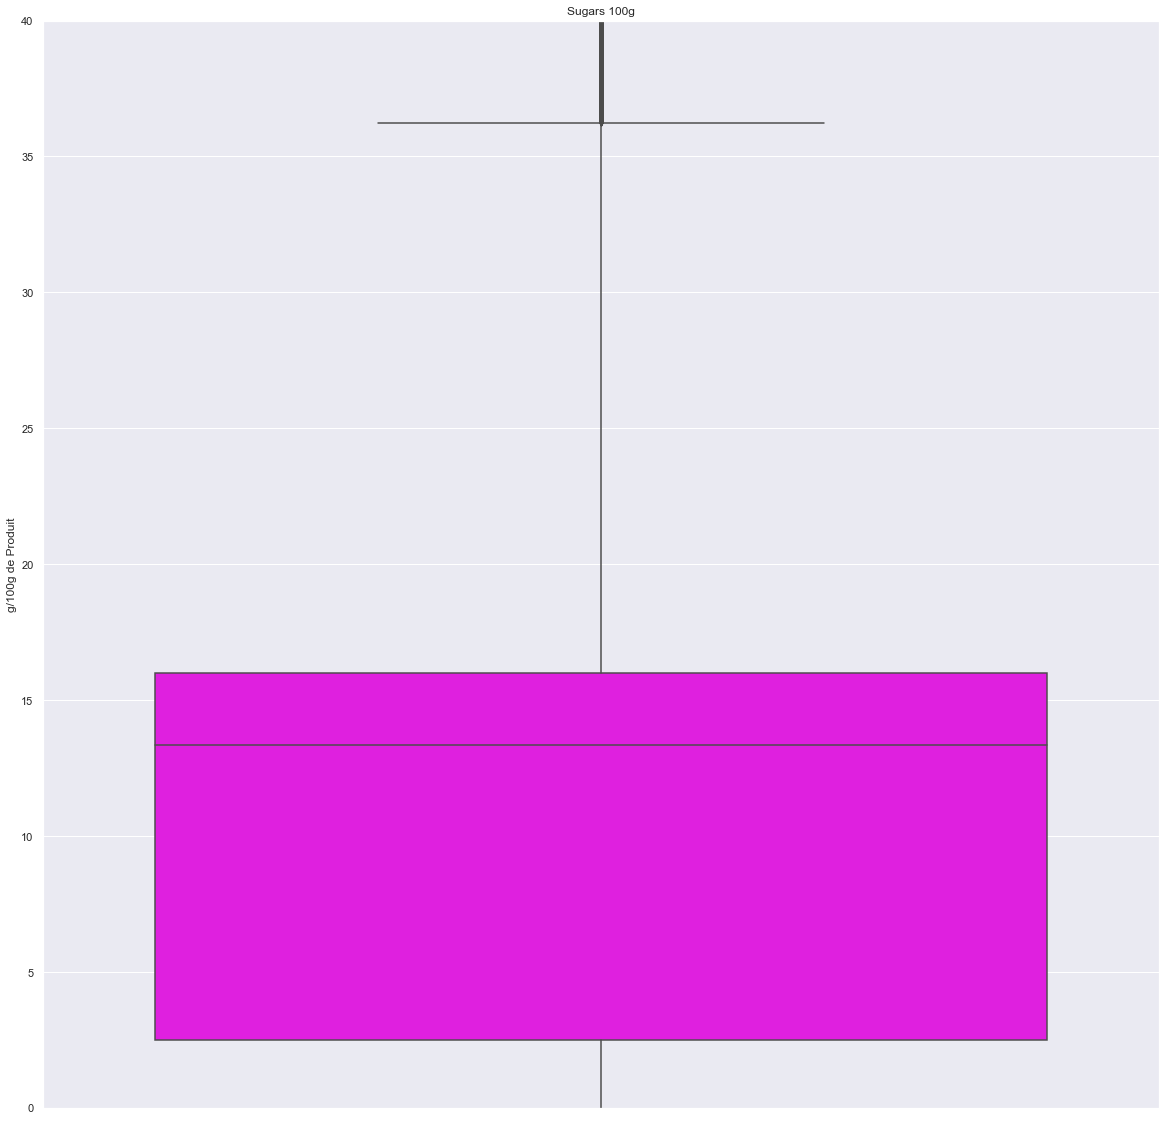

In [89]:
# Boxplot "Zoomée" "Sugars" :

sugars = dudikoff[dudikoff['Variable']=='Sugars_100g']
sugars.dropna()
ax = sns.boxplot(y ="Value", data = sugars,color = "magenta")
plt.ylim(0,40)
ax.set_title('Sugars 100g')
ax.set_ylabel('g/100g de Produit')
plt.show()

In [90]:
# Localisation des Valeurs "Sugars" supérieures à 100g :

print(np.where(sugars['Value'] > 100))

# Calcul du Z Score pour déterminer les Outliers :

cols5 = list(sugars.Value)
cols5

# Données Statisitiques des Valeurs de la dataframe "Sugars" :

from scipy import stats
stats.describe(cols5)

# Moyenne de la dataframe "Sugars" :

mean=np.mean(cols5)
mean

# Ecart Type de la dataframe "Sugars" :

std=np.std(cols5)
std

# Mise en évidence des Outliers par la Technique du Z Score :

threshold = 10
outlier = []
for i in cols5:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('Outliers in dataset are', outlier)

(array([111566, 133567, 155803, 202571, 239347, 260598, 260599, 260611,
       265108, 265110, 313506, 315621]),)
Outliers in dataset are [3520.0]


In [91]:
# Test du repérage par Z Score :

sugars.loc[sugars.Value == 3520.0]

,Variable,Value
4162770,Sugars_100g,3520.0


In [92]:
# Correction Outliers "Sugars" :

sugars2 = sugars[sugars.Value.between(0,100)]

In [93]:
# Valeur Maximale de la colonne Sucres :

column = sugars2["Value"]
max_value = column.max()
max_value

100.0

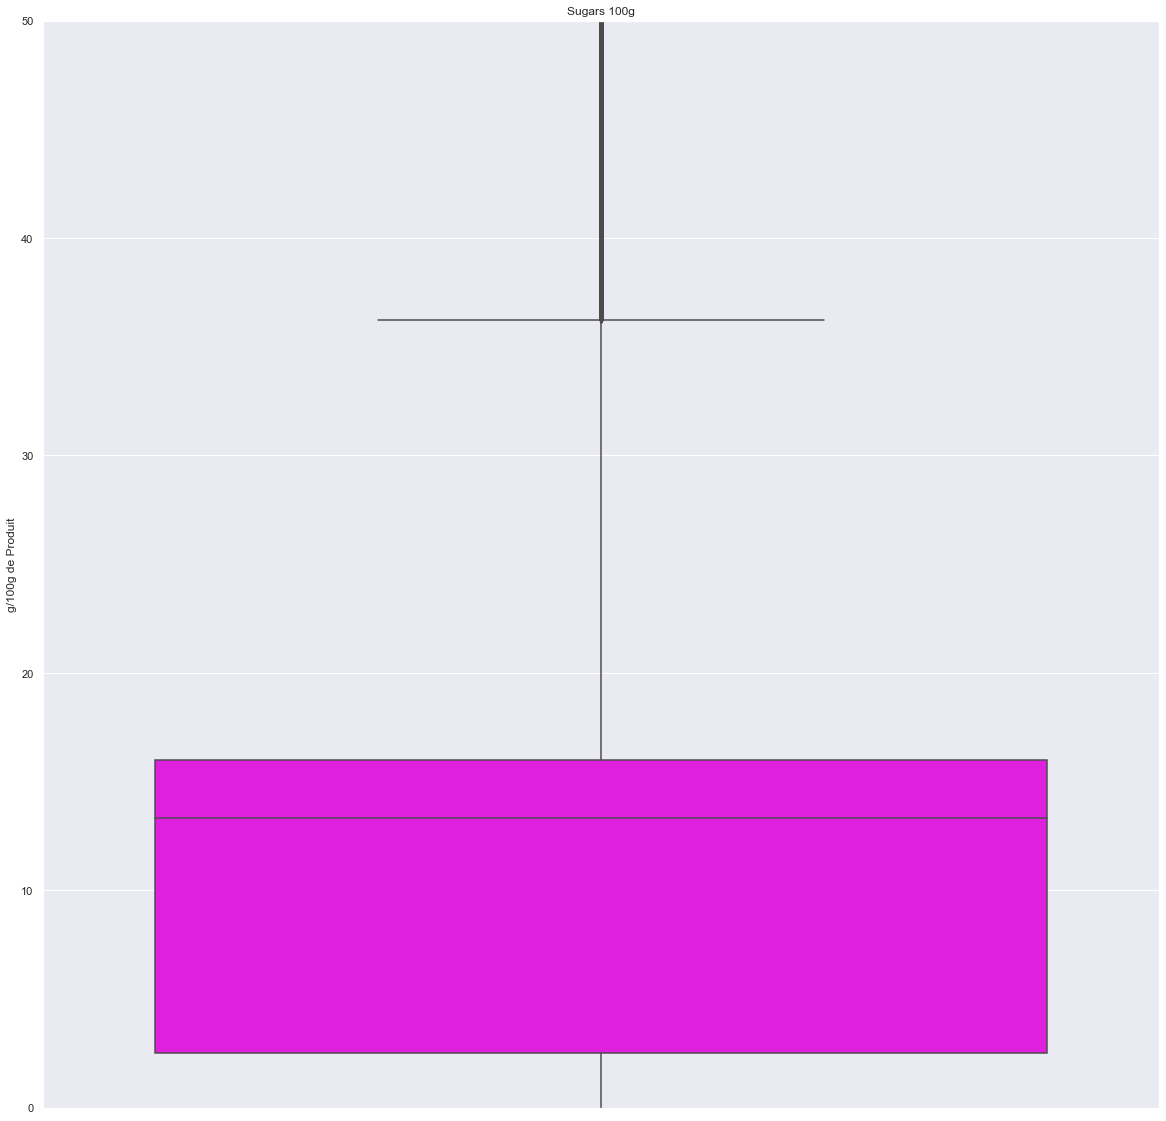

In [94]:
# Boxplot "Zoomée" Sugars sans outlier :

sugars2 = dudikoff[dudikoff['Variable']=='Sugars_100g']
sugars2.dropna()
ax = sns.boxplot(y ="Value", data = sugars2, color = 'magenta')
plt.ylim(0,50)
ax.set_title('Sugars 100g')
ax.set_ylabel('g/100g de Produit')
plt.show()

# - Carbohydrates :

In [95]:
# Dataframe "Carbohydrates" :

carbohydrates = dudikoff[dudikoff['Variable']=='Carbohydrates_100g']
carbohydrates.dropna()

,Variable,Value
3528492,Carbohydrates_100g,32.073981
3528493,Carbohydrates_100g,64.29
3528494,Carbohydrates_100g,60.71
3528495,Carbohydrates_100g,17.86
3528496,Carbohydrates_100g,77.14
...,...,...
3849259,Carbohydrates_100g,32.073981
3849260,Carbohydrates_100g,0.0
3849261,Carbohydrates_100g,32.073981
3849262,Carbohydrates_100g,32.073981


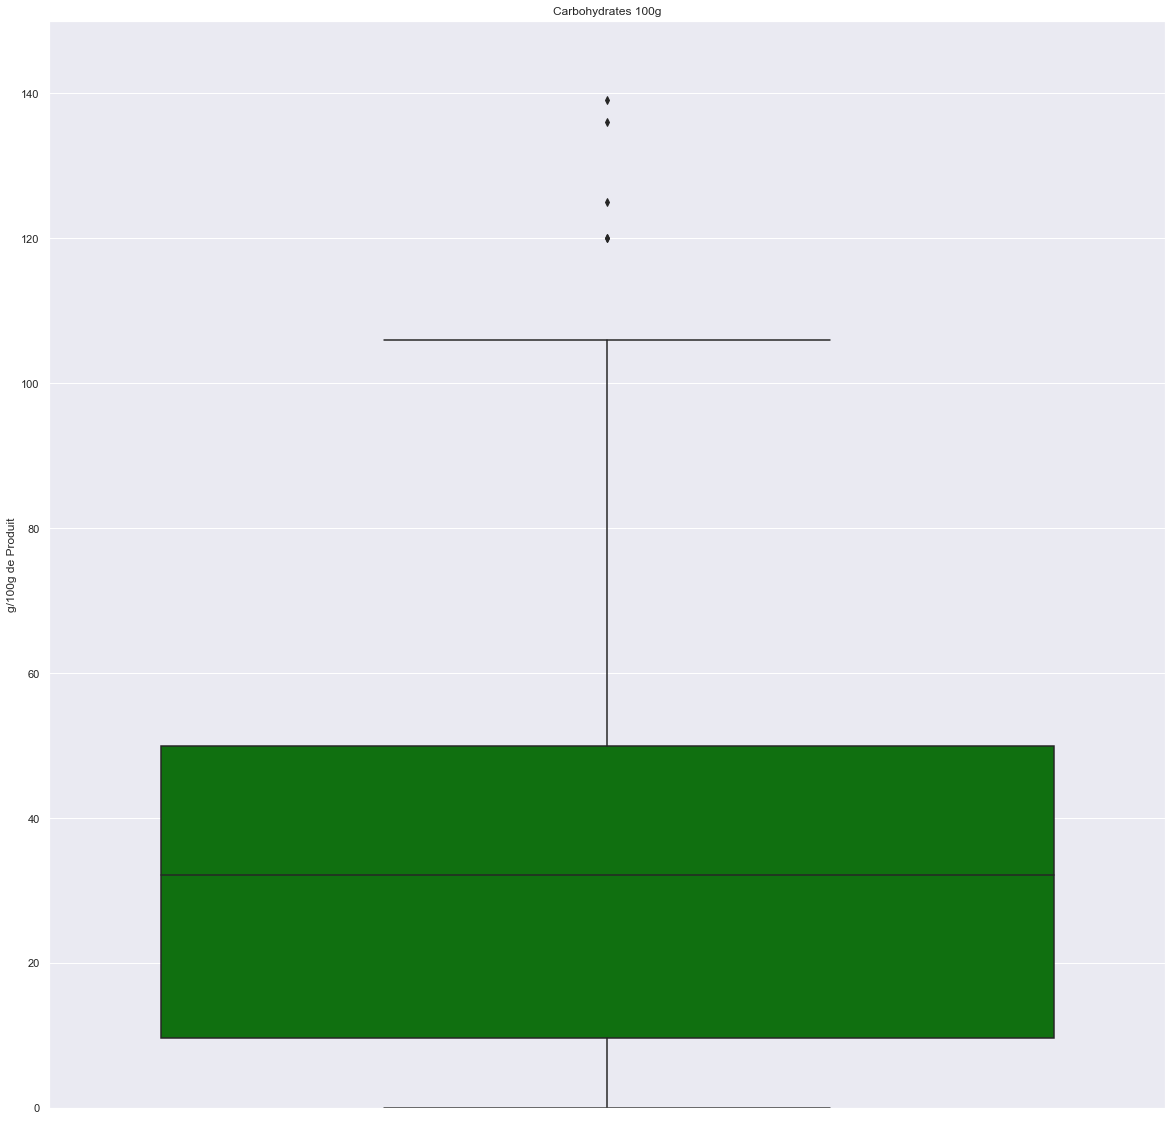

In [96]:
# Boxplot Carbohydrates :

carbohydrates = dudikoff[dudikoff['Variable']=='Carbohydrates_100g']
carbohydrates.dropna()
ax = sns.boxplot(y ="Value", data = carbohydrates,color = "green")
plt.ylim(0,150)
ax.set_title('Carbohydrates 100g')
ax.set_ylabel('g/100g de Produit')
plt.show()

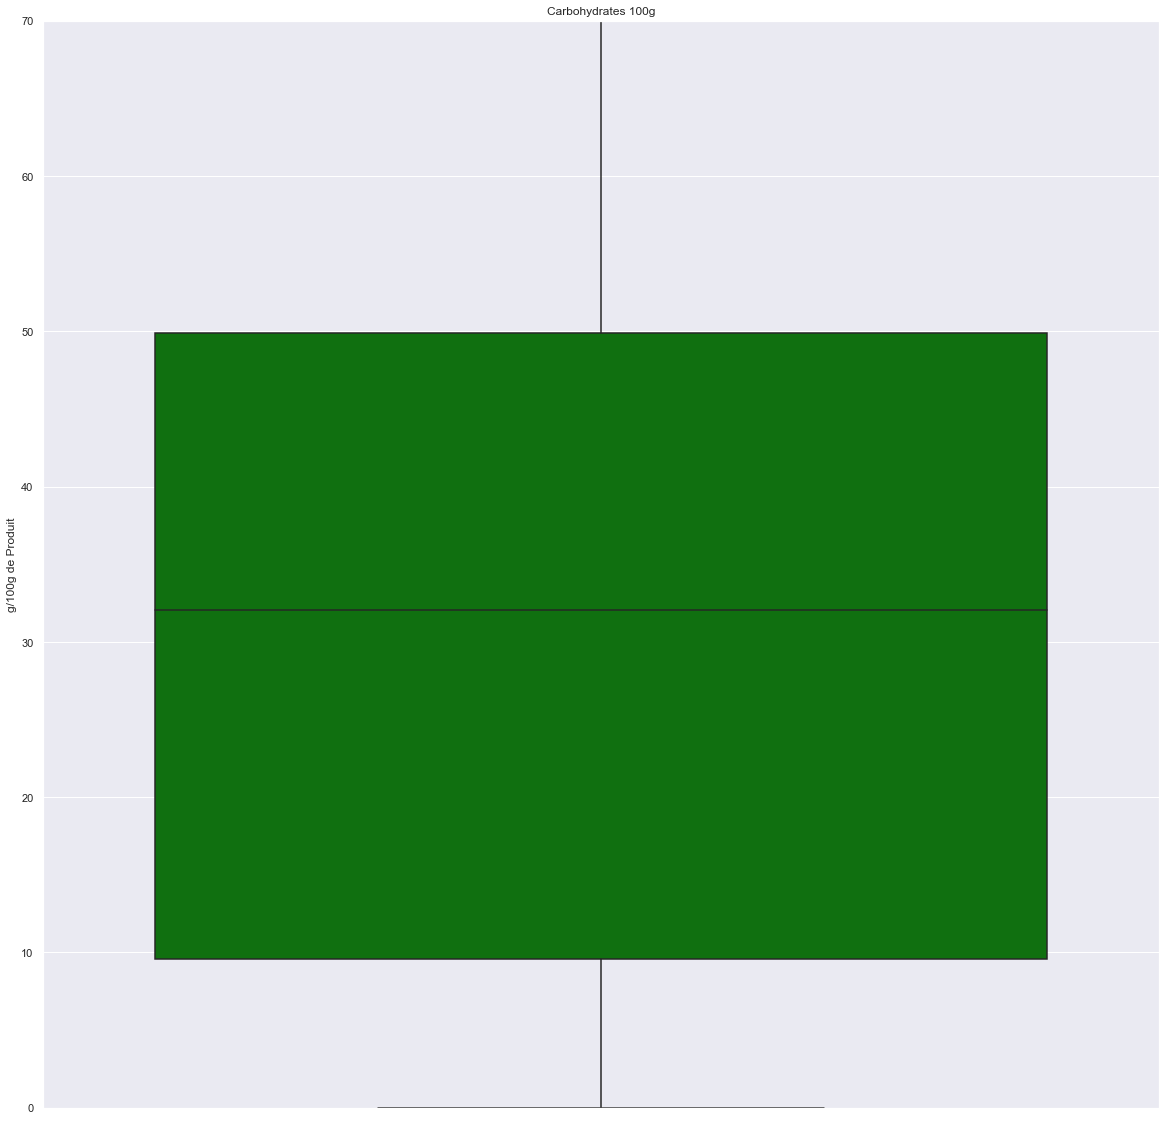

In [97]:
# Boxplot "Zoomée" Carbohydrates :

carbohydrates = dudikoff[dudikoff['Variable']=='Carbohydrates_100g']
carbohydrates.dropna()
ax = sns.boxplot(y ="Value", data = carbohydrates,color = "green")
plt.ylim(0,70)
ax.set_title('Carbohydrates 100g')
ax.set_ylabel('g/100g de Produit')
plt.show()

In [98]:
# Localisation des Valeurs "Carbohydrates" supérieures à 100g :

print(np.where(carbohydrates['Value'] > 100))

# Calcul du Z Score pour déterminer les Outliers :

cols6 = list(carbohydrates.Value)
cols6

# Données Statisitiques des Valeurs de la dataframe "Carbohydrates" :

from scipy import stats
stats.describe(cols6)

# Moyenne de la dataframe "Carbohydrates" :

mean=np.mean(cols6)
mean

# Ecart Type de la dataframe "Carbohydrates" :

std=np.std(cols6)
std

# Mise en évidence des Outliers par la Technique du Z Score :

threshold = 10
outlier = []
for i in cols6:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('Outliers in dataset are', outlier)

(array([ 71000,  73668, 111566, 119783, 133567, 155609, 155803, 202571,
       234726, 239347, 245311, 260598, 260599, 260611, 265108, 265110,
       286482, 315621, 317635]),)
Outliers in dataset are [2916.67]


In [99]:
# Test du repérage par Z Score :

carbohydrates.loc[carbohydrates.Value == 2916.67]

,Variable,Value
3684295,Carbohydrates_100g,2916.67


In [100]:
# Correction Outliers "Carbohydrates" :

carbohydrates2 = carbohydrates[carbohydrates.Value.between(0,100)]

In [101]:
# Valeur Maximale de la colonne Carbohydrates :

column = carbohydrates2["Value"]
max_value = column.max()
max_value

100.0

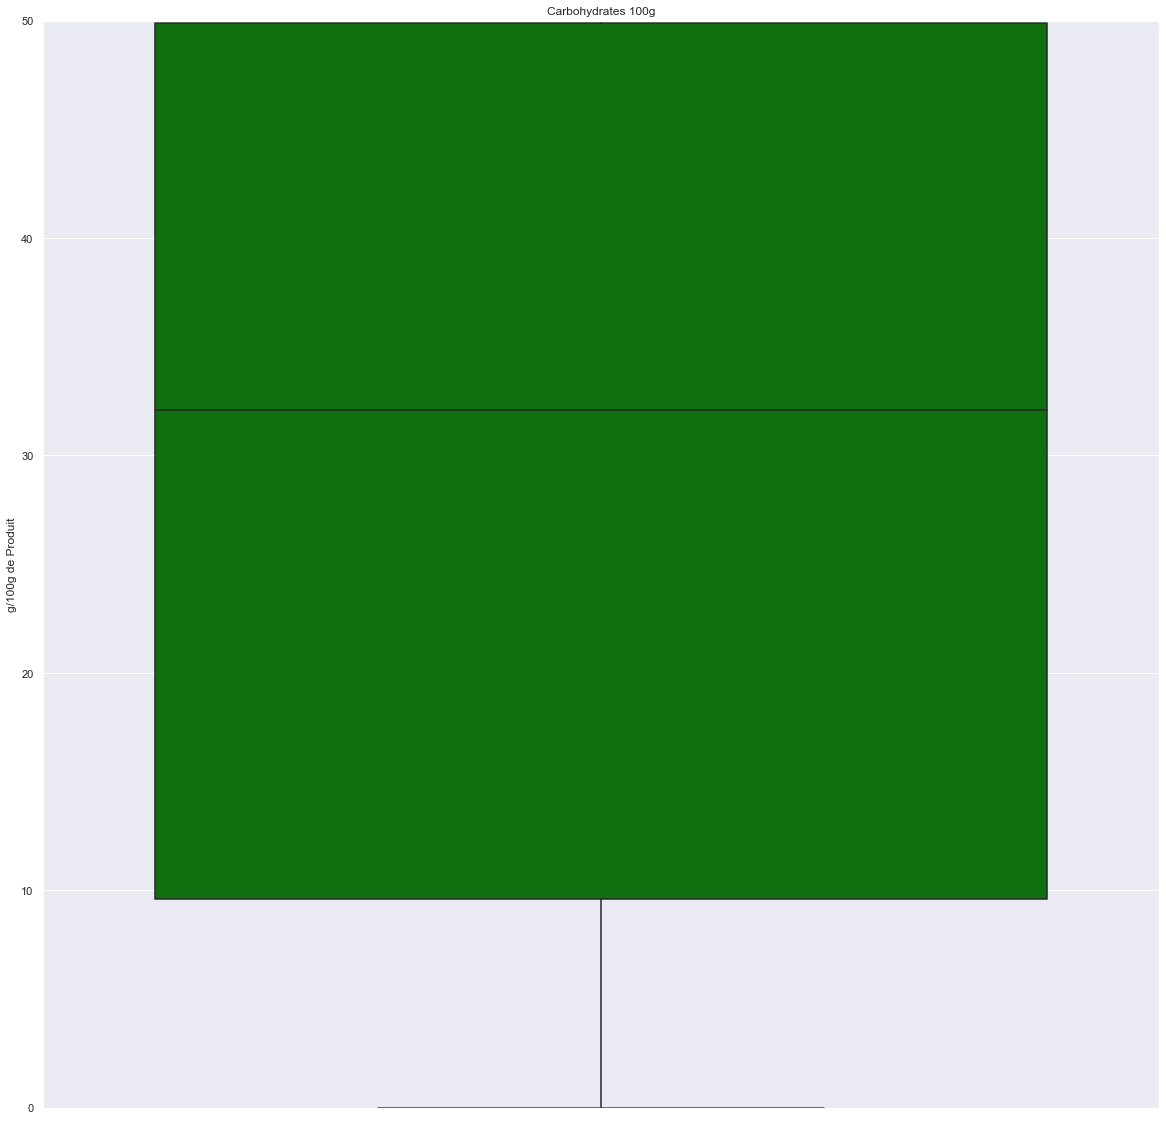

In [102]:
# Boxplot "Zoomée" "Carbohydrates" sans outlier :

carbohydrates2 = dudikoff[dudikoff['Variable']=='Carbohydrates_100g']
carbohydrates2.dropna()
ax = sns.boxplot(y ="Value", data = carbohydrates2, color = 'green')
plt.ylim(0,50)
ax.set_title('Carbohydrates 100g')
ax.set_ylabel('g/100g de Produit')
plt.show()

# - Acides Gras Saturés :

In [103]:
# Dataframe "Saturated Fat" :

saturated_ft = dudikoff[dudikoff['Variable']=='Saturated_Fat_100g']
saturated_ft

,Variable,Value
3207720,Saturated_Fat_100g,5.129932
3207721,Saturated_Fat_100g,28.57
3207722,Saturated_Fat_100g,0.0
3207723,Saturated_Fat_100g,5.36
3207724,Saturated_Fat_100g,5.129932
...,...,...
3528487,Saturated_Fat_100g,5.129932
3528488,Saturated_Fat_100g,0.0
3528489,Saturated_Fat_100g,5.129932
3528490,Saturated_Fat_100g,5.129932


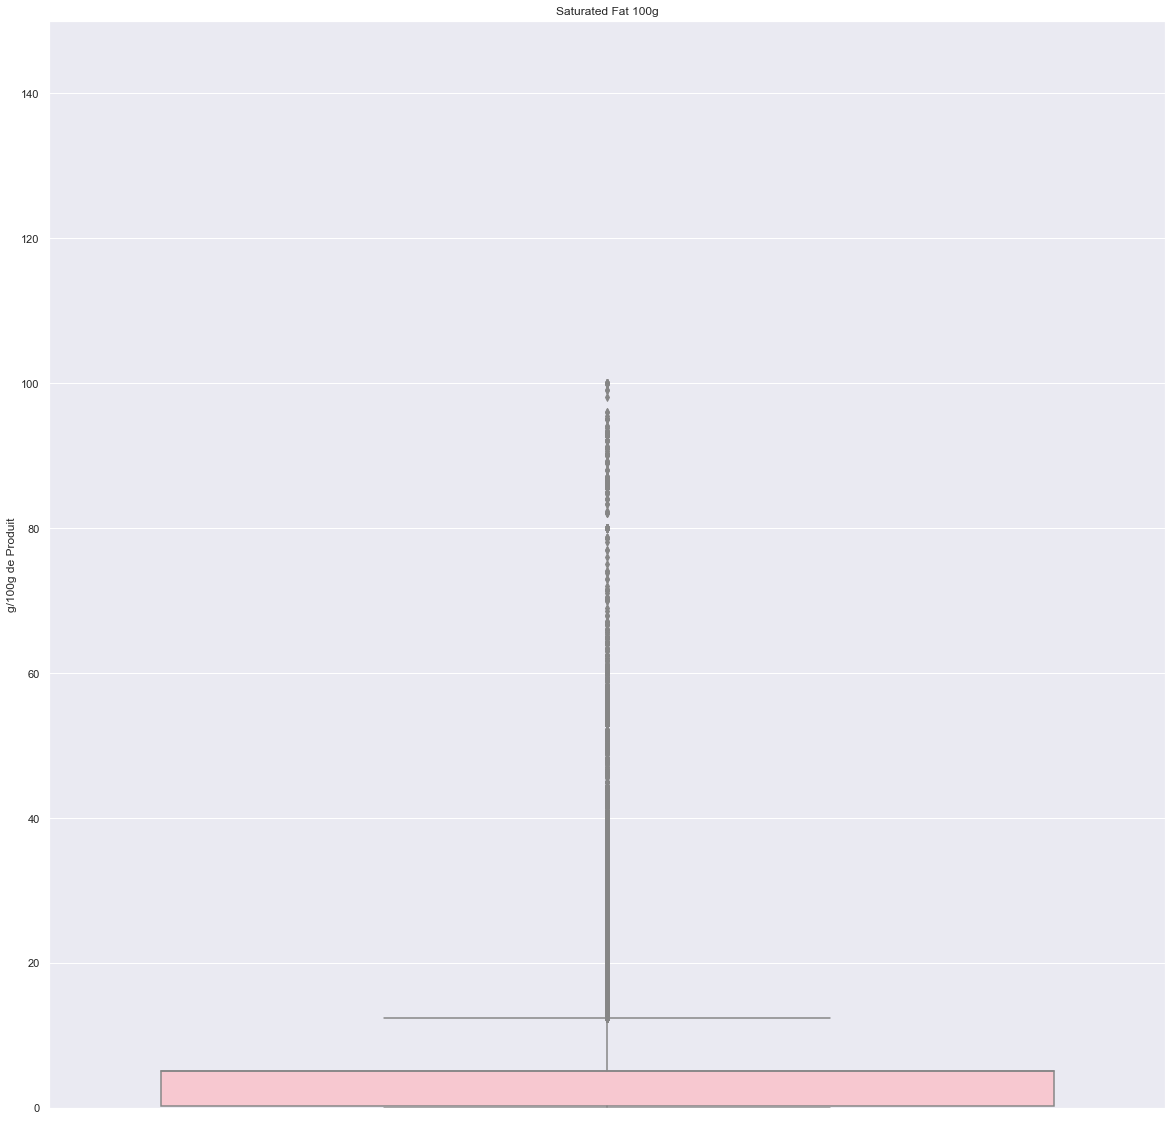

In [104]:
# Boxplot "Saturated Fat" :

saturated_ft = dudikoff[dudikoff['Variable']=='Saturated_Fat_100g']
saturated_ft.dropna()
ax = sns.boxplot(y ="Value", data = saturated_ft, color = "pink")
plt.ylim(0,150)
ax.set_title('Saturated Fat 100g')
ax.set_ylabel('g/100g de Produit')
plt.show()

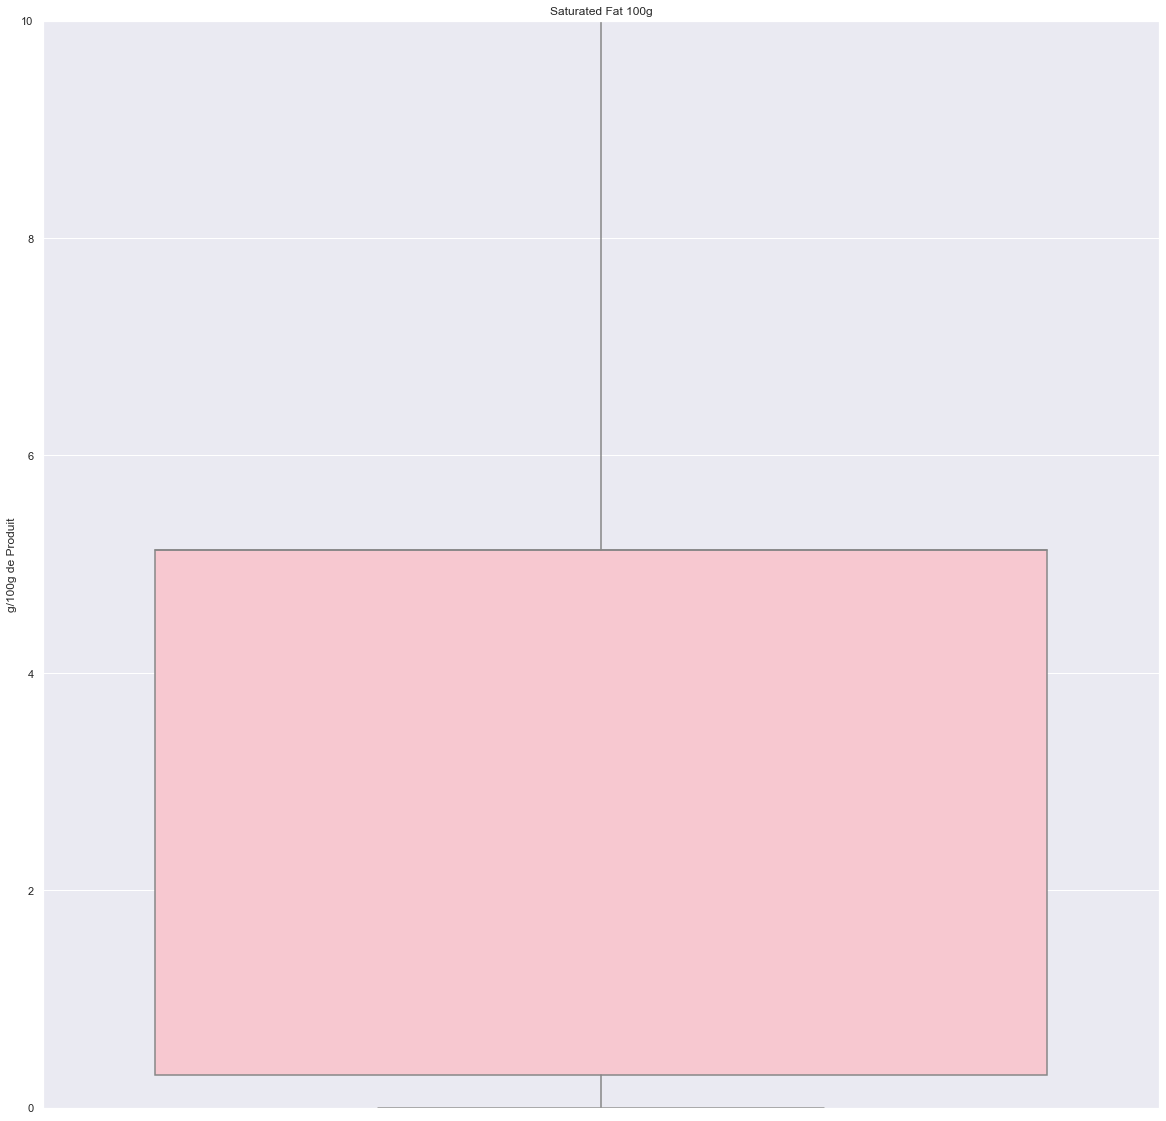

In [105]:
# Boxplot "Zoomée" Saturated Fat :

saturated_ft = dudikoff[dudikoff['Variable']=='Saturated_Fat_100g']
saturated_ft.dropna()
ax = sns.boxplot(y ="Value", data = saturated_ft, color = "pink")
plt.ylim(0,10)
ax.set_title('Saturated Fat 100g')
ax.set_ylabel('g/100g de Produit')
plt.show()

In [106]:
# Localisation des Valeurs "Saturated Fat" supérieures à 100g :

print(np.where(saturated_ft['Value'] > 100))

# Calcul du Z Score pour déterminer les Outliers :

cols7 = list(saturated_ft.Value)
cols7

# Données Statisitiques des Valeurs de la dataframe "Saturated Fat" :

from scipy import stats
stats.describe(cols7)

# Moyenne de la dataframe "Saturated Fat" :

mean=np.mean(cols7)
mean

# Ecart Type de la dataframe "Saturated Fat" :

std=np.std(cols7)
std

# Mise en évidence des Outliers par la Technique du Z Score :

threshold = 15
outlier = []
for i in cols7:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('Outlier in dataset are', outlier)

(array([119389, 245311, 313506]),)
Outlier in dataset are [175.38, 210.0, 550.0]


In [107]:
# Test du repérage par Z Score :

saturated_ft.loc[saturated_ft.Value == 550.0]

,Variable,Value
3521226,Saturated_Fat_100g,550.0


In [108]:
# Correction Outliers "Saturated Fat" :

saturated_ft2 = saturated_ft[saturated_ft.Value.between(0,100)]

In [109]:
# Valeur Maximale de la colonne "Saturated Fat" :

column = saturated_ft2["Value"]
max_value = column.max()
max_value

100.0

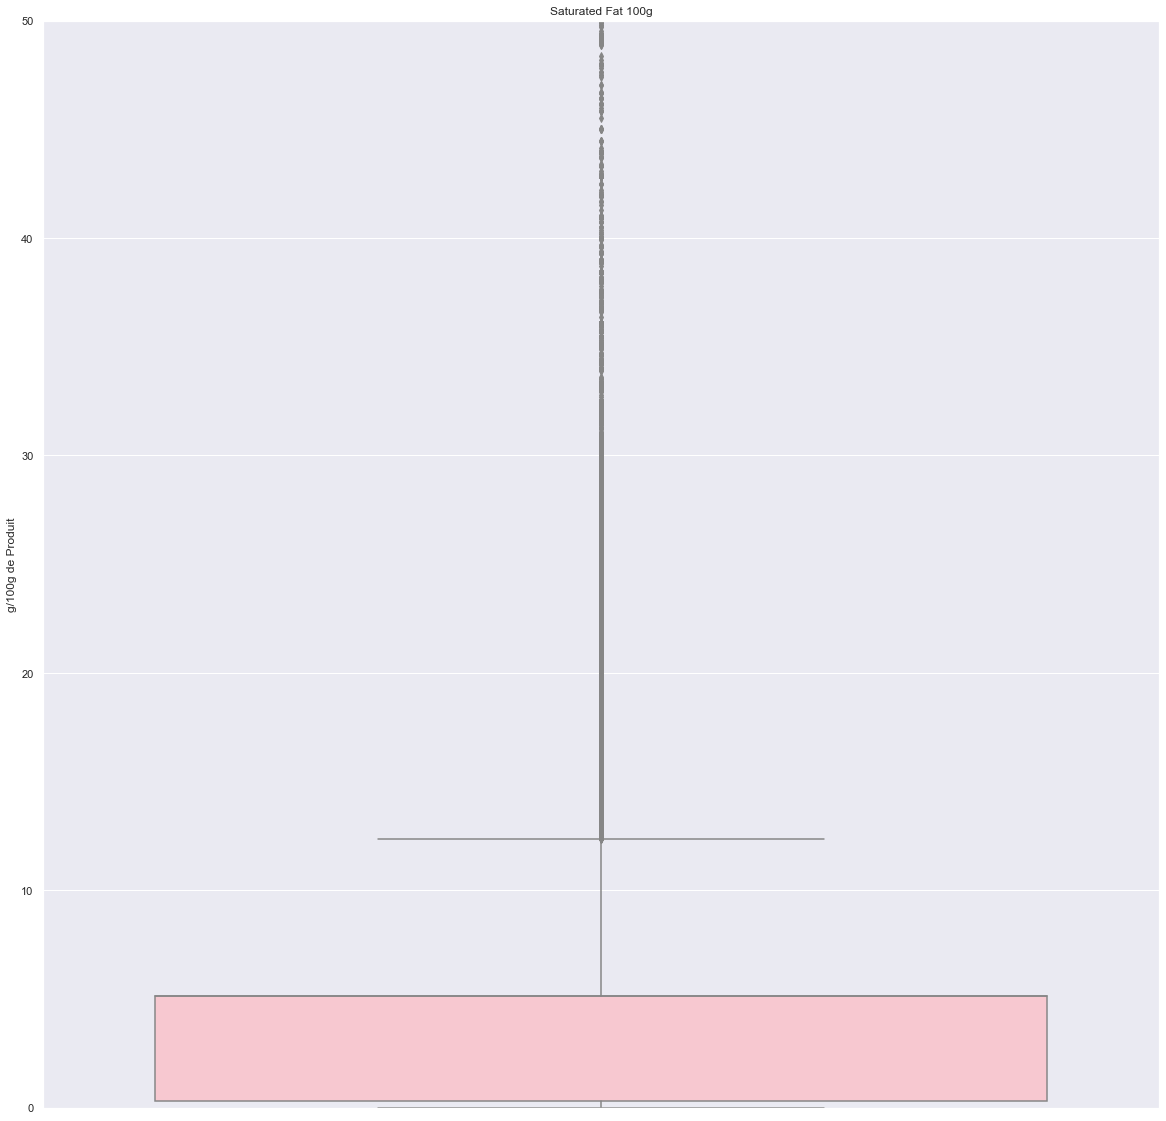

In [110]:
# Boxplot "Zoomée" "Saturated Fat" sans outlier :

saturated_ft2 = dudikoff[dudikoff['Variable']=='Saturated_Fat_100g']
saturated_ft2.dropna()
ax = sns.boxplot(y ="Value", data = saturated_ft2, color = 'pink')
plt.ylim(0,50)
ax.set_title('Saturated Fat 100g')
ax.set_ylabel('g/100g de Produit')
plt.show()

# - Acides Gras :

In [111]:
# Dataframe "Fat" :

fat = dudikoff[dudikoff['Variable']=='Fat_100g']
fat.dropna()

,Variable,Value
2886948,Fat_100g,12.730379
2886949,Fat_100g,28.57
2886950,Fat_100g,17.86
2886951,Fat_100g,57.14
2886952,Fat_100g,1.43
...,...,...
3207715,Fat_100g,12.730379
3207716,Fat_100g,0.0
3207717,Fat_100g,12.730379
3207718,Fat_100g,12.730379


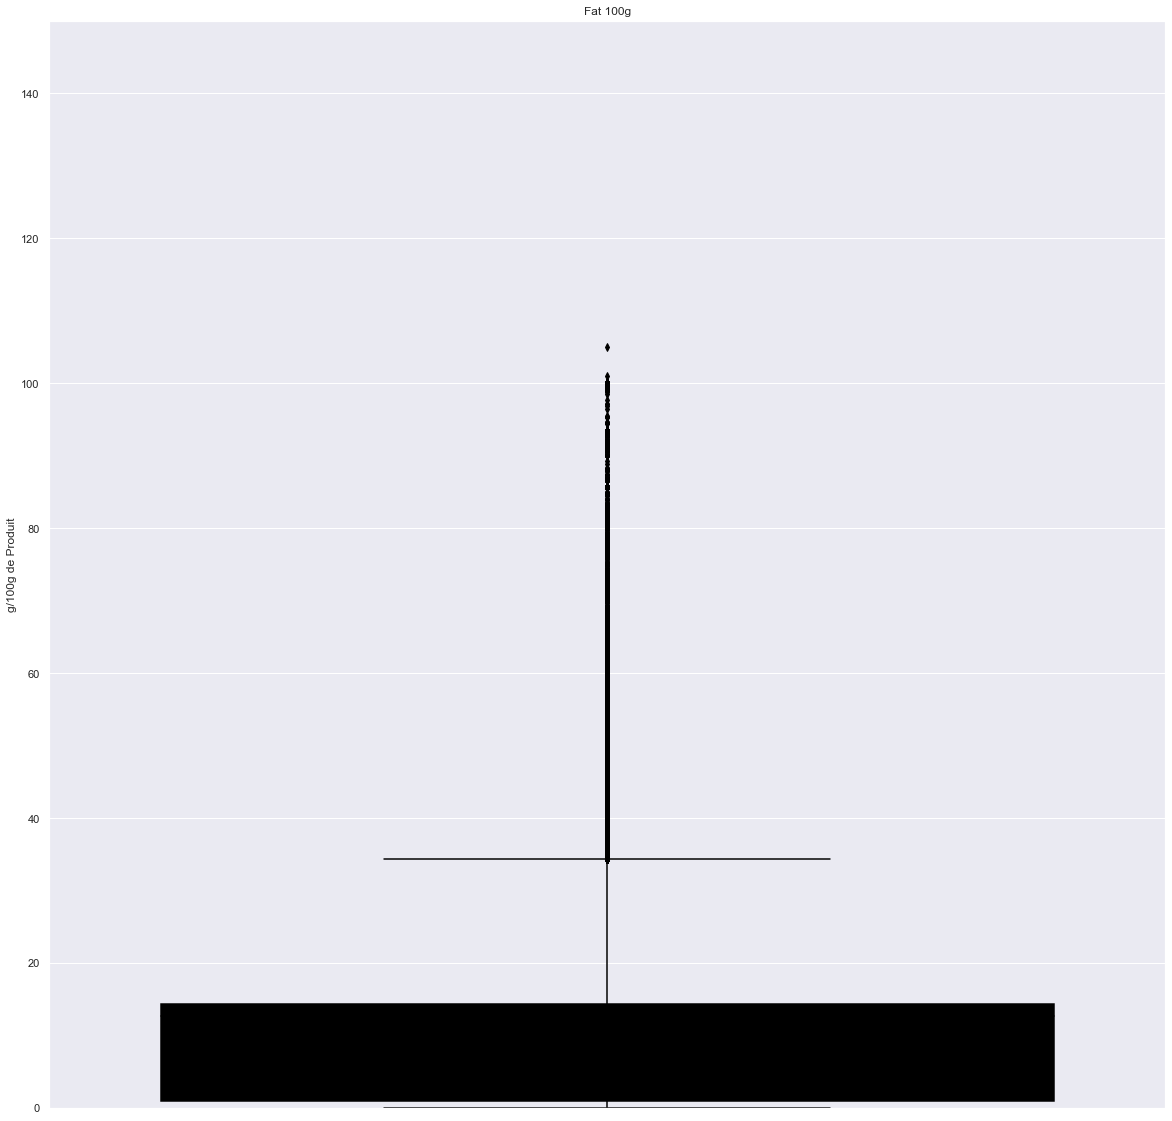

In [112]:
# Boxplot "Fat" :

fat = dudikoff[dudikoff['Variable']=='Fat_100g']
fat.dropna()
ax = sns.boxplot(y ="Value", data = fat, color = "black")
plt.ylim(0,150)
ax.set_title('Fat 100g')
ax.set_ylabel('g/100g de Produit')
plt.show()

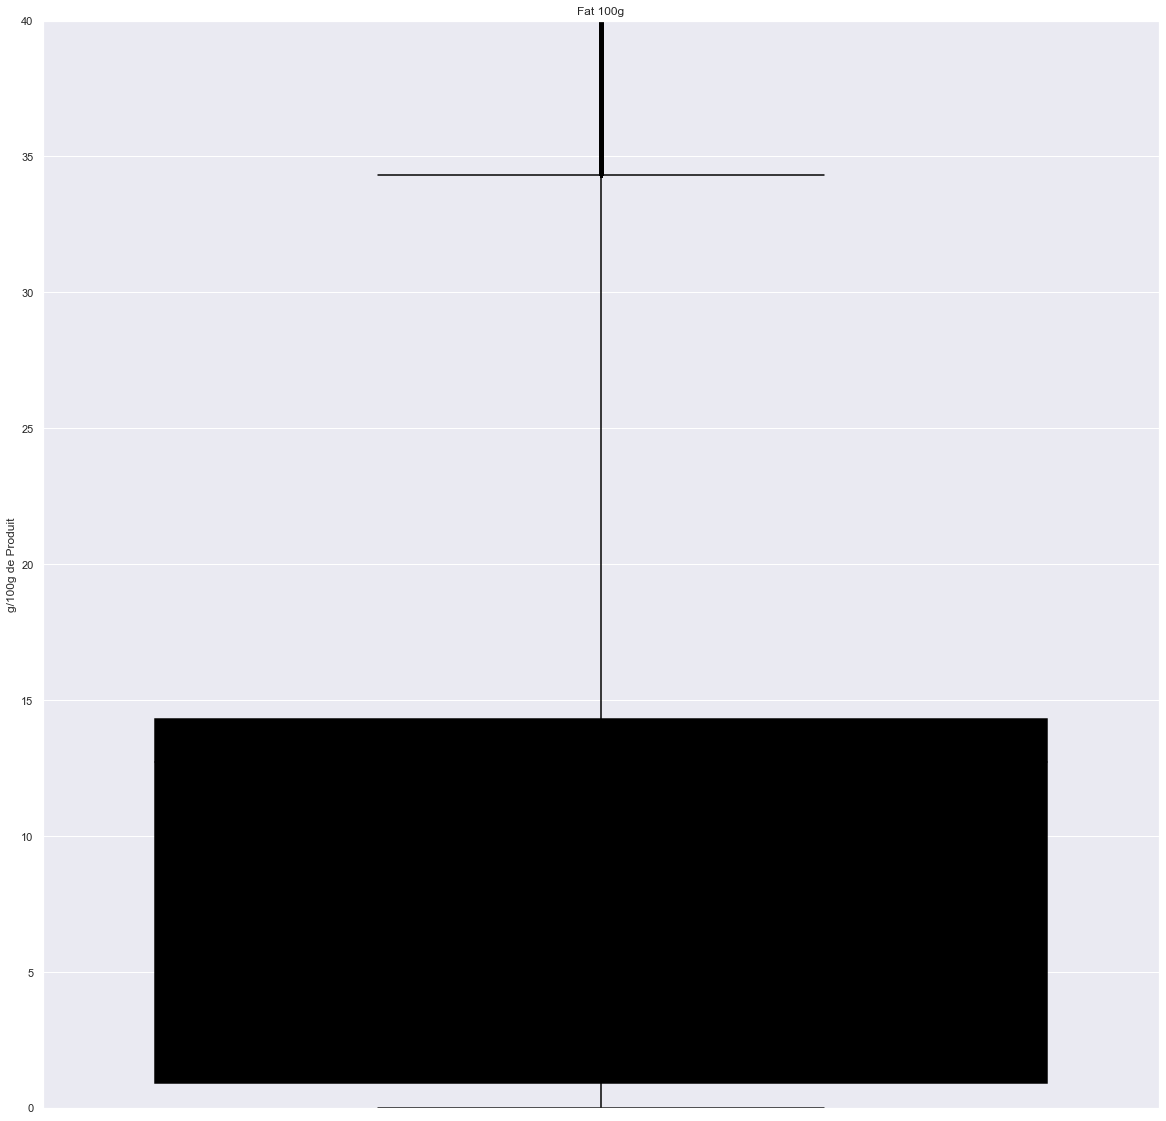

In [113]:
# Boxplot "Zoomée" "Fat" :

fat = dudikoff[dudikoff['Variable']=='Fat_100g']
fat.dropna()
ax = sns.boxplot(y ="Value", data = fat, color = "black")
plt.ylim(0,40)
ax.set_title('Fat 100g')
ax.set_ylabel('g/100g de Produit')
plt.show()

In [114]:
# Localisation des Valeurs "Fat" supérieures à 100g :

print(np.where(fat['Value'] > 100))

# Calcul du Z Score pour déterminer les Outliers :

cols8 = list(fat.Value)
cols8

# Données Statisitiques des Valeurs de la dataframe "Fat" :

from scipy import stats
stats.describe(cols8)

# Moyenne de la dataframe "Fat" :

mean=np.mean(cols8)
mean

# Ecart Type de la dataframe "Fat" :

std=np.std(cols8)
std

# Mise en évidence des Outliers par la Technique du Z Score :

threshold = 15
outlier = []
for i in cols8:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('Outlier in dataset are', outlier)

(array([112681, 245311, 303101, 305054]),)
Outlier in dataset are [714.29, 380.0]


In [115]:
# Test du repérage par Z Score :

fat.loc[fat.Value == 380.0]

,Variable,Value
3132259,Fat_100g,380.0


In [116]:
# Correction Outliers "Fat" :

fat2 = fat[fat.Value.between(0,100)]

In [117]:
# Valeur Maximale de la colonne "Fat" :

column = fat2["Value"]
max_value = column.max()
max_value

100.0

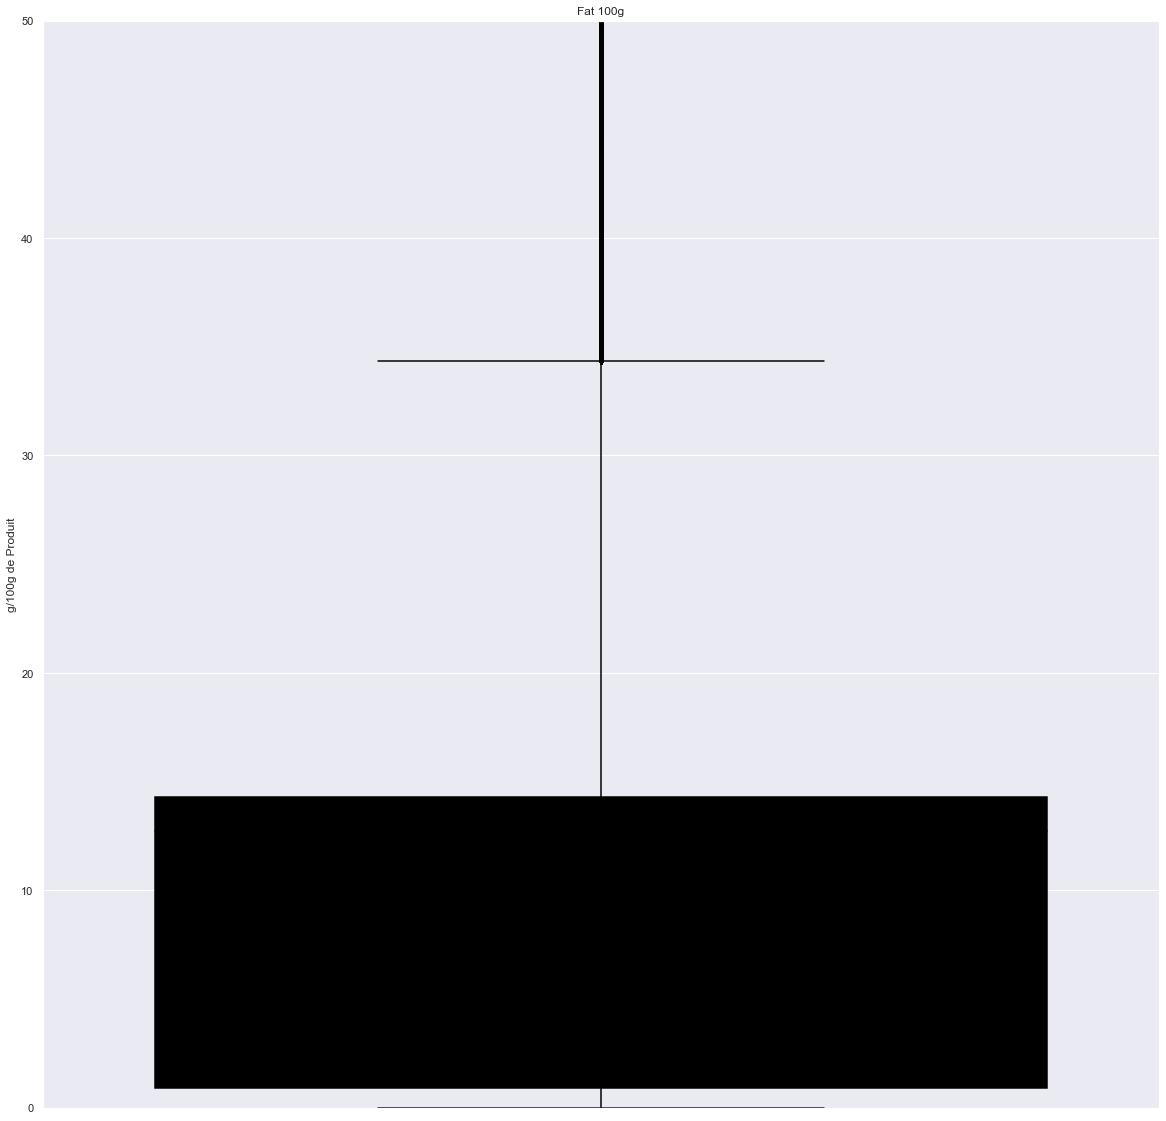

In [118]:
# Boxplot "Zoomée" "Fat" sans outlier :

fat2 = dudikoff[dudikoff['Variable']=='Fat_100g']
fat2.dropna()
ax = sns.boxplot(y ="Value", data = fat2, color = 'black')
plt.ylim(0,50)
ax.set_title('Fat 100g')
ax.set_ylabel('g/100g de Produit')
plt.show()

# - Additifs :

In [119]:
# Dataframe "Additives" :

add = dudikoff[dudikoff['Variable']=='Additives']
add.dropna()

,Variable,Value
1603860,Additives,1.936024
1603861,Additives,0.0
1603862,Additives,0.0
1603863,Additives,0.0
1603864,Additives,0.0
...,...,...
1924627,Additives,1.936024
1924628,Additives,0.0
1924629,Additives,1.936024
1924630,Additives,1.936024


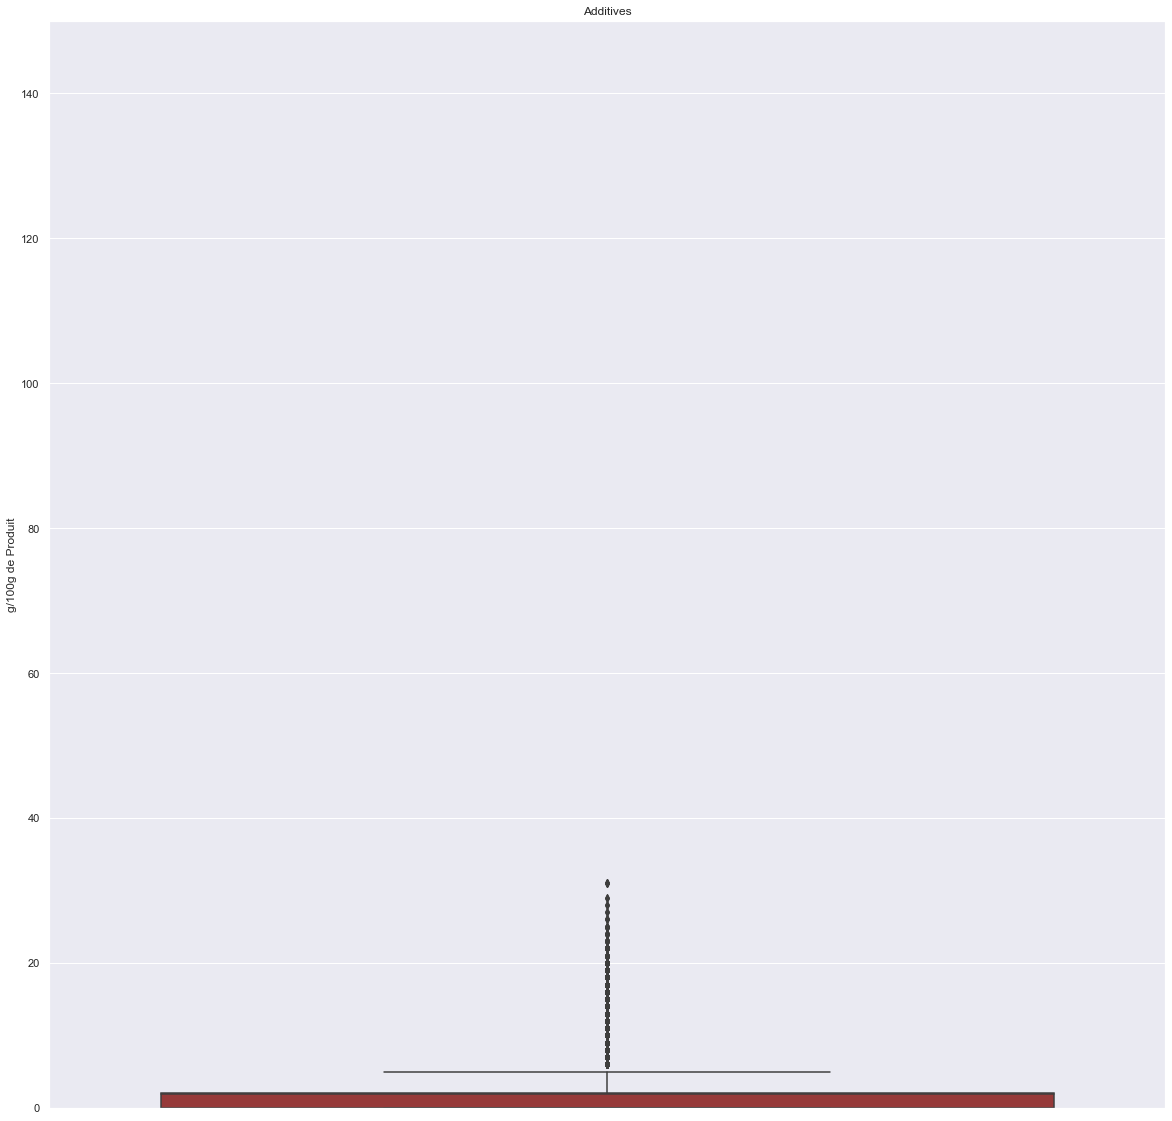

In [120]:
# Boxplot "Additives" :

add = dudikoff[dudikoff['Variable']=='Additives']
add.dropna()
ax = sns.boxplot(y ="Value", data = add, color = "brown")
plt.ylim(0,150)
ax.set_title('Additives')
ax.set_ylabel('g/100g de Produit')
plt.show()

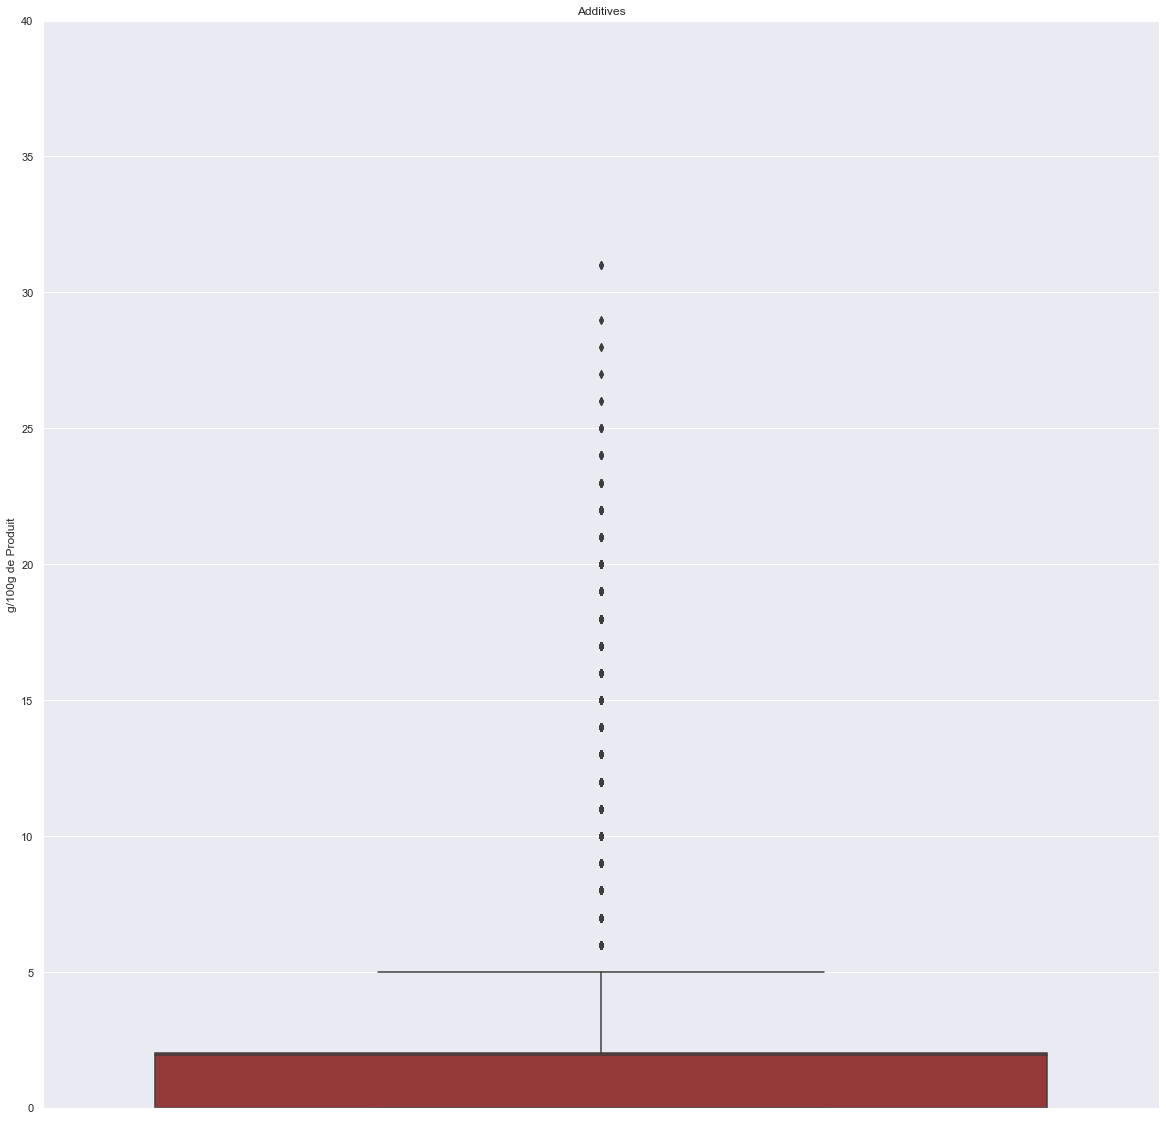

In [121]:
# Boxplot "Zoomée" "Additives" :

add = dudikoff[dudikoff['Variable']=='Additives']
fat.dropna()
ax = sns.boxplot(y ="Value", data = add, color = "brown")
plt.ylim(0,40)
ax.set_title('Additives')
ax.set_ylabel('g/100g de Produit')
plt.show()

In [122]:
# Correction Outliers "Additives" :

add2 = add[add.Value.between(0,50)]

In [123]:
# Valeur Maximale de la colonne "Additives" :

column = add2["Value"]
max_value = column.max()
max_value

31.0

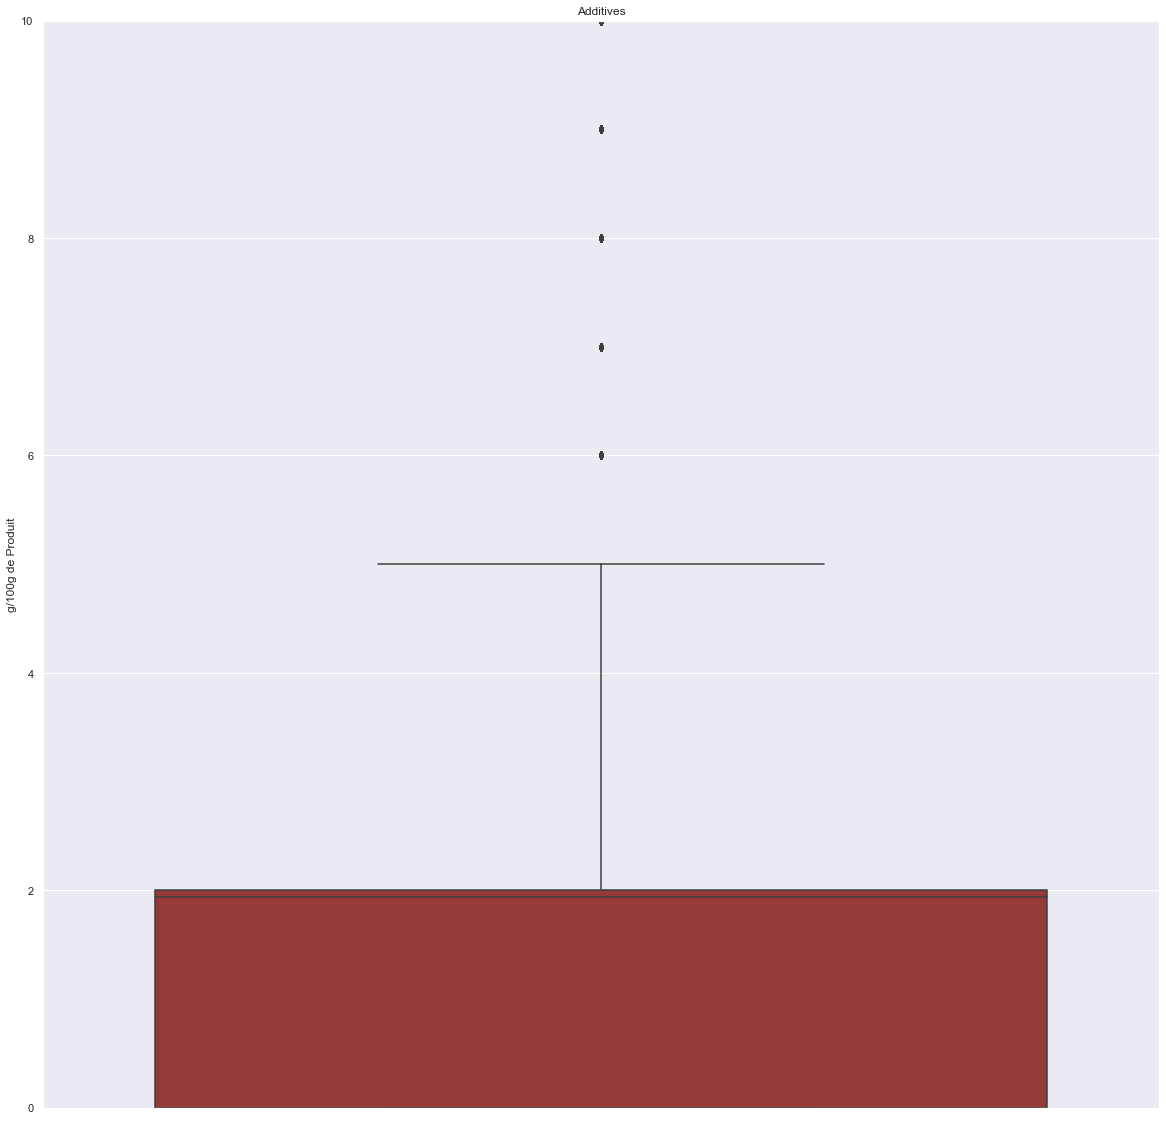

In [124]:
# Boxplot "Zoomée" "Additives" sans outlier :

add2 = dudikoff[dudikoff['Variable']=='Additives']
add2.dropna()
ax = sns.boxplot(y ="Value", data = add2, color = 'brown')
plt.ylim(0,10)
ax.set_title('Additives')
ax.set_ylabel('g/100g de Produit')
plt.show()

# - Energie :

In [125]:
# Dataframe "Energy" :

energy = dudikoff[dudikoff['Variable']=='Energy_100g']
energy.dropna()

,Variable,Value
2566176,Energy_100g,1141.914605
2566177,Energy_100g,2243.0
2566178,Energy_100g,1941.0
2566179,Energy_100g,2540.0
2566180,Energy_100g,1552.0
...,...,...
2886943,Energy_100g,1141.914605
2886944,Energy_100g,0.0
2886945,Energy_100g,1141.914605
2886946,Energy_100g,1141.914605


In [126]:
# Correction Outliers "Energy" :

energy2 = energy[energy.Value.between(0,7000)]

In [127]:
# Valeur Maximale de la colonne "Energy" :

column = energy2["Value"]
max_value = column.max()
max_value

6975.0

In [128]:
# Création d'une nouvelle dataframe Energie en kJ et en kcal :

energy["Value kcal"] = pd.NaT
new_energy = energy.rename(columns={'Value': 'Value kJ'})
new_energy

<ipython-input-128-b040982699b7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy["Value kcal"] = pd.NaT


,Variable,Value kJ,Value kcal
2566176,Energy_100g,1141.914605,NaT
2566177,Energy_100g,2243.0,NaT
2566178,Energy_100g,1941.0,NaT
2566179,Energy_100g,2540.0,NaT
2566180,Energy_100g,1552.0,NaT
...,...,...,...
2886943,Energy_100g,1141.914605,NaT
2886944,Energy_100g,0.0,NaT
2886945,Energy_100g,1141.914605,NaT
2886946,Energy_100g,1141.914605,NaT


In [129]:
# Conversion kJ / kcal :

new_energy["Value kcal"] = new_energy["Value kJ"] * 0.2388

In [130]:
# Dataframe Energie :

new_energy

,Variable,Value kJ,Value kcal
2566176,Energy_100g,1141.914605,272.689208
2566177,Energy_100g,2243.0,535.6284
2566178,Energy_100g,1941.0,463.5108
2566179,Energy_100g,2540.0,606.552
2566180,Energy_100g,1552.0,370.6176
...,...,...,...
2886943,Energy_100g,1141.914605,272.689208
2886944,Energy_100g,0.0,0.0
2886945,Energy_100g,1141.914605,272.689208
2886946,Energy_100g,1141.914605,272.689208


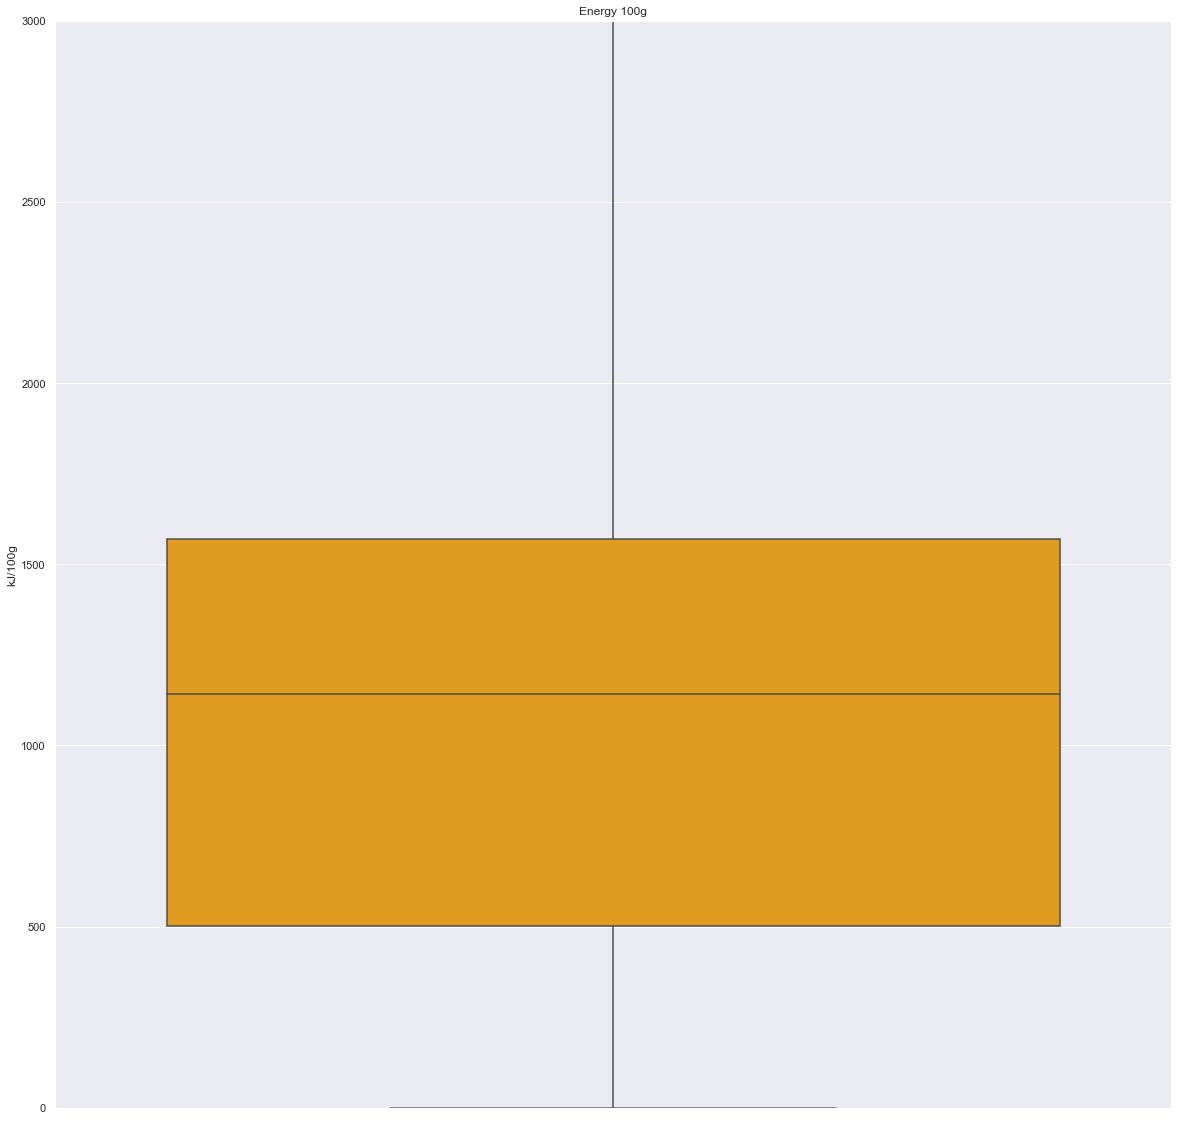

In [131]:
# Boxplot "Energy" en kJ :

ax = sns.boxplot(y ="Value kJ", data = new_energy, color = "orange")
plt.ylim(0,3000)
ax.set_title('Energy 100g')
ax.set_ylabel('kJ/100g')
plt.show()

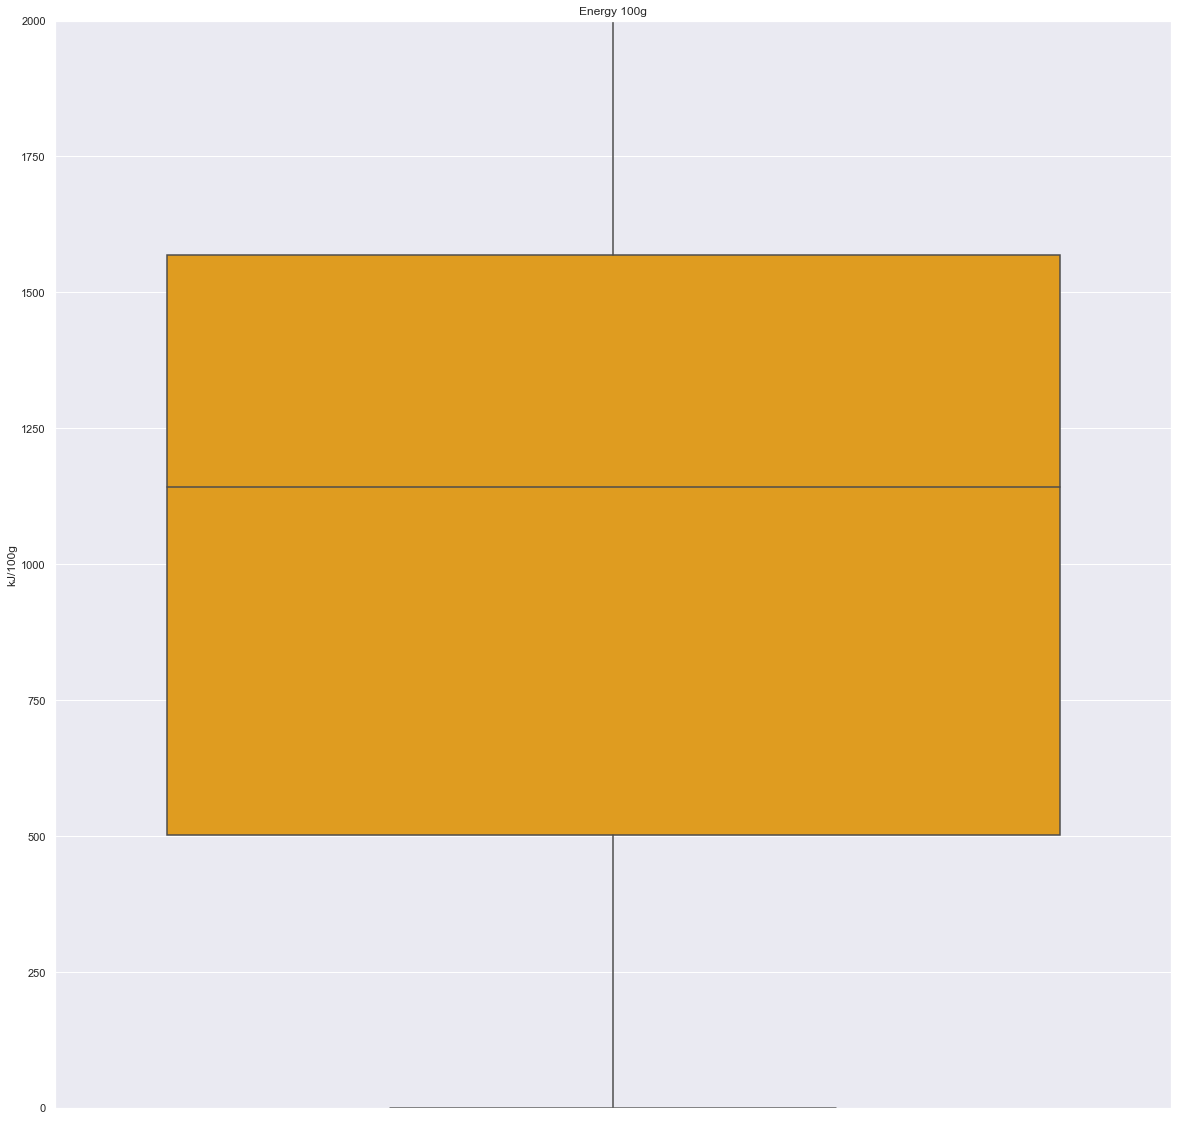

In [132]:
# Boxplot "Zoomée" "Energy" en kJ :

ax = sns.boxplot(y ="Value kJ", data = new_energy, color = "orange")
plt.ylim(0,2000)
ax.set_title('Energy 100g')
ax.set_ylabel('kJ/100g')
plt.show()

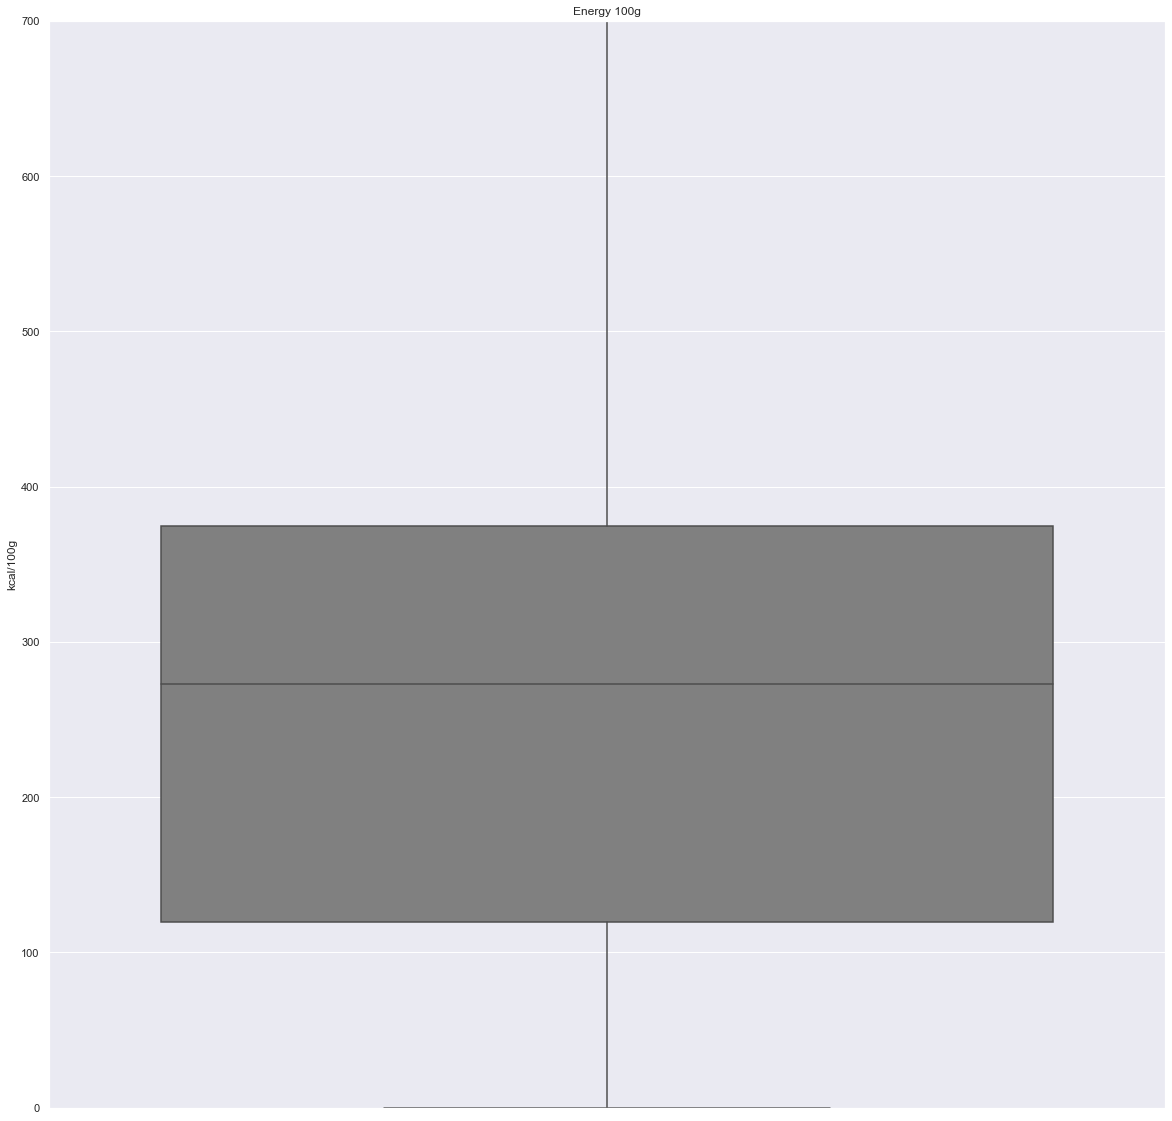

In [133]:
# Boxplot "Energy" en kcal :

ax = sns.boxplot(y ="Value kcal", data = new_energy, color = "grey")
plt.ylim(0,700)
ax.set_title('Energy 100g')
ax.set_ylabel('kcal/100g')
plt.show()

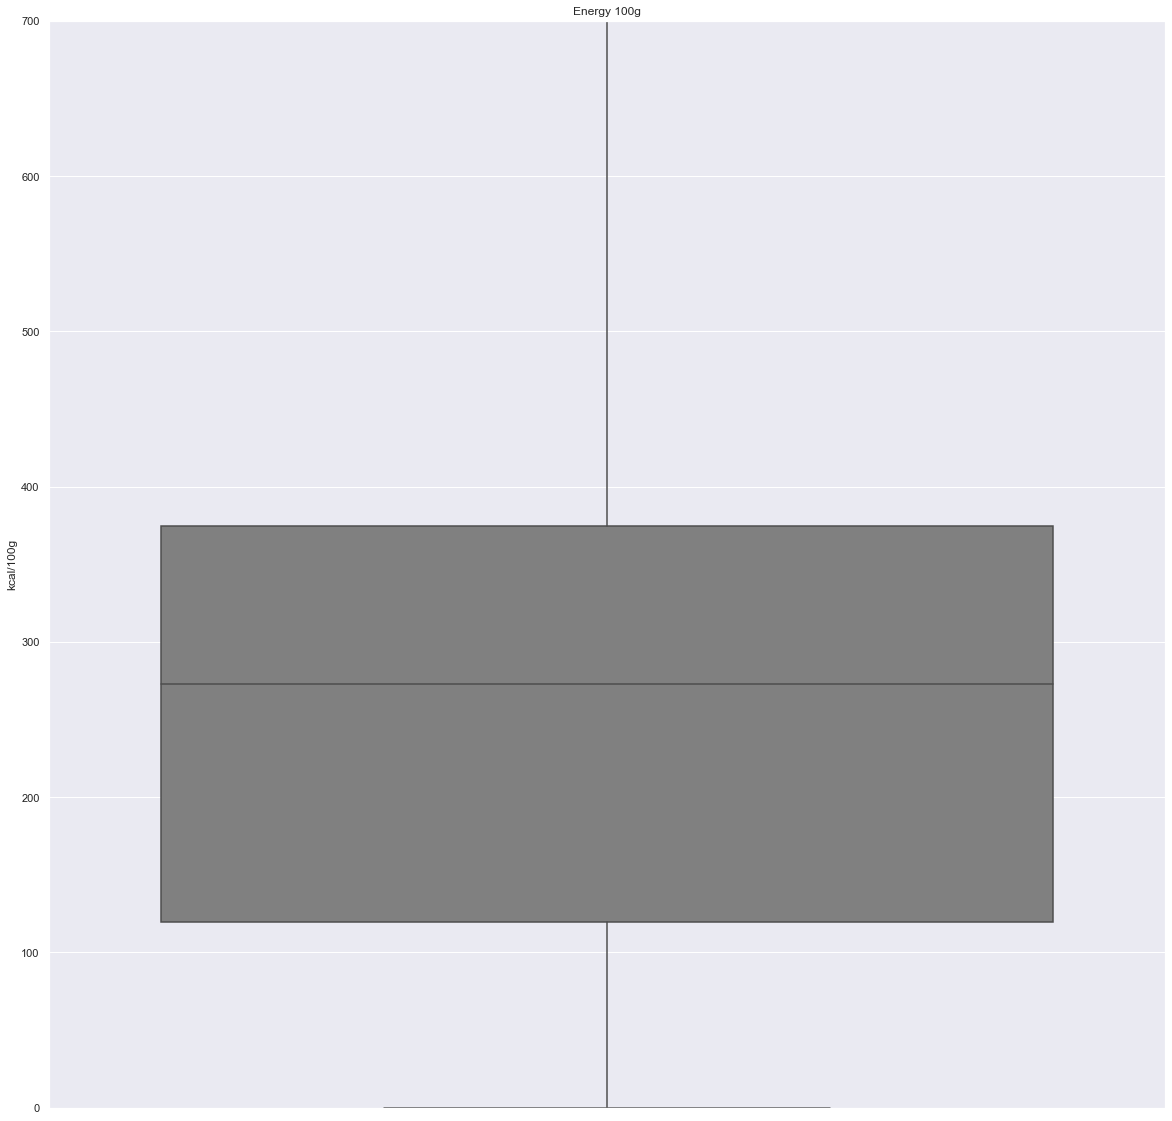

In [134]:
# Boxplot "Zoomée" "Energy" en kcal :

ax = sns.boxplot(y ="Value kcal", data = new_energy, color = "grey")
plt.ylim(0,700)
ax.set_title('Energy 100g')
ax.set_ylabel('kcal/100g')
plt.show()

# - Palm Oil :

In [135]:
# Dataframe "Palm Oil" :

palm = dudikoff[dudikoff['Variable']=='Palm_Oil']
palm.dropna()

,Variable,Value
1924632,Palm_Oil,0.019659
1924633,Palm_Oil,0.0
1924634,Palm_Oil,0.0
1924635,Palm_Oil,0.0
1924636,Palm_Oil,0.0
...,...,...
2245399,Palm_Oil,0.019659
2245400,Palm_Oil,0.0
2245401,Palm_Oil,0.019659
2245402,Palm_Oil,0.019659


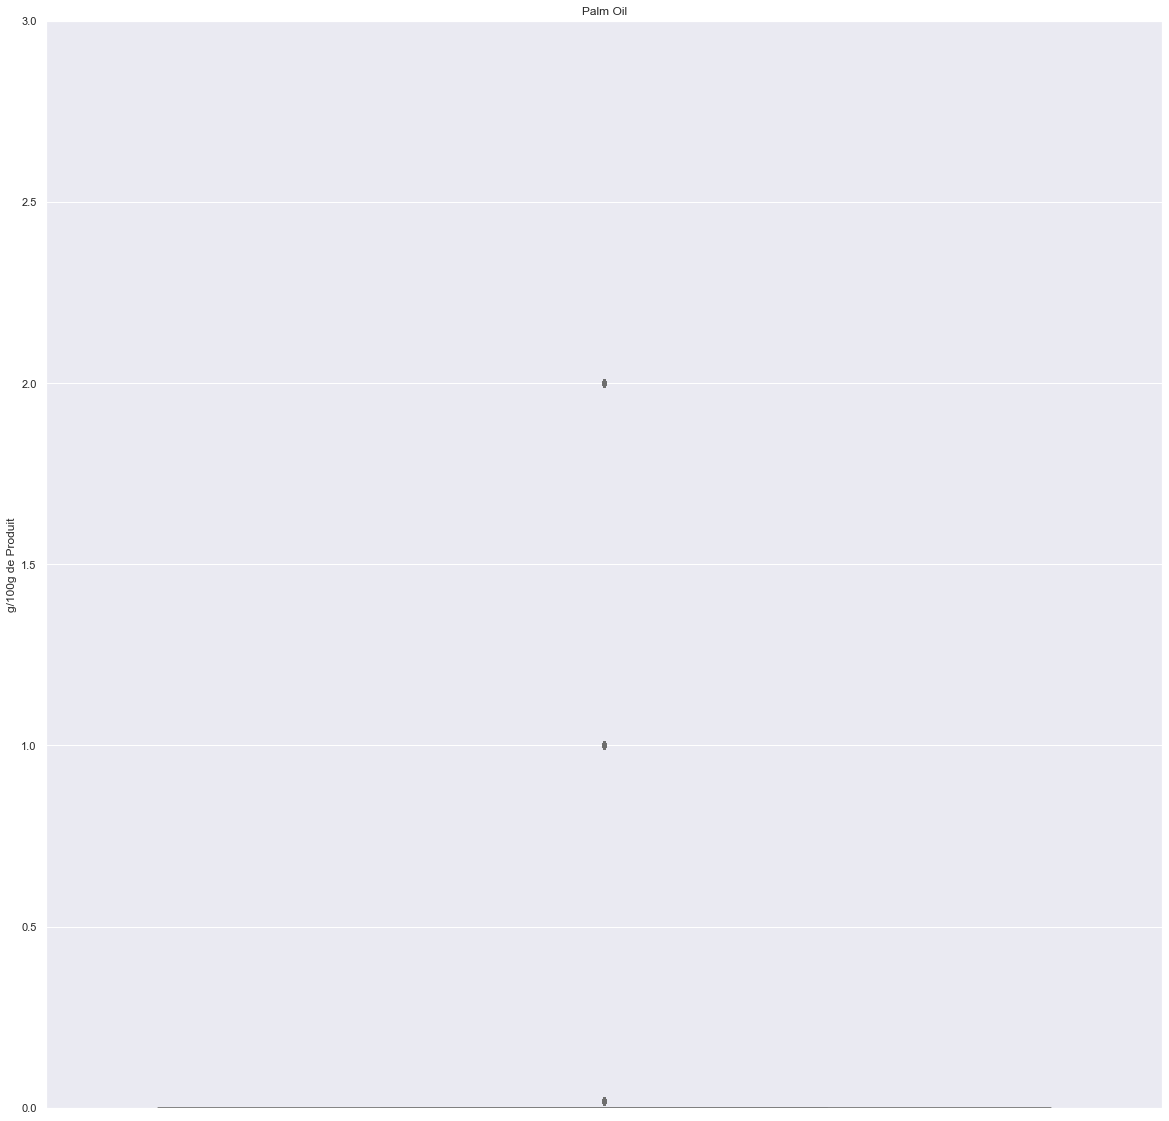

In [136]:
# Boxplot "Palm Oil" :

palm = dudikoff[dudikoff['Variable']=='Palm_Oil']
palm.dropna()
ax = sns.boxplot(y ="Value", data = palm, color = "violet")
plt.ylim(0,3)
ax.set_title('Palm Oil')
ax.set_ylabel('g/100g de Produit')
plt.show()

# - Maybe Palm Oil :

In [137]:
# Dataframe "Maybe Palm Oil" :

maypalm = dudikoff[dudikoff['Variable']=='Maybe_Palm_Oil']
maypalm.dropna()

,Variable,Value
2245404,Maybe_Palm_Oil,0.055246
2245405,Maybe_Palm_Oil,0.0
2245406,Maybe_Palm_Oil,0.0
2245407,Maybe_Palm_Oil,0.0
2245408,Maybe_Palm_Oil,0.0
...,...,...
2566171,Maybe_Palm_Oil,0.055246
2566172,Maybe_Palm_Oil,0.0
2566173,Maybe_Palm_Oil,0.055246
2566174,Maybe_Palm_Oil,0.055246


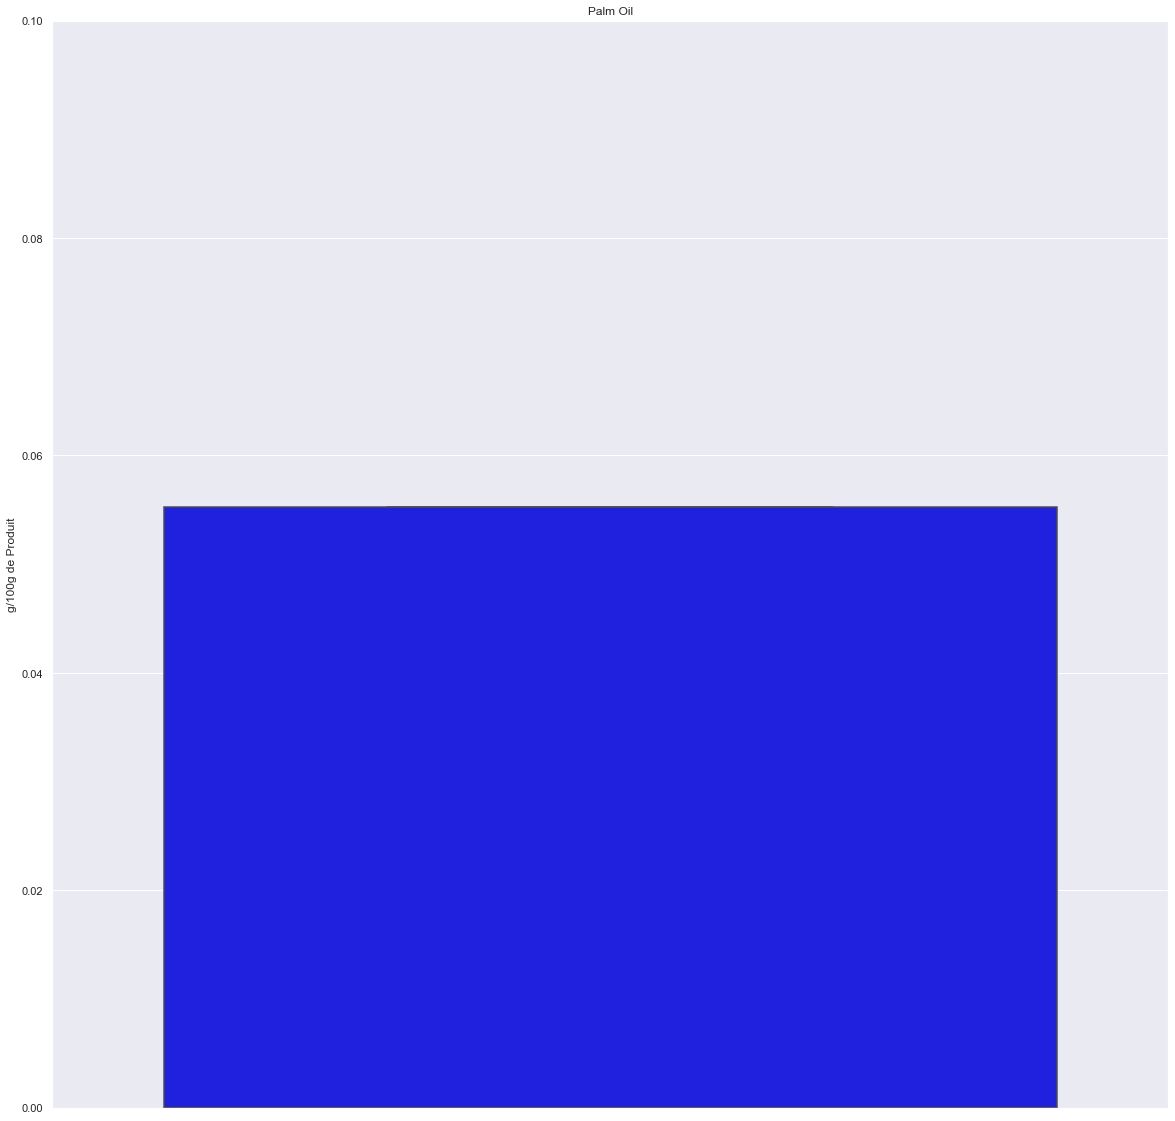

In [138]:
# Boxplot "Maybe Palm Oil" :

maypalm = dudikoff[dudikoff['Variable']=='Maybe_Palm_Oil']
maypalm.dropna()
ax = sns.boxplot(y ="Value", data = maypalm, color = "blue")
plt.ylim(0,0.10)
ax.set_title('Palm Oil')
ax.set_ylabel('g/100g de Produit')
plt.show()

# - Nutrition Score France 100g :

In [139]:
# Dataframe "Nutrition_Score_Fr_100g" :

nutfr = dudikoff[dudikoff['Variable']=='Nutrition_Score_Fr_100g']
nutfr.dropna()

,Variable,Value
5453124,Nutrition_Score_Fr_100g,9.165535
5453125,Nutrition_Score_Fr_100g,14.0
5453126,Nutrition_Score_Fr_100g,0.0
5453127,Nutrition_Score_Fr_100g,12.0
5453128,Nutrition_Score_Fr_100g,9.165535
...,...,...
5773891,Nutrition_Score_Fr_100g,9.165535
5773892,Nutrition_Score_Fr_100g,0.0
5773893,Nutrition_Score_Fr_100g,9.165535
5773894,Nutrition_Score_Fr_100g,9.165535


In [140]:
# Correction Outliers "Nutrition_Score_Fr_100g" :

nutfr2 = nutfr[nutfr.Value.between(-15,40)]
nutfr2

,Variable,Value
5453124,Nutrition_Score_Fr_100g,9.165535
5453125,Nutrition_Score_Fr_100g,14.0
5453126,Nutrition_Score_Fr_100g,0.0
5453127,Nutrition_Score_Fr_100g,12.0
5453128,Nutrition_Score_Fr_100g,9.165535
...,...,...
5773891,Nutrition_Score_Fr_100g,9.165535
5773892,Nutrition_Score_Fr_100g,0.0
5773893,Nutrition_Score_Fr_100g,9.165535
5773894,Nutrition_Score_Fr_100g,9.165535


In [141]:
# Test de la Valeur Minimale Nutrition Score France :

min = nutfr2['Value'].min()
min

-15.0

# - Nutrition Score Angleterre 100 g :

In [142]:
# Dataframe "Nutrition_Score_Uk_100g" :

nutuk = dudikoff[dudikoff['Variable']=='Nutrition_Score_Uk_100g']
nutuk.dropna()

,Variable,Value
5773896,Nutrition_Score_Uk_100g,9.058049
5773897,Nutrition_Score_Uk_100g,14.0
5773898,Nutrition_Score_Uk_100g,0.0
5773899,Nutrition_Score_Uk_100g,12.0
5773900,Nutrition_Score_Uk_100g,9.058049
...,...,...
6094663,Nutrition_Score_Uk_100g,9.058049
6094664,Nutrition_Score_Uk_100g,0.0
6094665,Nutrition_Score_Uk_100g,9.058049
6094666,Nutrition_Score_Uk_100g,9.058049


In [143]:
# Correction Outliers "Nutrition_Score_Uk_100g" :

nutuk2 = nutuk[nutuk.Value.between(-15,40)]
nutuk2

,Variable,Value
5773896,Nutrition_Score_Uk_100g,9.058049
5773897,Nutrition_Score_Uk_100g,14.0
5773898,Nutrition_Score_Uk_100g,0.0
5773899,Nutrition_Score_Uk_100g,12.0
5773900,Nutrition_Score_Uk_100g,9.058049
...,...,...
6094663,Nutrition_Score_Uk_100g,9.058049
6094664,Nutrition_Score_Uk_100g,0.0
6094665,Nutrition_Score_Uk_100g,9.058049
6094666,Nutrition_Score_Uk_100g,9.058049


In [144]:
# Test de la Valeur Minimale Nutrition Score Uk :

max2 = nutuk2['Value'].max()
max2

40.0

# IV Etude des Variables Qualitatives :

# - Product Name :

In [145]:
# Rappel de la Dataframe Initiale :

nintendo

,Code,url,Product_Name,Countries_France,Brands,Additives,Palm_Oil,Maybe_Palm_Oil,Energy_100g,Fat_100g,Saturated_Fat_100g,Carbohydrates_100g,Sugars_100g,Fiber_100g,Proteins_100g,Salt_100g,Sodium_100g,Nutrition_Score_Fr_100g,Nutrition_Score_Uk_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao,Farine de blé noir,France,Ferme t'y R'nao,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole,Banana Chips Sweetened (Whole),États-Unis,NaN,0.000000,0.000000,0.000000,2243.000000,28.570000,28.570000,64.290000,14.290000,3.600000,3.57000,0.000000,0.000000,14.000000,14.000000
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser,Peanuts,États-Unis,Torn & Glasser,0.000000,0.000000,0.000000,1941.000000,17.860000,0.000000,60.710000,17.860000,7.100000,17.86000,0.635000,0.250000,0.000000,0.000000
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000000016087/organic-salted-nut-mix-grizzlies,Organic Salted Nut Mix,États-Unis,Grizzlies,0.000000,0.000000,0.000000,2540.000000,57.140000,5.360000,17.860000,3.570000,7.100000,17.86000,1.224280,0.482000,12.000000,12.000000
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000000016094/organic-polenta-bob-s-red-mill,Organic Polenta,États-Unis,Bob's Red Mill,0.000000,0.000000,0.000000,1552.000000,1.430000,5.129932,77.140000,16.003484,5.700000,8.57000,2.028624,0.798815,9.165535,9.058049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948282780603/tomato-ricotta-panzani,Tomato & ricotta,Roumanie,Panzani,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320768,99567453,http://world-fr.openfoodfacts.org/produit/99567453/mint-melange-tea-a-blend-of-peppermint-lemon-grass-and-spearmint-trader-joe-s,"Mint Melange Tea A Blend Of Peppermint, Lemon Grass And Spearmint",États-Unis,Trader Joe's,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970229501521/%E4%B9%90%E5%90%A7%E6%B3%A1%E8%8F%9C%E5%91%B3%E8%96%AF%E7%89%87-%E4%B9%90%E5%90%A7,乐吧泡菜味薯片,Chine,乐吧,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980282863788/tomates-aux-vermicelles-knorr,Tomates aux Vermicelles,France,Knorr,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049


In [146]:
# Repérage de nom de produit "incongru" :

oneletter = nintendo[nintendo['Product_Name'].str.len() < 2]
oneletter

,Code,url,Product_Name,Countries_France,Brands,Additives,Palm_Oil,Maybe_Palm_Oil,Energy_100g,Fat_100g,Saturated_Fat_100g,Carbohydrates_100g,Sugars_100g,Fiber_100g,Proteins_100g,Salt_100g,Sodium_100g,Nutrition_Score_Fr_100g,Nutrition_Score_Uk_100g
625,00052337,http://world-fr.openfoodfacts.org/produit/00052337/m-s,,"France,Royaume-Uni",M&S,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
61244,0050087301521,http://world-fr.openfoodfacts.org/produit/0050087301521/m,M,Portugal,NaN,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
90235,0075707098155,http://world-fr.openfoodfacts.org/produit/0075707098155/h,H,France,NaN,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
168628,0869934000124,http://world-fr.openfoodfacts.org/produit/0869934000124/o-market-5201-llc,O,États-Unis,Market 5201 Llc,0.000000,0.000000,0.000000,33.000000,0.000000,0.000000,1.200000,0.000000,1.200000,0.40000,0.020320,0.008000,-1.000000,-1.000000
174752,112,http://world-fr.openfoodfacts.org/produit/112/%E4%BD%A0,你,Chine,NaN,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
175446,2000000004066,http://world-fr.openfoodfacts.org/produit/2000000004066/a,a,Tunisie,NaN,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
183057,22994,http://world-fr.openfoodfacts.org/produit/22994/%EC%95%8C,알,Corée du Sud,NaN,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
192547,3080216039657,http://world-fr.openfoodfacts.org/produit/3080216039657/k-kronenbourg,K,France,Kronenbourg,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
201117,3222474768546,http://world-fr.openfoodfacts.org/produit/3222474768546/p,P,France,NaN,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
236774,3527615523313,http://world-fr.openfoodfacts.org/produit/3527615523313/o-gilles-louvet,O,France,Gilles Louvet,0.000000,0.000000,0.000000,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049


In [147]:
# Effacement de nom de produit "incongru" :

oneletter2 = nintendo.drop(labels=168628, axis = 0)
oneletter2

,Code,url,Product_Name,Countries_France,Brands,Additives,Palm_Oil,Maybe_Palm_Oil,Energy_100g,Fat_100g,Saturated_Fat_100g,Carbohydrates_100g,Sugars_100g,Fiber_100g,Proteins_100g,Salt_100g,Sodium_100g,Nutrition_Score_Fr_100g,Nutrition_Score_Uk_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao,Farine de blé noir,France,Ferme t'y R'nao,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole,Banana Chips Sweetened (Whole),États-Unis,NaN,0.000000,0.000000,0.000000,2243.000000,28.570000,28.570000,64.290000,14.290000,3.600000,3.57000,0.000000,0.000000,14.000000,14.000000
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser,Peanuts,États-Unis,Torn & Glasser,0.000000,0.000000,0.000000,1941.000000,17.860000,0.000000,60.710000,17.860000,7.100000,17.86000,0.635000,0.250000,0.000000,0.000000
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000000016087/organic-salted-nut-mix-grizzlies,Organic Salted Nut Mix,États-Unis,Grizzlies,0.000000,0.000000,0.000000,2540.000000,57.140000,5.360000,17.860000,3.570000,7.100000,17.86000,1.224280,0.482000,12.000000,12.000000
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000000016094/organic-polenta-bob-s-red-mill,Organic Polenta,États-Unis,Bob's Red Mill,0.000000,0.000000,0.000000,1552.000000,1.430000,5.129932,77.140000,16.003484,5.700000,8.57000,2.028624,0.798815,9.165535,9.058049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948282780603/tomato-ricotta-panzani,Tomato & ricotta,Roumanie,Panzani,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320768,99567453,http://world-fr.openfoodfacts.org/produit/99567453/mint-melange-tea-a-blend-of-peppermint-lemon-grass-and-spearmint-trader-joe-s,"Mint Melange Tea A Blend Of Peppermint, Lemon Grass And Spearmint",États-Unis,Trader Joe's,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970229501521/%E4%B9%90%E5%90%A7%E6%B3%A1%E8%8F%9C%E5%91%B3%E8%96%AF%E7%89%87-%E4%B9%90%E5%90%A7,乐吧泡菜味薯片,Chine,乐吧,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980282863788/tomates-aux-vermicelles-knorr,Tomates aux Vermicelles,France,Knorr,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049


In [148]:
# Effacement de nom de produit "incongru" :

oneletter3 = nintendo.drop(labels=273427, axis = 0)
oneletter3

,Code,url,Product_Name,Countries_France,Brands,Additives,Palm_Oil,Maybe_Palm_Oil,Energy_100g,Fat_100g,Saturated_Fat_100g,Carbohydrates_100g,Sugars_100g,Fiber_100g,Proteins_100g,Salt_100g,Sodium_100g,Nutrition_Score_Fr_100g,Nutrition_Score_Uk_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao,Farine de blé noir,France,Ferme t'y R'nao,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole,Banana Chips Sweetened (Whole),États-Unis,NaN,0.000000,0.000000,0.000000,2243.000000,28.570000,28.570000,64.290000,14.290000,3.600000,3.57000,0.000000,0.000000,14.000000,14.000000
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser,Peanuts,États-Unis,Torn & Glasser,0.000000,0.000000,0.000000,1941.000000,17.860000,0.000000,60.710000,17.860000,7.100000,17.86000,0.635000,0.250000,0.000000,0.000000
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000000016087/organic-salted-nut-mix-grizzlies,Organic Salted Nut Mix,États-Unis,Grizzlies,0.000000,0.000000,0.000000,2540.000000,57.140000,5.360000,17.860000,3.570000,7.100000,17.86000,1.224280,0.482000,12.000000,12.000000
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000000016094/organic-polenta-bob-s-red-mill,Organic Polenta,États-Unis,Bob's Red Mill,0.000000,0.000000,0.000000,1552.000000,1.430000,5.129932,77.140000,16.003484,5.700000,8.57000,2.028624,0.798815,9.165535,9.058049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948282780603/tomato-ricotta-panzani,Tomato & ricotta,Roumanie,Panzani,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320768,99567453,http://world-fr.openfoodfacts.org/produit/99567453/mint-melange-tea-a-blend-of-peppermint-lemon-grass-and-spearmint-trader-joe-s,"Mint Melange Tea A Blend Of Peppermint, Lemon Grass And Spearmint",États-Unis,Trader Joe's,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970229501521/%E4%B9%90%E5%90%A7%E6%B3%A1%E8%8F%9C%E5%91%B3%E8%96%AF%E7%89%87-%E4%B9%90%E5%90%A7,乐吧泡菜味薯片,Chine,乐吧,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980282863788/tomates-aux-vermicelles-knorr,Tomates aux Vermicelles,France,Knorr,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049


# V Détermination de la Dataframe d'Exploration :

In [149]:
# Limitation des valeurs prises par les Variables :

nintendo2 = nintendo[nintendo.Additives.between(0,100)]
nintendo3 = nintendo2[nintendo2.Palm_Oil.between(0,100)]
nintendo4 = nintendo3[nintendo3.Maybe_Palm_Oil.between(0,100)]
nintendo5 = nintendo4[nintendo4.Fat_100g.between(0,100)]
nintendo6 = nintendo5[nintendo5.Saturated_Fat_100g.between(0,100)]
nintendo7 = nintendo6[nintendo6.Carbohydrates_100g.between(0,100)]
nintendo8 = nintendo7[nintendo7.Sugars_100g.between(0,100)]
nintendo9 = nintendo8[nintendo8.Fiber_100g.between(0,100)]
nintendo10 = nintendo9[nintendo9.Proteins_100g.between(0,100)]
nintendo11 = nintendo10[nintendo10.Salt_100g.between(0,100)]
nintendo12 = nintendo11[nintendo11.Sodium_100g.between(0,100)]
nintendo13 = nintendo12[nintendo12.Nutrition_Score_Fr_100g.between(-15,40)]
nintendo14 = nintendo13[nintendo13.Nutrition_Score_Uk_100g.between(-15,40)]
nintendo15 = nintendo14[nintendo14.Energy_100g.between(0,7000)]

In [150]:
# Dataframe finale :

xbox = nintendo15
xbox

,Code,url,Product_Name,Countries_France,Brands,Additives,Palm_Oil,Maybe_Palm_Oil,Energy_100g,Fat_100g,Saturated_Fat_100g,Carbohydrates_100g,Sugars_100g,Fiber_100g,Proteins_100g,Salt_100g,Sodium_100g,Nutrition_Score_Fr_100g,Nutrition_Score_Uk_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao,Farine de blé noir,France,Ferme t'y R'nao,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole,Banana Chips Sweetened (Whole),États-Unis,NaN,0.000000,0.000000,0.000000,2243.000000,28.570000,28.570000,64.290000,14.290000,3.600000,3.57000,0.000000,0.000000,14.000000,14.000000
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser,Peanuts,États-Unis,Torn & Glasser,0.000000,0.000000,0.000000,1941.000000,17.860000,0.000000,60.710000,17.860000,7.100000,17.86000,0.635000,0.250000,0.000000,0.000000
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000000016087/organic-salted-nut-mix-grizzlies,Organic Salted Nut Mix,États-Unis,Grizzlies,0.000000,0.000000,0.000000,2540.000000,57.140000,5.360000,17.860000,3.570000,7.100000,17.86000,1.224280,0.482000,12.000000,12.000000
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000000016094/organic-polenta-bob-s-red-mill,Organic Polenta,États-Unis,Bob's Red Mill,0.000000,0.000000,0.000000,1552.000000,1.430000,5.129932,77.140000,16.003484,5.700000,8.57000,2.028624,0.798815,9.165535,9.058049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948282780603/tomato-ricotta-panzani,Tomato & ricotta,Roumanie,Panzani,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320768,99567453,http://world-fr.openfoodfacts.org/produit/99567453/mint-melange-tea-a-blend-of-peppermint-lemon-grass-and-spearmint-trader-joe-s,"Mint Melange Tea A Blend Of Peppermint, Lemon Grass And Spearmint",États-Unis,Trader Joe's,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970229501521/%E4%B9%90%E5%90%A7%E6%B3%A1%E8%8F%9C%E5%91%B3%E8%96%AF%E7%89%87-%E4%B9%90%E5%90%A7,乐吧泡菜味薯片,Chine,乐吧,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980282863788/tomates-aux-vermicelles-knorr,Tomates aux Vermicelles,France,Knorr,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049


In [151]:
# Exemple de Valeur Maximale de la colonne "Energy 100g" de la dataframe :

column = xbox["Energy_100g"]
max_value = column.max()
max_value

6975.0

In [152]:
# Exemple de Valeur Minimale de la colonne "Energy 100g" de la dataframe :

column = xbox["Energy_100g"]
min_value = column.min()
min_value

0.0

In [153]:
# Effacement d'un product name à deux lettres :

oneletter2 = xbox.drop(labels=168628, axis = 0)

In [154]:
# Effacement d'un product name à deux lettres :

oneletter3 = xbox.drop(labels=273427, axis = 0)

In [155]:
# Rappel de la dataframe :

xbox

,Code,url,Product_Name,Countries_France,Brands,Additives,Palm_Oil,Maybe_Palm_Oil,Energy_100g,Fat_100g,Saturated_Fat_100g,Carbohydrates_100g,Sugars_100g,Fiber_100g,Proteins_100g,Salt_100g,Sodium_100g,Nutrition_Score_Fr_100g,Nutrition_Score_Uk_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao,Farine de blé noir,France,Ferme t'y R'nao,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole,Banana Chips Sweetened (Whole),États-Unis,NaN,0.000000,0.000000,0.000000,2243.000000,28.570000,28.570000,64.290000,14.290000,3.600000,3.57000,0.000000,0.000000,14.000000,14.000000
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser,Peanuts,États-Unis,Torn & Glasser,0.000000,0.000000,0.000000,1941.000000,17.860000,0.000000,60.710000,17.860000,7.100000,17.86000,0.635000,0.250000,0.000000,0.000000
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000000016087/organic-salted-nut-mix-grizzlies,Organic Salted Nut Mix,États-Unis,Grizzlies,0.000000,0.000000,0.000000,2540.000000,57.140000,5.360000,17.860000,3.570000,7.100000,17.86000,1.224280,0.482000,12.000000,12.000000
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000000016094/organic-polenta-bob-s-red-mill,Organic Polenta,États-Unis,Bob's Red Mill,0.000000,0.000000,0.000000,1552.000000,1.430000,5.129932,77.140000,16.003484,5.700000,8.57000,2.028624,0.798815,9.165535,9.058049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948282780603/tomato-ricotta-panzani,Tomato & ricotta,Roumanie,Panzani,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320768,99567453,http://world-fr.openfoodfacts.org/produit/99567453/mint-melange-tea-a-blend-of-peppermint-lemon-grass-and-spearmint-trader-joe-s,"Mint Melange Tea A Blend Of Peppermint, Lemon Grass And Spearmint",États-Unis,Trader Joe's,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970229501521/%E4%B9%90%E5%90%A7%E6%B3%A1%E8%8F%9C%E5%91%B3%E8%96%AF%E7%89%87-%E4%B9%90%E5%90%A7,乐吧泡菜味薯片,Chine,乐吧,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980282863788/tomates-aux-vermicelles-knorr,Tomates aux Vermicelles,France,Knorr,1.936024,0.019659,0.055246,1141.914605,12.730379,5.129932,32.073981,16.003484,2.862111,7.07594,2.028624,0.798815,9.165535,9.058049


In [156]:
# Préparation de la dataframe "Nutrition Grade Fr" :

gradefr = openfoodfacts["nutrition_grade_fr"]
gradefr

0         NaN
1         d  
2         b  
3         d  
4         NaN
         ... 
320767    NaN
320768    b  
320769    NaN
320770    NaN
320771    NaN
Name: nutrition_grade_fr, Length: 320772, dtype: object

In [157]:
# Elimination des Nan des "Grades" selon Fr :

gradefr.dropna()

1         d
2         b
3         d
7         c
12        d
         ..
320742    a
320751    a
320757    b
320763    c
320768    b
Name: nutrition_grade_fr, Length: 221210, dtype: object

In [158]:
# Ajout des notes francaises à la dataframe finale :

new_data = [xbox, gradefr]

In [159]:
# Concaténation des dataframes finales :

datanut = pd.concat(new_data, axis=1)
datanut.dropna()

,Code,url,Product_Name,Countries_France,Brands,Additives,Palm_Oil,Maybe_Palm_Oil,Energy_100g,Fat_100g,Saturated_Fat_100g,Carbohydrates_100g,Sugars_100g,Fiber_100g,Proteins_100g,Salt_100g,Sodium_100g,Nutrition_Score_Fr_100g,Nutrition_Score_Uk_100g,nutrition_grade_fr
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser,Peanuts,États-Unis,Torn & Glasser,0.000000,0.000000,0.000000,1941.0,17.860000,0.00,60.710000,17.86,7.1,17.86,0.63500,0.250000,0.0,0.0,b
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000000016087/organic-salted-nut-mix-grizzlies,Organic Salted Nut Mix,États-Unis,Grizzlies,0.000000,0.000000,0.000000,2540.0,57.140000,5.36,17.860000,3.57,7.1,17.86,1.22428,0.482000,12.0,12.0,d
7,0000000016124,http://world-fr.openfoodfacts.org/produit/0000000016124/organic-muesli-daddy-s-muesli,Organic Muesli,États-Unis,Daddy's Muesli,2.000000,0.000000,0.000000,1833.0,18.750000,4.69,57.810000,15.62,9.4,14.06,0.13970,0.055000,7.0,7.0,c
12,0000000016872,http://world-fr.openfoodfacts.org/produit/0000000016872/zen-party-mix-sunridge,Zen Party Mix,États-Unis,Sunridge,1.000000,0.000000,0.000000,2230.0,36.670000,5.00,36.670000,3.33,6.7,16.67,1.60782,0.633000,12.0,12.0,d
15,0000000018012,http://world-fr.openfoodfacts.org/produit/0000000018012/cinnamon-nut-granola-grizzlies,Cinnamon Nut Granola,États-Unis,Grizzlies,0.000000,0.000000,0.000000,1824.0,18.180000,1.82,60.000000,21.82,9.1,14.55,0.02286,0.009000,0.0,0.0,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320742,9787461062105,http://world-fr.openfoodfacts.org/produit/9787461062105/natural-cassava-industria-de-casabe-paul,Natural Cassava,États-Unis,Industria De Casabe Paul,0.000000,0.000000,0.000000,1477.0,0.000000,0.00,87.060000,2.35,4.7,1.18,0.03048,0.012000,-1.0,-1.0,a
320751,9847548283004,http://world-fr.openfoodfacts.org/produit/9847548283004/tartines-craquantes-bio-au-sarrasin-le-pain-des-fleurs,Tartines craquantes bio au sarrasin,France,Le Pain des fleurs,1.936024,0.019659,0.055246,1643.0,2.800000,0.60,74.800000,2.60,5.9,13.00,0.68000,0.267717,-4.0,-4.0,a
320757,9900000000233,http://world-fr.openfoodfacts.org/produit/9900000000233/amandes-biosic,Amandes,France,Biosic,1.936024,0.019659,0.055246,2406.0,12.730379,3.73,32.073981,3.89,12.2,21.22,0.10000,0.039370,0.0,0.0,b
320763,99111250,http://world-fr.openfoodfacts.org/produit/99111250/the-vert-earl-grey-lobodis,Thé vert Earl grey,France,Lobodis,0.000000,0.000000,0.000000,21.0,0.200000,0.20,0.500000,0.50,0.2,0.50,0.02540,0.010000,2.0,0.0,c


In [160]:
# Changement de la présentation du titre des colonnes :

cannon = datanut.rename(columns={'nutrition_grade_fr':'Nutrition_Grade_Fr', 'nutrition_grade_uk': 'Nutrition_Grade_Uk','nutrition_grade_fr':'Nutrition_Grade_Fr'})

In [161]:
# Effacement de la colonne "Nutrition_Score_Uk_100g" :

cannon2 = cannon.drop(['Nutrition_Score_Uk_100g'], axis = 1)

In [162]:
# Effacement des NaN :

cannon3 = cannon2.dropna()

In [163]:
# Récupération "Image_Url" de la dataframe d'origine :

image = openfoodfacts["image_url"]
image

0         NaN                                                                         
1         NaN                                                                         
2         NaN                                                                         
3         NaN                                                                         
4         NaN                                                                         
         ...                                                                          
320767    NaN                                                                         
320768    NaN                                                                         
320769    http://fr.openfoodfacts.org/images/products/997/022/950/1521/front.3.400.jpg
320770    NaN                                                                         
320771    NaN                                                                         
Name: image_url, Length: 320772, dtype: obj

In [164]:
# Ajout de la colonne Image_Url de la dataframe finale :

cannon3 = cannon3.join(image)

In [165]:
# Ajout de la colonne Image_Url de la dataframe finale :

mid = cannon3['image_url']

In [166]:
# Ajout de la colonne Image_Url de la dataframe finale :

cannon3.drop(labels=['image_url'], axis=1, inplace = True)
cannon3.insert(1, 'image_url', mid)
cannon4 = cannon3.rename(columns = {'image_url': 'Image_Url','url':'Url', 'Countries_France' :'Countries'})
cannon4

,Code,Image_Url,Url,Product_Name,Countries,Brands,Additives,Palm_Oil,Maybe_Palm_Oil,Energy_100g,Fat_100g,Saturated_Fat_100g,Carbohydrates_100g,Sugars_100g,Fiber_100g,Proteins_100g,Salt_100g,Sodium_100g,Nutrition_Score_Fr_100g,Nutrition_Grade_Fr
2,0000000004559,NaN,http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser,Peanuts,États-Unis,Torn & Glasser,0.000000,0.000000,0.000000,1941.0,17.860000,0.00,60.710000,17.86,7.1,17.86,0.63500,0.250000,0.0,b
3,0000000016087,NaN,http://world-fr.openfoodfacts.org/produit/0000000016087/organic-salted-nut-mix-grizzlies,Organic Salted Nut Mix,États-Unis,Grizzlies,0.000000,0.000000,0.000000,2540.0,57.140000,5.36,17.860000,3.57,7.1,17.86,1.22428,0.482000,12.0,d
7,0000000016124,NaN,http://world-fr.openfoodfacts.org/produit/0000000016124/organic-muesli-daddy-s-muesli,Organic Muesli,États-Unis,Daddy's Muesli,2.000000,0.000000,0.000000,1833.0,18.750000,4.69,57.810000,15.62,9.4,14.06,0.13970,0.055000,7.0,c
12,0000000016872,NaN,http://world-fr.openfoodfacts.org/produit/0000000016872/zen-party-mix-sunridge,Zen Party Mix,États-Unis,Sunridge,1.000000,0.000000,0.000000,2230.0,36.670000,5.00,36.670000,3.33,6.7,16.67,1.60782,0.633000,12.0,d
15,0000000018012,NaN,http://world-fr.openfoodfacts.org/produit/0000000018012/cinnamon-nut-granola-grizzlies,Cinnamon Nut Granola,États-Unis,Grizzlies,0.000000,0.000000,0.000000,1824.0,18.180000,1.82,60.000000,21.82,9.1,14.55,0.02286,0.009000,0.0,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320742,9787461062105,NaN,http://world-fr.openfoodfacts.org/produit/9787461062105/natural-cassava-industria-de-casabe-paul,Natural Cassava,États-Unis,Industria De Casabe Paul,0.000000,0.000000,0.000000,1477.0,0.000000,0.00,87.060000,2.35,4.7,1.18,0.03048,0.012000,-1.0,a
320751,9847548283004,http://fr.openfoodfacts.org/images/products/984/754/828/3004/front.3.400.jpg,http://world-fr.openfoodfacts.org/produit/9847548283004/tartines-craquantes-bio-au-sarrasin-le-pain-des-fleurs,Tartines craquantes bio au sarrasin,France,Le Pain des fleurs,1.936024,0.019659,0.055246,1643.0,2.800000,0.60,74.800000,2.60,5.9,13.00,0.68000,0.267717,-4.0,a
320757,9900000000233,NaN,http://world-fr.openfoodfacts.org/produit/9900000000233/amandes-biosic,Amandes,France,Biosic,1.936024,0.019659,0.055246,2406.0,12.730379,3.73,32.073981,3.89,12.2,21.22,0.10000,0.039370,0.0,b
320763,99111250,http://fr.openfoodfacts.org/images/products/99111250/front.5.400.jpg,http://world-fr.openfoodfacts.org/produit/99111250/the-vert-earl-grey-lobodis,Thé vert Earl grey,France,Lobodis,0.000000,0.000000,0.000000,21.0,0.200000,0.20,0.500000,0.50,0.2,0.50,0.02540,0.010000,2.0,c


In [167]:
# Dataframe utile au notebook exploratoire :

cannon4

,Code,Image_Url,Url,Product_Name,Countries,Brands,Additives,Palm_Oil,Maybe_Palm_Oil,Energy_100g,Fat_100g,Saturated_Fat_100g,Carbohydrates_100g,Sugars_100g,Fiber_100g,Proteins_100g,Salt_100g,Sodium_100g,Nutrition_Score_Fr_100g,Nutrition_Grade_Fr
2,0000000004559,NaN,http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser,Peanuts,États-Unis,Torn & Glasser,0.000000,0.000000,0.000000,1941.0,17.860000,0.00,60.710000,17.86,7.1,17.86,0.63500,0.250000,0.0,b
3,0000000016087,NaN,http://world-fr.openfoodfacts.org/produit/0000000016087/organic-salted-nut-mix-grizzlies,Organic Salted Nut Mix,États-Unis,Grizzlies,0.000000,0.000000,0.000000,2540.0,57.140000,5.36,17.860000,3.57,7.1,17.86,1.22428,0.482000,12.0,d
7,0000000016124,NaN,http://world-fr.openfoodfacts.org/produit/0000000016124/organic-muesli-daddy-s-muesli,Organic Muesli,États-Unis,Daddy's Muesli,2.000000,0.000000,0.000000,1833.0,18.750000,4.69,57.810000,15.62,9.4,14.06,0.13970,0.055000,7.0,c
12,0000000016872,NaN,http://world-fr.openfoodfacts.org/produit/0000000016872/zen-party-mix-sunridge,Zen Party Mix,États-Unis,Sunridge,1.000000,0.000000,0.000000,2230.0,36.670000,5.00,36.670000,3.33,6.7,16.67,1.60782,0.633000,12.0,d
15,0000000018012,NaN,http://world-fr.openfoodfacts.org/produit/0000000018012/cinnamon-nut-granola-grizzlies,Cinnamon Nut Granola,États-Unis,Grizzlies,0.000000,0.000000,0.000000,1824.0,18.180000,1.82,60.000000,21.82,9.1,14.55,0.02286,0.009000,0.0,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320742,9787461062105,NaN,http://world-fr.openfoodfacts.org/produit/9787461062105/natural-cassava-industria-de-casabe-paul,Natural Cassava,États-Unis,Industria De Casabe Paul,0.000000,0.000000,0.000000,1477.0,0.000000,0.00,87.060000,2.35,4.7,1.18,0.03048,0.012000,-1.0,a
320751,9847548283004,http://fr.openfoodfacts.org/images/products/984/754/828/3004/front.3.400.jpg,http://world-fr.openfoodfacts.org/produit/9847548283004/tartines-craquantes-bio-au-sarrasin-le-pain-des-fleurs,Tartines craquantes bio au sarrasin,France,Le Pain des fleurs,1.936024,0.019659,0.055246,1643.0,2.800000,0.60,74.800000,2.60,5.9,13.00,0.68000,0.267717,-4.0,a
320757,9900000000233,NaN,http://world-fr.openfoodfacts.org/produit/9900000000233/amandes-biosic,Amandes,France,Biosic,1.936024,0.019659,0.055246,2406.0,12.730379,3.73,32.073981,3.89,12.2,21.22,0.10000,0.039370,0.0,b
320763,99111250,http://fr.openfoodfacts.org/images/products/99111250/front.5.400.jpg,http://world-fr.openfoodfacts.org/produit/99111250/the-vert-earl-grey-lobodis,Thé vert Earl grey,France,Lobodis,0.000000,0.000000,0.000000,21.0,0.200000,0.20,0.500000,0.50,0.2,0.50,0.02540,0.010000,2.0,c


<AxesSubplot:>

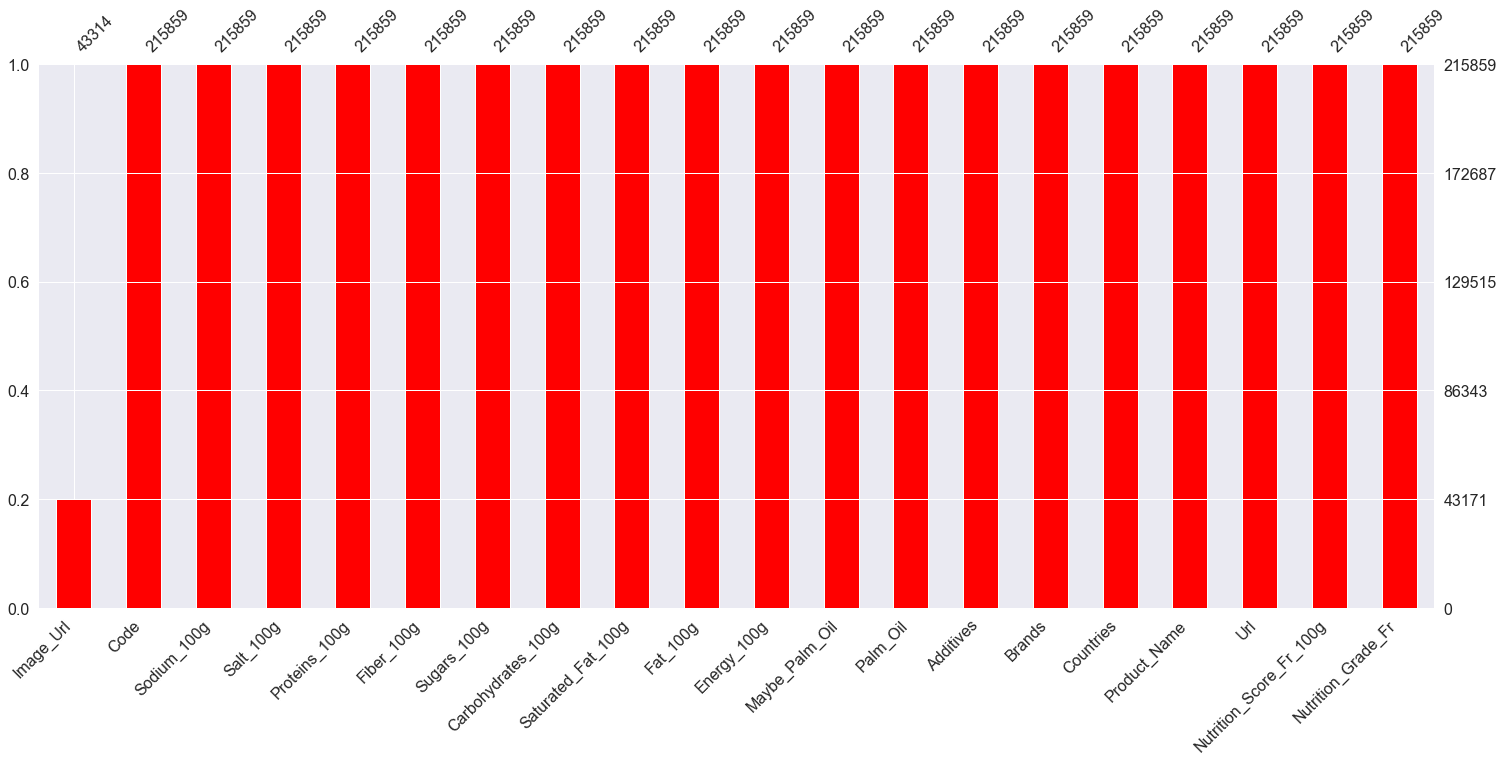

In [168]:
# Matrice de Remplissage des NaN de la Dataframe de Travail :

msno.bar(cannon4, sort = "ascending", color = "red")

In [169]:
# Correlation, selon Pearson :

t = cannon4.corr(method ='pearson')

In [170]:
# Graphique Correlation, selon Pearson :

t.style.background_gradient(cmap='coolwarm')

,Additives,Palm_Oil,Maybe_Palm_Oil,Energy_100g,Fat_100g,Saturated_Fat_100g,Carbohydrates_100g,Sugars_100g,Fiber_100g,Proteins_100g,Salt_100g,Sodium_100g,Nutrition_Score_Fr_100g
Additives,1.000000,0.120221,0.294172,0.010570,-0.092501,-0.037618,0.159498,0.144956,-0.131285,-0.101563,0.014831,0.014831,0.158084
Palm_Oil,0.120221,1.000000,0.185975,0.099466,0.062622,0.085748,0.083126,0.070760,0.006137,-0.019964,-0.008398,-0.008398,0.108737
Maybe_Palm_Oil,0.294172,0.185975,1.000000,0.023592,0.019330,0.034881,0.021565,0.015044,-0.030829,-0.047425,-0.014929,-0.014929,0.054178
Energy_100g,0.010570,0.099466,0.023592,1.000000,0.737134,0.555898,0.511731,0.329056,0.258609,0.277701,-0.032405,-0.032405,0.632329
Fat_100g,-0.092501,0.062622,0.019330,0.737134,1.000000,0.660863,-0.062738,-0.014088,0.125435,0.246166,-0.016378,-0.016379,0.546243
Saturated_Fat_100g,-0.037618,0.085748,0.034881,0.555898,0.660863,1.000000,-0.028061,0.110624,-0.001024,0.178939,-0.022043,-0.022044,0.630627
Carbohydrates_100g,0.159498,0.083126,0.021565,0.511731,-0.062738,-0.028061,1.000000,0.612383,0.231266,-0.123979,-0.050386,-0.050386,0.252515
Sugars_100g,0.144956,0.070760,0.015044,0.329056,-0.014088,0.110624,0.612383,1.000000,-0.013955,-0.265892,-0.094889,-0.094889,0.469048
Fiber_100g,-0.131285,0.006137,-0.030829,0.258609,0.125435,-0.001024,0.231266,-0.013955,1.000000,0.222473,-0.018855,-0.018855,-0.138588
Proteins_100g,-0.101563,-0.019964,-0.047425,0.277701,0.246166,0.178939,-0.123979,-0.265892,0.222473,1.000000,0.058571,0.058571,0.109230


In [171]:
# Enregistrement de la dataframe utile au notebook exploratoire :

cannon4.to_csv('cannon4.csv')